# Analyzing the Factors that Won Counter-Strike 2 Rounds at IEM Dallas 2025

## Background

Counter-Strike 2 (CS2) is a first-person shooter esports game made by Valve Corporation. The game is divided into many rounds, where teams play either the Terrorists (T) who try to plant a bomb on a specific parts of the map ("bombsites"), and the Counter-Terrorists (CT) who try to defuse the bomb or kill the terrorists.

<div>
<center><img src="assets/game_screenshot.jpg" width="500"/><br /><b>Sample in-game screenshot of Counter-Strike 2</b></center>
</div>

Teams play 12 rounds on each side (sometimes called "regulation time"), and the first team to get 13 rounds won, wins the game. If both teams reach 12 rounds won, then the game goes into "overtime" (OT), and additional 3 rounds are added to each side, meaning a team wins in overtime if 4 rounds are won. If both teams win 3 rounds in overtime, the game goes into another overtime infinitely until a team wins 4 times in overtime.

At the start of team round, all players get a specific amount of money that can be used to buy various guns and grenades. The grenades, also known as utilities, can be used by players to get information, or for taking control over parts of the map.

<center>
<table>
    <tr>
        <td>
            <center><img src="assets/flashbang.jpg" width="320"/><br /><b>Flashbang</b></center>
        </td>
        <td>
            <center><img src="assets/smoke.jpg" width="320"/><br /><b>Smoke Grenade</b></center>
        </td>
    </tr>
    <tr>
        <td>
            <center><img src="assets/henade.jpg" width="320"/><br /><b>High Explosive Grenade</b></center>
        </td>
        <td>
            <center><img src="assets/molotov.jpg" width="320"/><br /><b>Molotov</b></center>
        </td>
    </tr>
</table>
</center>


The game has developed a competitive esports scene over both it and its prequel, Counter-Strike: Global Offensive's lifetime. Valve Corporation, as well as other entities such as ESL (Electronic Sports League), PGL and Blast, maintain several tourament circuits around the world. We wanted to analyze different factors about how professional CS2 players play. To do this, we are analyzing games played from a single CS2 tournament, and chose ESL's IEM Dallas 2025 due to its recency at the time of writing and its prestige within the Counter-Strike community.

<center><img src="assets/esports.jpg" width="500" /><br /><b>IEM Dallas 2025 Finals (credit: ESL)</b></center>

## Research Question
What are the most prevalent factors that contribute to winning games (maps) of Counter-Strike 2?

## Dataset Description

Our data contains information about the games played during IEM Dallas 2025. It is split across four CSV files: `demos.csv`, `players.csv`, `teams.csv` and `matches.csv`.
Data was scraped from [HLTV.org](https://hltv.org), a widely-used site in the Counter-Strike community that has detailed data
about team and player history, as well as hosts replay files for all esports matches that can be used to get detailed
information about the events that happened in a particular game of Counter-Strike

`demos.csv` contains the bulk of our data, and contains specifically data about how the players played for each map (game) of the tournament.

`players.csv` contains information about the players at the tournament, including some data about their career.

`teams.csv` contains information about the team standings at the tournament.

`matches.csv` contains a list of matches and games that were played at the tournament, along with their HLTV links.

### Structure of the Data

#### `demos.csv`

Each row in this file contains the statistics of each player in the game, per round. Each column is an attribute of the players per round

Number of observations: 14280

- `match_id` (int) - Unique ID of the match played
- `map_id` (int) - Unique ID of the map played
- `round_id` (int) - Unique ID of the map played
- `team_name` (string) - Name of the team
- `map_name` (string) - Name of map the round was played on
- `round_number` (int) - The 1-indexed order of the round played in the map (game)
- `round_ct_team` (string) - Team name of the team that is on the CT (Counter-Terrorist) side
- `round_first_site_hit` (A' | 'B') - First bombsite that a team set foot in during a round
- `round_site_hit_time` (float64) - Time it takes for a team to reach a bombsite
- `round_bomb_plant_site` (A' | 'B') - The site where bomb was planted. Null if bomb was not planted.
- `player_planted_bomb` (float64) - The site where bomb was planted. Null if bomb was not planted.
- `round_bomb_plant_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_bomb_defuser` (bool) - True if the player defused the bomb, False otherwise
- `bomb_defuse_time` (float64) - Time since round start that the bomb was defused (in seconds)
- `round_length` (float64) - Length of the round (in seconds)
- `round_result` ('T' | 'CT') - Team that won the round
- `round_timeout_called_before` (string) - Team that called timeout before the round. Null if no timeout was called
- `player_name` (string) - Name of player
- `player_flashes_used` (int) - Number of flashbangs the player used in the round
- `player_smokes_used` (int) - Number of smoke grenades the player used in the round
- `player_grenades_used` (int) - Number of explosive grenades the player used in the round
- `player_molotovs_used` (int) - Number of molotovs the player used in the round
- `player_incendiaries_used` (int) - Number of incendiary grenades the player used in the round
- `player_kills` (int) - Number of kills a player got in the round
- `player_died` (bool) - True if the player died in the round
- `player_spent_amount` (int) - Amount of money a player spent in the round
- `player_loadout` (string) - Items a player has in their inventory at the start of the round, deliminated by `, `
- `player_damage` (float64) - Amount of damage a player dealt in the round
- `round_first_killer` (bool) - True if the player drew first blood (first kill) in the round
- `round_first_death` (bool) - True if the player is the first person to die in the round
- `player_headshots` (int) - Number of headshots made by player in a round
- `player_upperbodyshots` (int) - Number of upper body (neck, chest, right_arm, left_arm) shots made by player a round
- `player_stomachshots` (int) - Number of stomach shots made by player a round
- `player_legshots` (string) - Number of leg shots made by player

#### `players.csv`

Each row in this file is a player that played in the tournament. Each column refers to an attribute about the players

Number of observations: 80

- `playerid` (int) - Unique ID of the player
- `name` (string) - Name of the player
- `team` (string) - Team name of the player
- `proplayer_since_month` (Month) - Month that the player played on their first team
- `proplayer_since_year` (int) - Year that the player played on their first team
- `on_team_since_month` (Month) - Month that the player played on their current team
- `on_team_since_year` (int) - Year that the player played on their current team
- `is_stand_in` (bool) - True if the player is a stand-in (not officially on roster)
- `has_changed_teams` (bool) - True if the player has changed teams at any point in their career

#### `matches.csv`

Each row in this file is a game played in the tournament. Each column is an attribute for the matches

Number of observations: 71

- `matchid` (int) - Unique ID of the player
- `mapid` (int) - Unique ID of the game (map) played
- `team1` (string) - First team of the match
- `team2` (string) - Second team of the match
- `url` (string) - HLTV URL of the match
- `map` (string) - Map the game was played on

#### `teams.csv`

Each row in this file is a team that played in the tournament. Each column is an attribute for the teams

Number of observations: 16

- `team_name` (string) - Name of the team
- `tournament_place` (int) - Placement of the team in IEM Dallas 2025

#### `smokes.csv`

Each row in this file is a smoke grenade thrown in game at the tournament. Each column is an attribute for the smoke grenades

Number of observations: 8769

- `entityid` (int) - ID of the smoke grenade
- `tick` (int) - In-game tick when smoke grenade went off
- `user_name` (string) - Name of player who threw the smoke grenade
- `x` (float64) - X-coordinate where the smoke grenade went off
- `y` (float64) - Y-coordinate where the smoke grenade went off
- `z` (float64) - Z-coordinate where the smoke grenade went off
- `round_number` (int) - 1-indexed round number within a game
- `map_name` (string) - Name of the map
- `matchid` (int) - Match ID index of the game played at IEM Dallas 2025
- `mapid` (int) - Map ID index of the game played at IEM Dallas 2025
- `player_team` (string) - Team of the player that threw the smoke grenade
- `winner` ('T' | 'CT') - Side of the team that won the round
- `team_name` (string) - Team name of the player who threw the smoke grenade
- `is_win` (true) - If the player who threw the smoke grenade won the round
- `start_tick` (int) - Tick when the round starts
- `round_tick` (int) - Tick in the round when the smoke went off



## Data Gathering

For our data gathering, we downloaded replay (demo) files for all games played during IEM Dallas 2025 from HLTV.org, a website that is considered to be the most comprehensive database of Counter-Strike esports data. The files we downloaded ended up being 71 games total. In order to parse these replay files, we used a library called [`demoparser2`](https://github.com/LaihoE/demoparser). This library allows us to read demo files and parse information such as game events, game ticks, and player information.

We created a script called `read_demo.py` that takes in a demo file and creates a CSV file with various statistics for each round and player. We then combine these CSV files with another script called `join_csv.py`. While testing the script, we realized that some games were split into multiple demo files, which were harder to parse, and in the end, we decided to drop these games as these were only 3 out of our entire set.

Another issue we encountered was that our initial `read_demo.py` script incorrectly parsed the side (T or CT) that a team was on, so we had to make a second `get_round_sides.py` script that we used to generate a CSV that was then used to patch the original CSV file we generated.

In addition to the main CSV file, we also manually scraped `matches.csv` and `players.csv` files to augment the information for our analysis. The data for both of these files come from HLTV.org's public data about players and tournaments, and were manually copied into Google Sheets before exporting as CSV.

In summary, the following implications should be noted:
- Some games were dropped due to difficulties in parsing data from split demo files.
- For player inventories, there are times that the player only had their knife, and no guns at the tick the inventory check was done. Checking the demo file in game showed that the player had dropped their gun at this time.
- One of the demos, match `25` game `60`, had an issue where the warmup of the players was included as a "0th round", leading to potential issues about the round number.



# Recreating our Data

To recreate our data, go to all HLTV links in `matches.csv` and click on "Demo Sponsored by BitSkins" to download demos.

Install `demoparser2` by running `pip install demoparser2`

Extract the files and rename each to the convention of `<matchid>_<mapid>.dem`.

For each file, run the following command:
```bash
python read_demo.py /path/to/demo.dem
```

In addition, run:
```bash
python get_round_sides.py
```

Move all of the `.dem.csv` files that were generated to a folder called `csv`. Then, in the directory where `csv` is, run:

```bash
python join_csv.py
```

# Data Cleaning

### Import Libraries and Tables

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import adjustText as at
import matplotlib.pyplot as plt_pypl
from adjustText import adjust_text
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import copy
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

demos = pd.read_csv("demos.csv")
matches = pd.read_csv("matches.csv")
players = pd.read_csv("players.csv")
teams = pd.read_csv("teams.csv")
smokes = pd.read_csv("smokes.csv")

### Team Names

If we read the list of team names in the `players.csv`, `teams.csv` and `demos.csv` files, they differ from each other:

In [2]:
teams_team_names = sorted(teams['team_name'].unique())
demos_team_names = sorted(demos['team_name'].unique())
players_team_names = sorted(players['team'].unique())

pd.DataFrame({
    'teams': teams_team_names,
    'demos': demos_team_names,
    'players': players_team_names
})

,teams,demos,players
0,3DMAX,3DMAX,3DMAX
1,Aurora,Aurora,Aurora
2,BC.Game,BCG,BC.Game
3,FURIA,FURIA,FURIA
4,FaZe,FaZe Clan,FaZe
5,Falcons,G2 Esports,Falcons
6,G2,GamerLegion,G2
7,GamerLegion,HEROIC,GamerLegion
8,HEROIC,LEGACY,HEROIC
9,Legacy,Lynn Vision Gaming,Legacy


Both the `teams.csv` and `players.csv` team names are the same, but the ones in `demos.csv` are different.
We will replace the values in `players.csv` and `teams.csv` since they are smaller files, for performance reasons.

First, we get the differences:

In [3]:
union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

2                BC.Game
3                    BCG
5                   FaZe
6              FaZe Clan
7                Falcons
8                     G2
9             G2 Esports
12                LEGACY
13                Legacy
14                Liquid
15           Lynn Vision
16    Lynn Vision Gaming
19          Team Falcons
20           Team Liquid
21         Team Vitality
23              Vitality
dtype: object

From here, we can see the following that need to change:

- `BC.Game` -> `BCG`
- `FaZe` -> `FaZe Clan`
- `Falcons` -> `Team Falcons`
- `G2` -> `G2 Esports`
- `Legacy` -> `LEGACY`
- `Liquid` -> `Team Liquid`
- `Lynn Vision` -> `Lynn Vision Gaming`
- `Vitality` -> `Team Vitality`

Now we can fix this:

In [4]:
teams['team_name'] = teams['team_name'].replace('BC.Game', 'BCG')
teams['team_name'] = teams['team_name'].replace('FaZe', 'FaZe Clan')
teams['team_name'] = teams['team_name'].replace('Falcons', 'Team Falcons')
teams['team_name'] = teams['team_name'].replace('G2', 'G2 Esports')
teams['team_name'] = teams['team_name'].replace('Legacy', 'LEGACY')
teams['team_name'] = teams['team_name'].replace('Liquid', 'Team Liquid')
teams['team_name'] = teams['team_name'].replace('Lynn Vision', 'Lynn Vision Gaming')
teams['team_name'] = teams['team_name'].replace('Vitality', 'Team Vitality')

players['team'] = players['team'].replace('BC.Game', 'BCG')
players['team'] = players['team'].replace('FaZe', 'FaZe Clan')
players['team'] = players['team'].replace('Falcons', 'Team Falcons')
players['team'] = players['team'].replace('G2', 'G2 Esports')
players['team'] = players['team'].replace('Legacy', 'LEGACY')
players['team'] = players['team'].replace('Liquid', 'Team Liquid')
players['team'] = players['team'].replace('Lynn Vision', 'Lynn Vision Gaming')
players['team'] = players['team'].replace('Vitality', 'Team Vitality')

Now, we check for differences:

In [5]:
teams_team_names = teams['team_name'].unique()
demos_team_names = demos['team_name'].unique()
players_team_names = players['team'].unique()

union_ser = pd.Series(np.union1d(teams_team_names, demos_team_names))
intersection_ser = pd.Series(np.intersect1d(teams_team_names, demos_team_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

As you can see, there are no more differences.

### Player Names

If we read the list of player names in the `players.csv` and `demos.csv` files, they differ from each other:


In [6]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

differences

0           910
1          910-
11     HeavyGoD
12     HeavyGod
22       Mzinho
29       Skullz
36       Techno
37     Techno4K
39    Westmelon
63       mzinho
74       skullz
78    westmelon
84         z4KR
85         z4kr
dtype: object

To determine which names are equivalent to which, we make a DataFrame:

In [7]:
demos_player_names = pd.Series(demos['player_name'].unique())
players_player_names = pd.Series(players['name'].unique())

demos_player_names = demos_player_names[demos_player_names.isin(differences)]
players_player_names = players_player_names[players_player_names.isin(differences)]

pd.DataFrame({'demos': demos_player_names, 'players': players_player_names})

,demos,players
7,Skullz,NaN
17,NaN,Techno
18,NaN,mzinho
19,NaN,910
33,NaN,HeavyGod
50,HeavyGoD,NaN
51,NaN,skullz
52,z4KR,NaN
56,westmelon,NaN
62,NaN,Westmelon


From here, we can see the following that need to change:

- `910` -> `910-`
- `HeavyGod` -> `HeavyGoD`
- `mzinho` -> `mzinho`
- `skullz` -> `Skullz`
- `Techno` -> `Techno4K`
- `Westmelon` -> `westmelon`
- `z4kr` -> `z4KR`

Now we can fix this:

In [8]:
players['name'] = players['name'].replace('910', '910-')
players['name'] = players['name'].replace('HeavyGod', 'HeavyGoD')
players['name'] = players['name'].replace('mzinho', 'Mzinho')
players['name'] = players['name'].replace('skullz', 'Skullz')
players['name'] = players['name'].replace('Techno', 'Techno4K')
players['name'] = players['name'].replace('Westmelon', 'westmelon')
players['name'] = players['name'].replace('z4kr', 'z4KR')

In [9]:
demos_player_names = demos['player_name'].unique()
players_player_names = players['name'].unique()

union_ser = pd.Series(np.union1d(players_player_names, demos_player_names))
intersection_ser = pd.Series(np.intersect1d(players_player_names, demos_player_names))
differences = union_ser[~union_ser.isin(intersection_ser)]

len(differences)

0

Now we can see there are no differences.

Let's merge these into `demos` for easier analysis

In [10]:
# convert debut month to int
players['proplayer_since_month'] = players['proplayer_since_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
players['proplayer_since_year'] = players['proplayer_since_year'].astype(int)
# convert debut current team to int
players['on_team_since_month'] = players['on_team_since_month'].apply(lambda x: pd.to_datetime(x, format='%B').month)
players['on_team_since_year'] = players['on_team_since_year'].astype(int)

# caclulate months from player's debut month and year to May 2025 when IEM Dallas was played
players['career_length'] = (2025 - players['proplayer_since_year']) * 12 + (5 - players['proplayer_since_month'])
players['curr_team_length'] = (2025 - players['on_team_since_year']) * 12 + (5 - players['on_team_since_month'])
players.rename(columns={'name': 'player_name'}, inplace=True)
players = players[['player_name', 'career_length', 'curr_team_length']]

# perform joins
demos = pd.merge(demos,players,on='player_name',how='inner')
demos = pd.merge(demos, teams, on='team_name', how='inner')

## Player loadouts

Player loadouts are encoded as comma-separated lists, so we turn it into an array. In addition, we need to remove knives,
as it is impossible to drop knives in the game, and different knife skins (cosmetics) are counted as unique items rather
than the same one, even if there is no gameplay effect.

First, we convert to list and get a list of knives:

In [11]:
demos['player_loadout_array'] = demos['player_loadout'].str.split(', ')
unique_items = demos['player_loadout_array'].explode().unique().tolist()
knives = [i for i in unique_items if
          "knife" in i.lower() or
          "daggers" in i.lower() or
          "bayonet" in i.lower() or
          "karambit" in i.lower()]

knives

['Butterfly Knife',
 'Talon Knife',
 'M9 Bayonet',
 'Karambit',
 'Shadow Daggers',
 'Skeleton Knife',
 'Flip Knife',
 'Bayonet',
 'Survival Knife',
 'Nomad Knife',
 'Stiletto Knife',
 'knife_t',
 'knife',
 'Ursus Knife']

Now, we filter:

In [12]:
demos['player_loadout_array'] = demos['player_loadout_array'].apply(lambda l: [i for i in l if i not in knives])
demos['player_loadout_array'].head(10)

0              [Glock-18, C4 Explosive]
1    [Glock-18, Smoke Grenade, Molotov]
2                            [Glock-18]
3      [P250, Smoke Grenade, Flashbang]
4                               [USP-S]
5                [P2000, Smoke Grenade]
6                       [Dual Berettas]
7                               [USP-S]
8                    [USP-S, Flashbang]
9                            [Glock-18]
Name: player_loadout_array, dtype: object

## Removing problematic game

As mentioned before, match `25` game `60` was erroneously encoded by the tournament organizers, leading to potential problems with the data.

In [13]:
demos = demos[demos['map_id'] != 60]

## Removing problematic rounds

Because of the nature of Source 2 demos, there are some rounds where the round_bomb_plant_time is less than or equal to 0, which is not possible in a real game. We will remove these rounds from our data.



In [14]:
demos = demos[(demos["round_bomb_plant_time"] > 0) | (demos["round_bomb_plant_time"].isna())]

## Imputing hit sites

In the data set there were instances where the first site hit was not recorded but a bomb plant was recorded. In this case, we will impute the first site hit based on the bomb plant site. A limitation of this however is this may not cover instances where there are split pushes or rotation to the other site, but this is a good approximation for the data we have.

In [15]:
def impute_round_first_site_hit(row: pd.Series):
    if pd.isna(row["round_first_site_hit"]):
        return row["round_bomb_plant_site"]
    else:
        return row["round_first_site_hit"]


demos["round_first_site_hit"] = demos.apply(impute_round_first_site_hit, axis=1)

pd.set_option("display.max_columns", None)

# show sample imputed row
demos[demos["round_id"] == 8]

,match_id,map_id,round_id,team_name,map_name,round_number,round_ct_team,round_first_site_hit,round_site_hit_time,round_bomb_plant_site,player_planted_bomb,round_bomb_plant_time,round_bomb_defuser,bomb_defuse_time,round_length,round_result,round_timeout_called_before,player_name,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_died,player_spent_amount,player_loadout,player_damage,round_first_killer,round_first_death,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,tournament_place,player_loadout_array
80,0,0,8,Team Liquid,de_ancient,9,FaZe Clan,B,NaN,B,True,112.21875,False,NaN,134.60938,T,NaN,NertZ,0,2,1,1,0,2,False,3800,"Butterfly Knife, Glock-18, Galil AR, Smoke Gre...",195,False,False,1,1,1,0,93,4,9,"[Glock-18, Galil AR, Smoke Grenade, Molotov, H..."
81,0,0,8,Team Liquid,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,NAF,2,1,0,0,0,1,True,4400,"Talon Knife, Glock-18, C4 Explosive, AK-47, Sm...",163,False,False,0,4,2,0,128,87,9,"[Glock-18, C4 Explosive, AK-47, Smoke Grenade,..."
82,0,0,8,Team Liquid,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,ultimate,1,1,0,1,0,0,True,6650,"M9 Bayonet, Glock-18, AWP, Smoke Grenade, Flas...",6,False,False,0,0,0,0,39,10,9,"[Glock-18, AWP, Smoke Grenade, Flashbang]"
83,0,0,8,Team Liquid,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,Twistzz,0,0,1,1,0,2,False,4700,"Karambit, Glock-18, AK-47, Molotov, High Explo...",104,False,False,1,1,0,0,115,17,9,"[Glock-18, AK-47, Molotov, High Explosive Gren..."
84,0,0,8,FaZe Clan,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,frozen,1,0,0,0,0,0,True,800,"Karambit, USP-S, AK-47, High Explosive Grenade...",0,False,False,0,0,0,0,115,17,9,"[USP-S, AK-47, High Explosive Grenade, Flashba..."
85,0,0,8,FaZe Clan,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,EliGE,1,1,2,0,2,0,True,4200,"Shadow Daggers, P2000, M4A4, Flashbang, Smoke ...",12,False,False,0,0,0,1,129,4,9,"[P2000, M4A4, Flashbang, Smoke Grenade, High E..."
86,0,0,8,FaZe Clan,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,s1mple,1,1,1,0,0,2,True,2500,"Butterfly Knife, USP-S, AWP, Smoke Grenade, Fl...",200,False,False,1,1,0,0,134,0,9,"[USP-S, AWP, Smoke Grenade, Flashbang, Incendi..."
87,0,0,8,FaZe Clan,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,Skullz,1,1,1,0,1,1,True,2300,"Talon Knife, USP-S, AK-47, High Explosive Gren...",70,True,False,1,1,0,0,74,0,9,"[USP-S, AK-47, High Explosive Grenade, Incendi..."
88,0,0,8,FaZe Clan,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,karrigan,2,1,1,0,2,0,True,1300,"Karambit, USP-S, AK-47, Smoke Grenade, High Ex...",100,False,False,0,2,0,0,149,51,9,"[USP-S, AK-47, Smoke Grenade, High Explosive G..."
89,0,0,8,Team Liquid,de_ancient,9,FaZe Clan,B,NaN,B,False,112.21875,False,NaN,134.60938,T,NaN,siuhy,2,1,0,1,0,0,True,3900,"Karambit, Glock-18, Galil AR, Smoke Grenade, M...",32,False,True,0,2,0,0,64,1,9,"[Glock-18, Galil AR, Smoke Grenade, Molotov, F..."


## Exploratory Data Analysis

For our EDA, we will be exploring the different features from our dataset and find ways to apply it to our actual data

In [16]:
demos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 0 to 14279
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     13840 non-null  int64  
 1   map_id                       13840 non-null  int64  
 2   round_id                     13840 non-null  int64  
 3   team_name                    13840 non-null  object 
 4   map_name                     13840 non-null  object 
 5   round_number                 13840 non-null  int64  
 6   round_ct_team                13840 non-null  object 
 7   round_first_site_hit         10140 non-null  object 
 8   round_site_hit_time          8010 non-null   float64
 9   round_bomb_plant_site        7120 non-null   object 
 10  player_planted_bomb          13840 non-null  bool   
 11  round_bomb_plant_time        7120 non-null   float64
 12  round_bomb_defuser           13840 non-null  bool   
 13  bomb_defuse_time     

In [17]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   team_name         16 non-null     object
 1   tournament_place  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [18]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   matchid  71 non-null     int64 
 1   mapid    71 non-null     int64 
 2   team1    71 non-null     object
 3   team2    71 non-null     object
 4   url      71 non-null     object
 5   map      71 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.5+ KB


In [19]:
smokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   entityid      8769 non-null   int64  
 1   tick          8769 non-null   int64  
 2   user_name     8769 non-null   object 
 3   x             8769 non-null   float64
 4   y             8769 non-null   float64
 5   z             8769 non-null   float64
 6   round_number  8769 non-null   int64  
 7   map_name      8769 non-null   object 
 8   matchid       8769 non-null   int64  
 9   mapid         8769 non-null   int64  
 10  player_team   8769 non-null   object 
 11  winner        8769 non-null   object 
 12  team_name     8769 non-null   object 
 13  is_win        8769 non-null   bool   
 14  start_tick    8769 non-null   int64  
 15  round_tick    8769 non-null   int64  
dtypes: bool(1), float64(3), int64(7), object(5)
memory usage: 1.0+ MB


Let's observe the demo column and how we should approach our EDA (i.e. how should we approach our EDA).

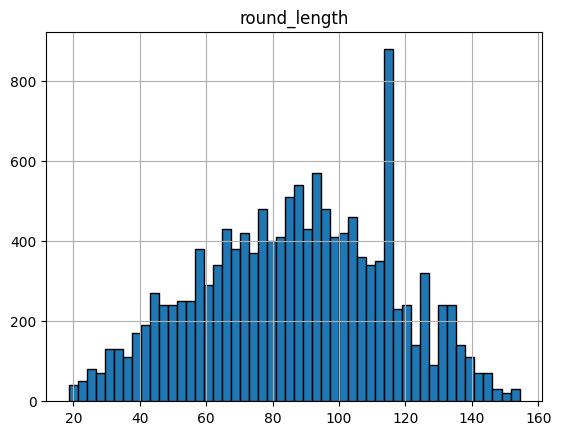

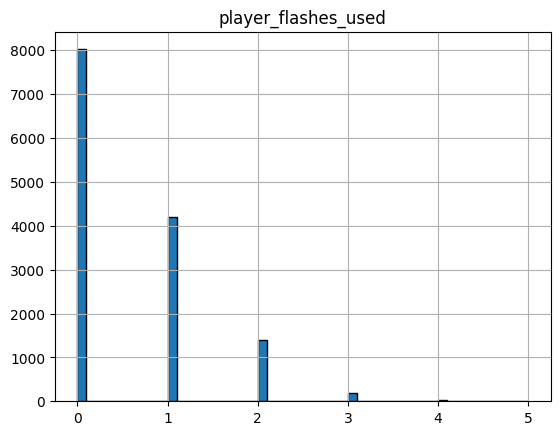

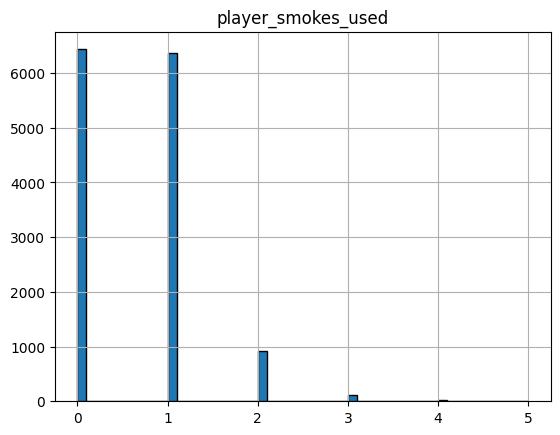

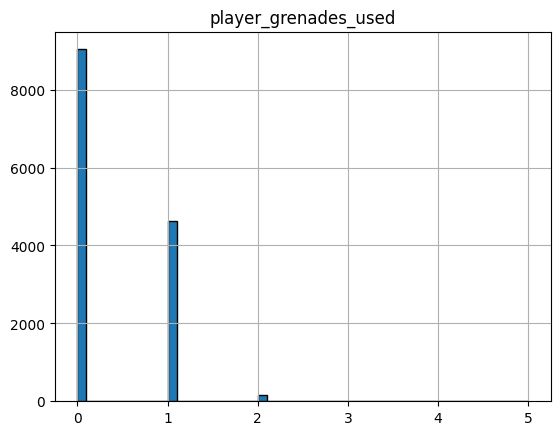

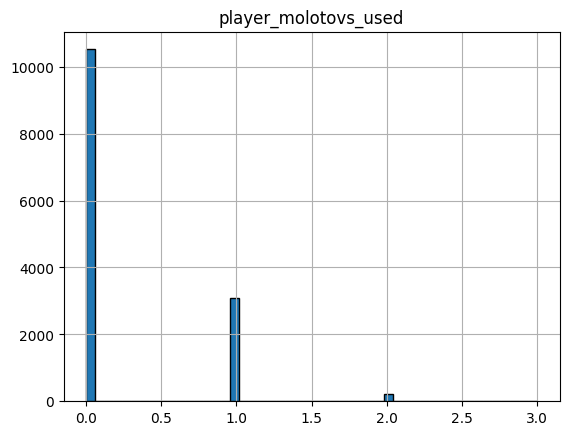

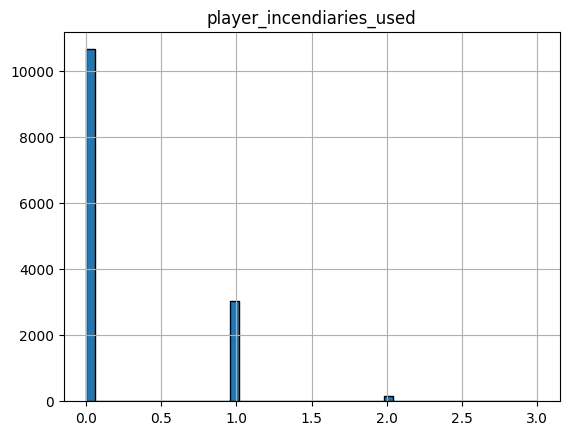

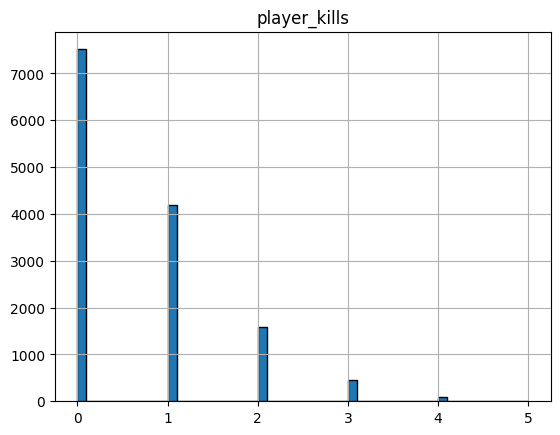

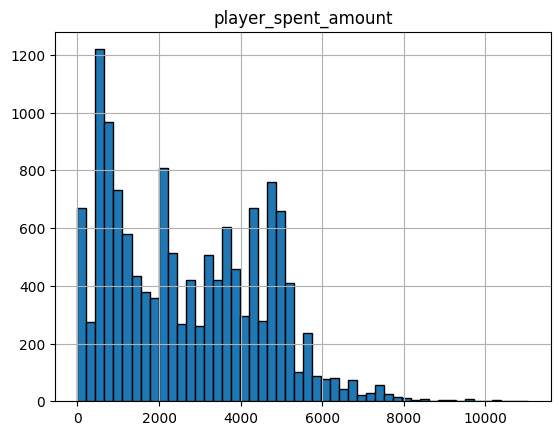

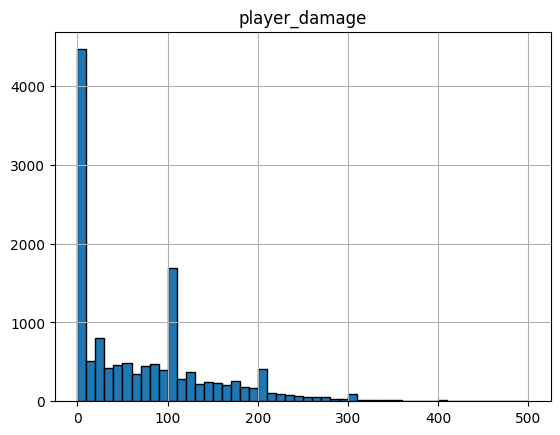

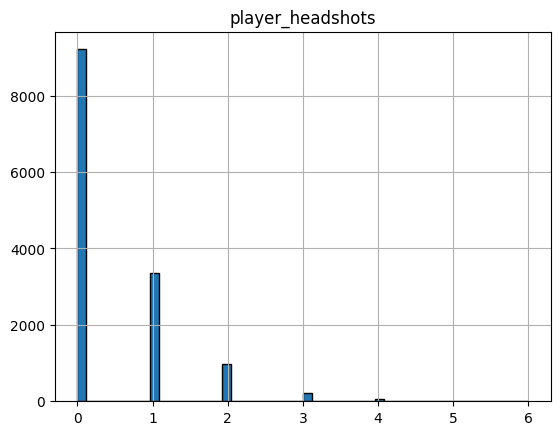

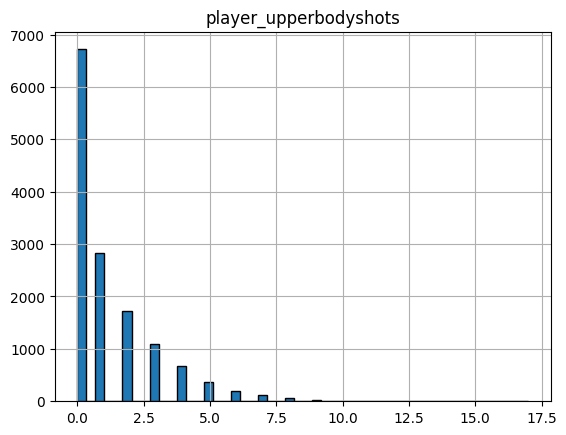

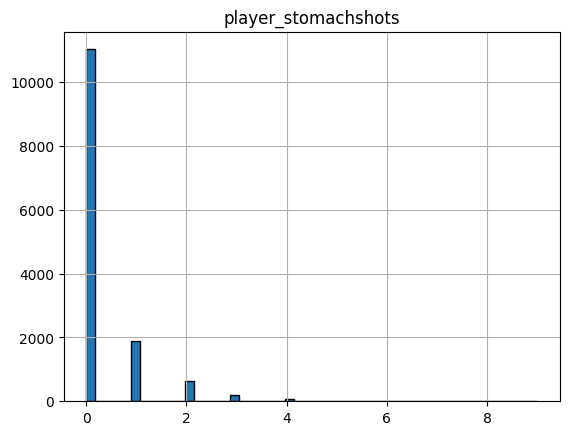

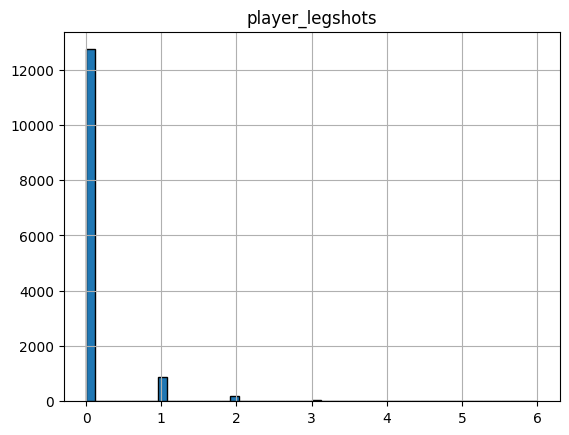

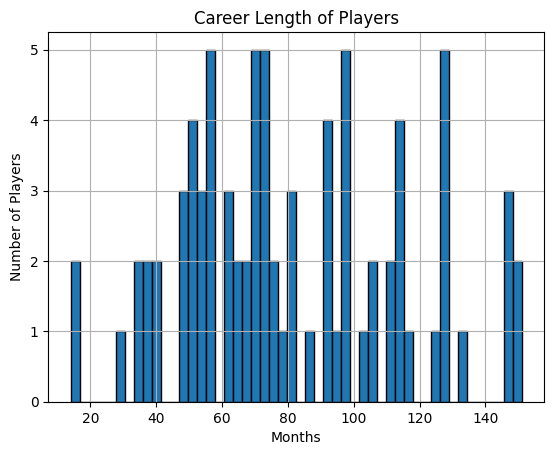

In [20]:
# for each demo column, create a histogram

numerical_cols = [
    "round_length",
    "player_flashes_used",
    "player_smokes_used",
    "player_grenades_used",
    "player_molotovs_used",
    "player_incendiaries_used",
    "player_kills",
    "player_spent_amount",
    "player_damage",
    "player_headshots",
    "player_upperbodyshots",
    "player_stomachshots",
    "player_legshots",
]

for col in numerical_cols:
    demos[col].hist(bins=50, edgecolor="black")
    plt_pypl.title(col)
    plt_pypl.show()

players["career_length"].hist(bins=50, edgecolor="black")
plt_pypl.title("Career Length of Players")
plt_pypl.xlabel("Months")
plt_pypl.ylabel("Number of Players")
plt_pypl.show()

Given that the above data of numerical columns, we will be using the median as a measure of central tendency for all of the columns because of the skew of our data.

Let's move onto our EDA questions:

### EDA Question #1: Are there any interesting correlations between quantitative features in our data set?

To answer this question, let's create a correlation matrix of our quantitative features grouped by teams per round, teams per map/game, and by players per map/game. In addition let's look if there are any correlation changes between the two sides (T and CT) of the game.

First we consider the following correlation matrix of the aggregated metrics by team per round.

It should be noted that because we are observing correlation beteween columns which include factors affected by team economy, we drop the first rounds of each halves (i.e. rounds 1 and 13) as these are when the team economy is consistent to both sides with all members starting with $800. This will apply to all other correlation matrices we will be generating.

,round_length,team_flashes_used,team_smokes_used,team_grenades_used,team_molotovs_used,team_incendiaries_used,team_kills,team_spent_amount,team_damage,team_headshots,team_upperbodyshots,team_stomachshots,team_legshots,avg_career_length,avg_curr_team_length,tournament_place
round_length,1.000000,0.249651,0.395690,0.164425,0.144347,0.067224,-0.035141,0.110776,-0.041931,-0.007928,0.004909,0.026698,-0.001236,0.024626,-0.001502,-0.046391
team_flashes_used,0.249651,1.000000,0.494979,0.220710,0.471177,0.013570,0.140053,0.257204,0.123179,0.029098,0.044203,0.061559,0.043075,0.039489,0.024383,0.024791
team_smokes_used,0.395690,0.494979,1.000000,0.346601,0.331713,0.149556,0.178735,0.328902,0.159125,0.031416,0.117851,0.125882,0.040964,0.028846,-0.075941,-0.002702
team_grenades_used,0.164425,0.220710,0.346601,1.000000,-0.008760,0.571203,0.292304,0.200945,0.299065,0.017379,0.206354,0.152653,0.095677,0.022559,0.026072,-0.017505
team_molotovs_used,0.144347,0.471177,0.331713,-0.008760,1.000000,-0.553511,0.063528,0.165695,0.043243,0.012568,-0.015053,-0.008088,-0.058949,0.009552,-0.006266,-0.002698
team_incendiaries_used,0.067224,0.013570,0.149556,0.571203,-0.553511,1.000000,0.255235,0.186422,0.259364,0.020568,0.193856,0.181611,0.134613,-0.001331,0.023332,-0.008902
team_kills,-0.035141,0.140053,0.178735,0.292304,0.063528,0.255235,1.000000,0.175197,0.963531,0.564704,0.562159,0.410050,0.196789,0.004920,0.006074,-0.088893
team_spent_amount,0.110776,0.257204,0.328902,0.200945,0.165695,0.186422,0.175197,1.000000,0.158578,-0.011929,0.110789,0.119792,0.065685,-0.001419,-0.020607,0.015940
team_damage,-0.041931,0.123179,0.159125,0.299065,0.043243,0.259364,0.963531,0.158578,1.000000,0.561178,0.584140,0.422858,0.214896,0.006655,0.015663,-0.089745
team_headshots,-0.007928,0.029098,0.031416,0.017379,0.012568,0.020568,0.564704,-0.011929,0.561178,1.000000,0.115154,0.038776,0.020823,0.011004,-0.010653,-0.050273


<Figure size 1000x800 with 0 Axes>

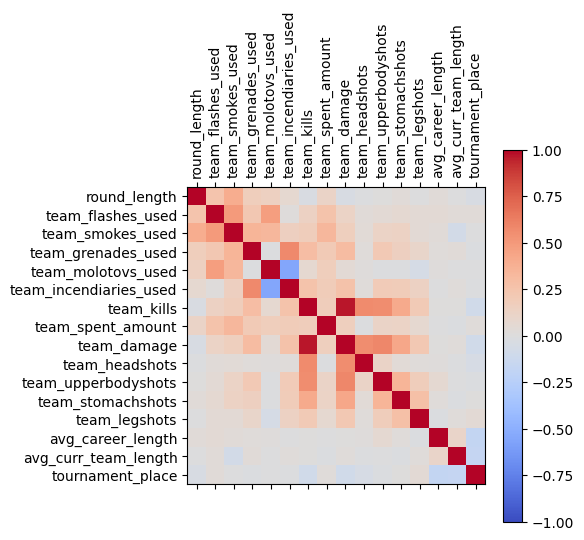

In [21]:
team_stats_aggregator = {
    "round_length": "mean",
    "player_flashes_used": "sum",
    "player_smokes_used": "sum",
    "player_grenades_used": "sum",
    "player_molotovs_used": "sum",
    "player_incendiaries_used": "sum",
    "player_kills": "sum",
    "player_spent_amount": "sum",
    "player_damage": "sum",
    "player_headshots": "sum",
    "player_upperbodyshots": "sum",
    "player_stomachshots": "sum",
    "player_legshots": "sum",
    "career_length": "mean",
    "curr_team_length": "mean",
    "tournament_place": "mean",
}

team_stats_column_names = {
    "player_flashes_used": "team_flashes_used",
    "player_smokes_used": "team_smokes_used",
    "player_grenades_used": "team_grenades_used",
    "player_molotovs_used": "team_molotovs_used",
    "player_incendiaries_used": "team_incendiaries_used",
    "player_kills": "team_kills",
    "player_spent_amount": "team_spent_amount",
    "player_damage": "team_damage",
    "player_headshots": "team_headshots",
    "player_upperbodyshots": "team_upperbodyshots",
    "player_stomachshots": "team_stomachshots",
    "player_legshots": "team_legshots",
    "career_length": "avg_career_length",
    "curr_team_length": "avg_curr_team_length",
}

# filter out pistol rounds
team_stats_normalized = demos[(demos['round_number'] != 1) & (demos['round_number'] != 13)].copy()

team_stats_normalized = team_stats_normalized.groupby(["round_id", "team_name"]).agg(team_stats_aggregator)

team_stats_normalized = team_stats_normalized.rename(columns=team_stats_column_names)

teams_corr = team_stats_normalized.corr(method="spearman")


plt_pypl.figure(figsize=(10, 8))

plt_pypl.matshow(teams_corr, cmap="coolwarm", vmin=-1, vmax=1)

plt_pypl.colorbar()

# if python gives a funny red underline for teams_corr, you can ignore it

plt_pypl.xticks(range(len(teams_corr.columns)), teams_corr.columns, rotation=90)

plt_pypl.yticks(range(len(teams_corr.index)), teams_corr.index)

teams_corr

We will use the following function to classify our correlation values:

In [22]:
def classify_correlation(corr_val):
    corr_val = abs(corr_val)

    if corr_val >= 0.8:
        return 'very strong'
    elif corr_val >= 0.6:
        return 'strong'
    elif corr_val >= 0.4:
        return 'moderate'
    elif corr_val >= 0.2:
        return 'weak'
    else:
        return 'very weak'

Reducing and filtering the correlation matrix to unique pairs of columns to those of "strong" (0.6 <= |r| < 0.8) or "very strong" (0.8 <= |r| <= 1.0) correlations, we get the following:

In [23]:
stacked = teams_corr.stack().reset_index()
stacked.columns = ['Column 0', 'Column 1', 'correlation']


stacked['strength_category'] = stacked['correlation'].apply(classify_correlation)

# filter self-correlations and symmetric duplicates
# 
stacked = stacked[stacked['Column 0'] < stacked['Column 1']]

# filter correlations to strong or very strong correlations
significant_corrs = stacked[stacked['correlation'].abs() >= 0.6]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation,strength_category
0,team_damage,team_kills,0.963531,very strong


We only observe one very strong correlation and no strong correlations. We plot the correlation of this pair.

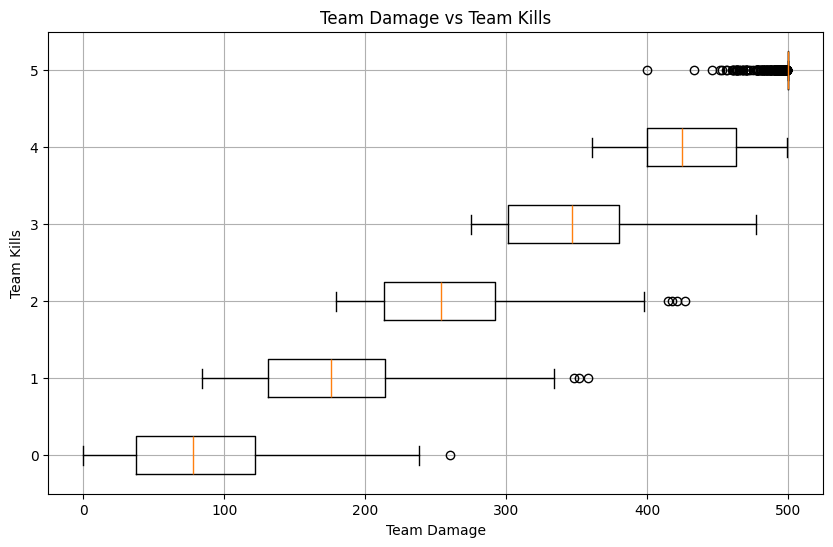

In [24]:
# plot team_damage vs team_kills
kills_grouped = team_stats_normalized.groupby('team_kills')
num_kills = list(kills_grouped['team_damage'].apply(list).index)
plt_pypl.figure(figsize=(10, 6))
plt_pypl.boxplot(kills_grouped['team_damage'].apply(list), vert=False, tick_labels=num_kills)
plt_pypl.xlabel('Team Damage')
plt_pypl.ylabel('Team Kills')
plt_pypl.title('Team Damage vs Team Kills')
plt_pypl.grid(True)
plt_pypl.show()

As shown as expected in the boxplots above, the number of kills tends correlate with the amount of damage dealt by a team in a given round. One thing worth mentioning is the amount of outliers when 5 kills were recorded by a team per round. Theoretically when all 5 players are killed that should translate to 500 damage dealt, but in practice, this is not always the case as a result of non-enemy dealt damage such as fall damage.

We now increase our paramters to include moderate correlations (0.4 <= |r| < 0.6) to see if we can find more interesting pairs.

In [25]:
# filter correlations to moderate or stronger correlations
significant_corrs = stacked[0.4 <= stacked['correlation'].abs()]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation,strength_category
0,team_damage,team_kills,0.963531,very strong
1,team_damage,team_upperbodyshots,0.584140,moderate
2,team_grenades_used,team_incendiaries_used,0.571203,moderate
3,team_headshots,team_kills,0.564704,moderate
4,team_kills,team_upperbodyshots,0.562159,moderate
5,team_damage,team_headshots,0.561178,moderate
6,team_flashes_used,team_smokes_used,0.494979,moderate
7,team_flashes_used,team_molotovs_used,0.471177,moderate
8,team_damage,team_stomachshots,0.422858,moderate
9,team_kills,team_stomachshots,0.410050,moderate


The above correlation pairs are nothing out of the ordinary and are excpected. Some of the more interesting pairs here include team spending to smokes thrown.

The only negative correlation we observe here is between incendiaries and molotovs used, this is expected as these items are reserved buys for counter-terrorist and terrorist sides, respectively, additionally, it is only possible to hold one or the other in your inventory.

Now let's look at the correlation matrix of CT side teams and T side teams and observe for any changes in correlations.

In [26]:
teams_sep = demos[(demos['round_number'] != 1) & (demos['round_number'] != 13)].copy()

teams_sep["side"] = np.where(teams_sep["team_name"] == teams_sep["round_ct_team"], "CT", "T")

ct_teams = teams_sep[teams_sep["side"] == "CT"]
t_teams = teams_sep[teams_sep["side"] == "T"]

ct_teams = ct_teams.groupby(["team_name", "round_id"]).agg(team_stats_aggregator).rename(columns=team_stats_column_names)
t_teams = t_teams.groupby(["team_name", "round_id"]).agg(team_stats_aggregator).rename(columns=team_stats_column_names)

ct_teams_corr = ct_teams.corr(method="spearman")
t_teams_corr = t_teams.corr(method="spearman")

Let's observe CT side, we filter the correlations to moderate or stronger metrics that were either not present in the complete correlation table or changed in category.

<Figure size 1000x800 with 0 Axes>

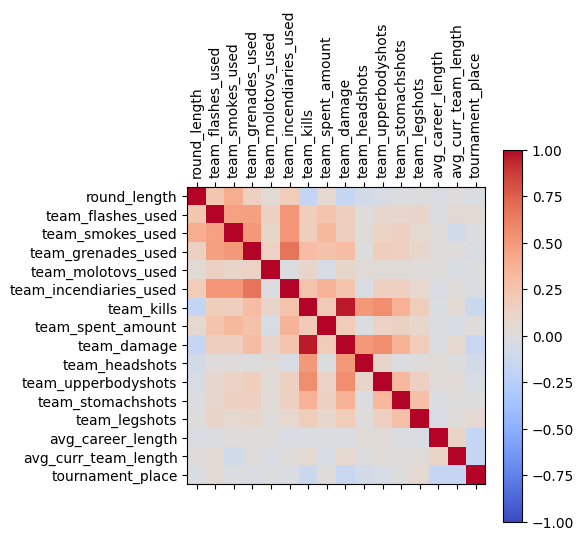

In [27]:
plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(ct_teams_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(ct_teams_corr.columns)), ct_teams_corr.columns, rotation=90)
plt_pypl.yticks(range(len(ct_teams_corr.index)), ct_teams_corr.index)
plt_pypl.show()

In [28]:
ct_teams_corr_filtered = ct_teams_corr.stack().reset_index()
ct_teams_corr_filtered.columns = ['Column 0', 'Column 1', 'correlation']
ct_teams_corr_filtered['strength_category'] = ct_teams_corr_filtered['correlation'].apply(classify_correlation)

ct_teams_corr_filtered = ct_teams_corr_filtered[ct_teams_corr_filtered['Column 0'] < ct_teams_corr_filtered['Column 1']]
ct_teams_corr_filtered = ct_teams_corr_filtered[ct_teams_corr_filtered['correlation'].abs() >= 0.4]

# temporary filter pairs to remove that of metrics present in the complete aggregate statistics
prev_pairs = set(zip(significant_corrs['Column 0'], significant_corrs['Column 1'], significant_corrs['strength_category']))
ct_teams_corr_filtered = ct_teams_corr_filtered[
    ~ct_teams_corr_filtered.apply(lambda row: (row['Column 0'], row['Column 1'], row['strength_category']) in prev_pairs, axis=1)
]

ct_teams_corr_filtered.sort_values(by='correlation', ascending=False, inplace=True)
ct_teams_corr_filtered.reset_index(drop=True, inplace=True)
ct_teams_corr_filtered

,Column 0,Column 1,correlation,strength_category
0,team_grenades_used,team_incendiaries_used,0.668311,strong
1,team_flashes_used,team_incendiaries_used,0.521764,moderate
2,team_incendiaries_used,team_smokes_used,0.516880,moderate
3,team_grenades_used,team_smokes_used,0.503055,moderate
4,team_flashes_used,team_grenades_used,0.463814,moderate


We see in the filtered table above a few new correlated pairs that appear that were not present in the complete aggregate statistics, namely:
- `team_flashes_used` and `team_incendiaries_used`
- `team_incendiaries_used` and `team_smokes_used`
- `team_grenades_used` and `team_smokes_used`
- `team_flashes_used` and `team_grenades_used`
- `round_length` and `team_smokes_used`
 
Metrics that changed enough in strength to change classification include:
- `team_grenades_used` and `team_incendiaries_used`: from moderate to strong

The increase of correlation strength between `team_grenades_used` and `team_incendiaries_used` from moderate to strong is expected as a result of it being an exclusive CT side util, but the very presence of the pair is an interesting correlation which could be potentially attributed to the fact that incendiaries are usually bought when the CT team economy is better, thus the team is likely to spend on utils in general.

The addition of the above metrics and the strengthening of existing metrics that include `team_incendiaries_used` can be attributed to the fact that incendiaries are exclusive buys to CT side. Conversely. we also observe that metrics regarding molotovs are missing from the list of moderate or stronger correlations as these utils are exclusive to T-side.

We now observe data of T side only.

<Figure size 1000x800 with 0 Axes>

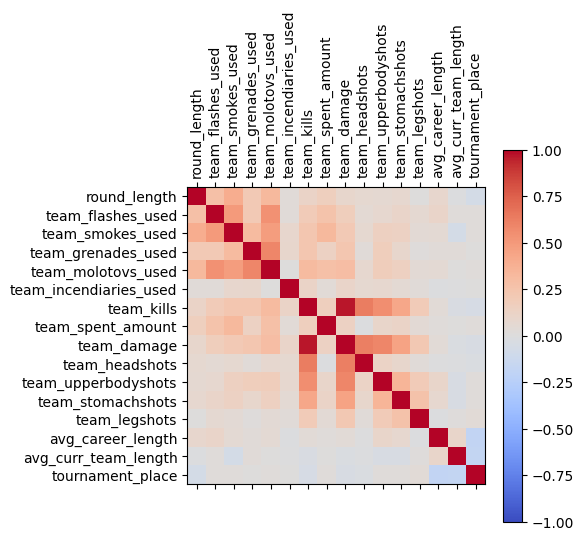

In [29]:
plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(t_teams_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(t_teams_corr.columns)), t_teams_corr.columns, rotation=90)
plt_pypl.yticks(range(len(t_teams_corr.index)), t_teams_corr.index)
plt_pypl.show()

In [30]:
t_teams_corr_filtered = t_teams_corr.stack().reset_index()
t_teams_corr_filtered.columns = ['Column 0', 'Column 1', 'correlation']

t_teams_corr_filtered['strength_category'] = t_teams_corr_filtered['correlation'].apply(classify_correlation)

t_teams_corr_filtered = t_teams_corr_filtered[t_teams_corr_filtered['Column 0'] < t_teams_corr_filtered['Column 1']]
t_teams_corr_filtered = t_teams_corr_filtered[t_teams_corr_filtered['correlation'].abs() >= 0.4]

# temporary filter pairs to remove that of metrics present in the complete aggregate statistics
prev_pairs = set(zip(significant_corrs['Column 0'], significant_corrs['Column 1'], significant_corrs['strength_category']))
t_teams_corr_filtered = t_teams_corr_filtered[
    ~t_teams_corr_filtered.apply(lambda row: (row['Column 0'], row['Column 1'], row['strength_category']) in prev_pairs, axis=1)
]

t_teams_corr_filtered.sort_values(by='correlation', ascending=False, inplace=True)
t_teams_corr_filtered.reset_index(drop=True, inplace=True)

t_teams_corr_filtered

,Column 0,Column 1,correlation,strength_category
0,team_headshots,team_kills,0.626719,strong
1,team_damage,team_headshots,0.622092,strong
2,team_grenades_used,team_molotovs_used,0.587380,moderate
3,team_molotovs_used,team_smokes_used,0.481750,moderate


For T side, we see a few new correlated pairs that appear that were not present in the complete aggregate statistics, namely:
- `team_grenades_used` and `team_molotovs_used`
- `team_molotovs_used` and `team_smokes_used`

Metrics that changed enough in strength to change classification include:
- `team_headshots` and `team_kills`: from moderate to strong
- `team_damage` and `team_headshots`: from moderate to strong

Similar to the CT side, the addition of the above metrics and the strengthening of existing metrics that include `team_molotovs_used` can be attributed to the fact that molotovs are exclusive to T side. Conversely, we also observe that metrics regarding incendiaries are missing from the list of moderate or stronger correlations as these utils are exclusive to CT-side.

Another intreseting observations to make here is there is now a correlation between `team_damage` and `team_stomachshots`


Now that we have observed how each column correlates with each other on both a complete and per-side basis, this time we look at the correlation of the win rate of each team against the other columns of our data set. This time we aggregate data by team and map as we want to observe the correlation of the win rate of a team against the other columns of our data set. In the following code block, we first aggregate the data per round and get the total, from there, we select the median of each column and then compare against the win rate of each team. Again we filter out the first rounds of each halves (i.e. rounds 1 and 13) as these are when the team economy is consistent to both sides with all members starting with $800.

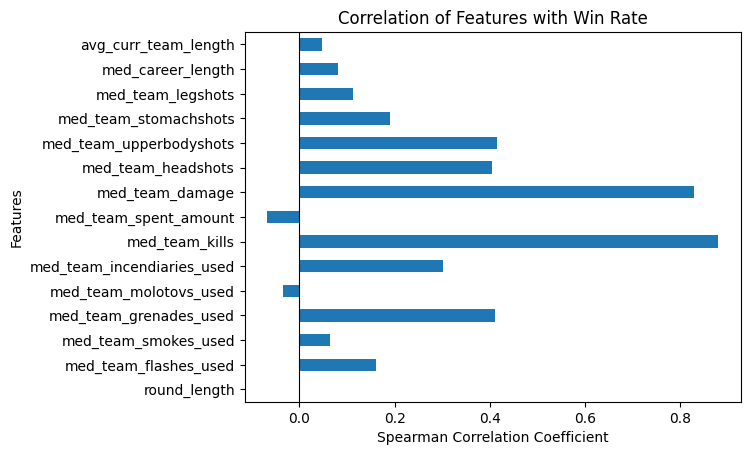

round_length                  0.000000
med_team_flashes_used         0.159916
med_team_smokes_used          0.064542
med_team_grenades_used        0.411526
med_team_molotovs_used       -0.034240
med_team_incendiaries_used    0.302141
med_team_kills                0.879617
med_team_spent_amount        -0.067832
med_team_damage               0.828007
med_team_headshots            0.405153
med_team_upperbodyshots       0.414741
med_team_stomachshots         0.190386
med_team_legshots             0.112710
med_career_length             0.081115
avg_curr_team_length          0.046536
dtype: float64

In [31]:
# filter out pistol rounds
win_rates_df = demos[
    (demos["round_number"] != 1) & (demos["round_number"] != 13)
].copy()

win_rates_df["team_won"] = (
    (
        (win_rates_df["team_name"] == win_rates_df["round_ct_team"])
        & (win_rates_df["round_result"] == "CT")
    )
    | (
        (win_rates_df["team_name"] != win_rates_df["round_ct_team"])
        & (win_rates_df["round_result"] == "T")
    )
).astype(int)


total_incendiaries_used = win_rates_df["player_incendiaries_used"].sum()
avg_incendiaries_per_round = (
    total_incendiaries_used / win_rates_df["round_id"].nunique()
)


# aggregate by team_name, map_id, and round_id
team_stats_normalized = (
    win_rates_df.groupby(["team_name", "map_id", "round_id", "round_number"])
    .agg(
        {
            "round_length": "mean",
            "player_flashes_used": "sum",
            "player_smokes_used": "sum",
            "player_grenades_used": "sum",
            "player_molotovs_used": "sum",
            "player_incendiaries_used": "sum",
            "player_kills": "sum",
            "player_spent_amount": "sum",
            "player_damage": "sum",
            "player_headshots": "sum",
            "player_upperbodyshots": "sum",
            "player_stomachshots": "sum",
            "player_legshots": "sum",
            "career_length": "mean",
            "curr_team_length": "mean",
            "team_won": "mean",
        }
    )
    .reset_index()
)

# get the median of the round totals
team_stats_normalized = team_stats_normalized.groupby(["team_name", "map_id"]).agg(
    {
        "round_length": "mean",
        "player_flashes_used": "median",
        "player_smokes_used": "median",
        "player_grenades_used": "median",
        "player_molotovs_used": "median",
        "player_incendiaries_used": "median",
        "player_kills": "median",
        "player_spent_amount": "median",
        "player_damage": "median",
        "player_headshots": "median",
        "player_upperbodyshots": "median",
        "player_stomachshots": "median",
        "player_legshots": "median",
        "career_length": "mean",
        "curr_team_length": "mean",
        "team_won": "mean",
    }
)

team_stats_normalized = team_stats_normalized.rename(
    columns={
        "player_flashes_used": "med_team_flashes_used",
        "player_smokes_used": "med_team_smokes_used",
        "player_grenades_used": "med_team_grenades_used",
        "player_molotovs_used": "med_team_molotovs_used",
        "player_incendiaries_used": "med_team_incendiaries_used",
        "player_kills": "med_team_kills",
        "player_spent_amount": "med_team_spent_amount",
        "player_damage": "med_team_damage",
        "player_headshots": "med_team_headshots",
        "player_upperbodyshots": "med_team_upperbodyshots",
        "player_stomachshots": "med_team_stomachshots",
        "player_legshots": "med_team_legshots",
        "career_length": "med_career_length",
        "curr_team_length": "avg_curr_team_length",
        "team_won": "win_rate",
    }
)

teams_win_rate_corr = team_stats_normalized.corrwith(
    team_stats_normalized["win_rate"], method="spearman"
)

# filter win_rate out of the correlation series
teams_win_rate_corr = teams_win_rate_corr[teams_win_rate_corr.index != "win_rate"]

teams_win_rate_corr.plot(kind="barh")
plt_pypl.title("Correlation of Features with Win Rate")
plt_pypl.xlabel("Spearman Correlation Coefficient")
plt_pypl.ylabel("Features")
plt_pypl.axvline(0, color="black", linewidth=0.8)
plt_pypl.show()

teams_win_rate_corr

Filtering the above correlations to get significant correlations, we get the following columns with moderate or stronger correlations with win rate:

In [32]:
significant_corrs = teams_win_rate_corr[teams_win_rate_corr.abs() >= 0.4]
significant_corrs.sort_values(ascending=False, inplace=True)
significant_corrs

med_team_kills             0.879617
med_team_damage            0.828007
med_team_upperbodyshots    0.414741
med_team_grenades_used     0.411526
med_team_headshots         0.405153
dtype: float64

We see here that there are two strong correlations of `med_team_lills` and `med_team_damage` to the win rate of a team, which is expected since this is a win condition of a round. An interesting correlation here that entered the moderate category is `med_team_grenades_used` as this shows that there could be observations to be made about it. 

Moving on, let's observe how each team performed during IEM Dallas in terms of win rate.

<Figure size 1200x600 with 0 Axes>

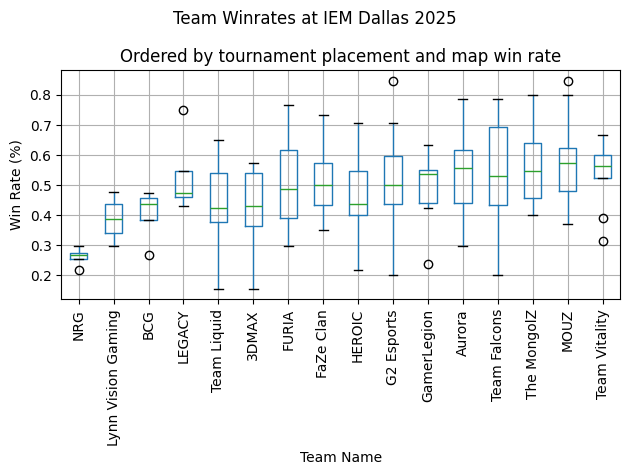

,team_name,tournament_place
0,Team Vitality,1
1,MOUZ,2
2,Team Falcons,3
3,The MongolZ,3
4,GamerLegion,5
5,Aurora,5
6,G2 Esports,7
7,HEROIC,7
8,3DMAX,9
9,FURIA,9


In [33]:
# plot it by team_name
plt_pypl.figure(figsize=(12, 6))

# Order teams by tournament placement then by median win rate
# Merge tournament_place from teams into team_stats_normalized by team_name
team_stats_normalized = team_stats_normalized.reset_index()
team_stats_normalized = pd.merge(
    team_stats_normalized,
    teams[['team_name', 'tournament_place']],
    on='team_name',
    how='left'
)
team_stats_normalized = team_stats_normalized.set_index(['team_name', 'map_id'])

ordered_teams = (
    team_stats_normalized.groupby("team_name")
    .agg({"win_rate": "median", "tournament_place": "median"})
    .sort_values(by=["tournament_place", "win_rate"], ascending=[False, True])
    .index
)

# Reindex to order by median win rate
team_stats_normalized_ordered = team_stats_normalized.reset_index()
team_stats_normalized_ordered["team_name"] = pd.Categorical(
    team_stats_normalized_ordered["team_name"], categories=ordered_teams, ordered=True
)
team_stats_normalized_ordered = team_stats_normalized_ordered.sort_values("team_name")

team_stats_normalized_ordered.boxplot(column="win_rate", by="team_name", rot=90)
plt_pypl.suptitle("Team Winrates at IEM Dallas 2025")
plt_pypl.title("Ordered by tournament placement and map win rate")
plt_pypl.xlabel("Team Name")
plt_pypl.ylabel("Win Rate (%)")
plt_pypl.grid(True)
plt_pypl.tight_layout()
plt_pypl.show()

teams

We see here that in the different places (13th, 9th, )

Let's now move onto the correlation matrix of the aggregated metrics by player per map/game.

,round_length,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_spent_amount,player_damage,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,win_rate
round_length,1.000000,0.122708,0.170832,0.111900,0.069489,0.021583,0.165382,-0.092007,0.136802,0.187139,0.025562,-0.016144,-0.162456,-0.062546,0.088144,0.220588
player_flashes_used,0.122708,1.000000,0.503167,-0.010655,0.174612,0.229821,0.243943,0.235739,0.131986,-0.078871,-0.127452,0.009529,0.148469,0.315576,0.103943,0.179623
player_smokes_used,0.170832,0.503167,1.000000,0.303763,0.322729,0.504973,-0.020835,0.296744,-0.119547,-0.045753,0.099162,0.126402,0.087676,0.119826,0.120442,0.221805
player_grenades_used,0.111900,-0.010655,0.303763,1.000000,0.550661,0.445961,0.259523,0.307637,0.365647,0.445977,0.542036,0.369753,0.259778,0.046839,0.111626,0.242106
player_molotovs_used,0.069489,0.174612,0.322729,0.550661,1.000000,0.346917,-0.023508,0.228376,0.126836,0.115388,0.272122,0.197562,0.277984,0.023780,0.201032,-0.078604
player_incendiaries_used,0.021583,0.229821,0.504973,0.445961,0.346917,1.000000,0.152077,0.530270,0.171934,0.269529,0.424925,0.472936,0.354584,-0.018980,0.215925,0.325578
player_kills,0.165382,0.243943,-0.020835,0.259523,-0.023508,0.152077,1.000000,0.412142,0.888656,0.486260,0.425843,0.356242,0.272772,-0.068895,0.000894,0.437607
player_spent_amount,-0.092007,0.235739,0.296744,0.307637,0.228376,0.530270,0.412142,1.000000,0.436047,0.359330,0.431746,0.460490,0.378298,-0.018190,0.076725,0.385348
player_damage,0.136802,0.131986,-0.119547,0.365647,0.126836,0.171934,0.888656,0.436047,1.000000,0.635207,0.562759,0.439076,0.377380,-0.091862,0.017797,0.366724
player_headshots,0.187139,-0.078871,-0.045753,0.445977,0.115388,0.269529,0.486260,0.359330,0.635207,1.000000,0.533376,0.267257,0.276815,-0.107382,-0.067911,0.233718


<Figure size 1000x800 with 0 Axes>

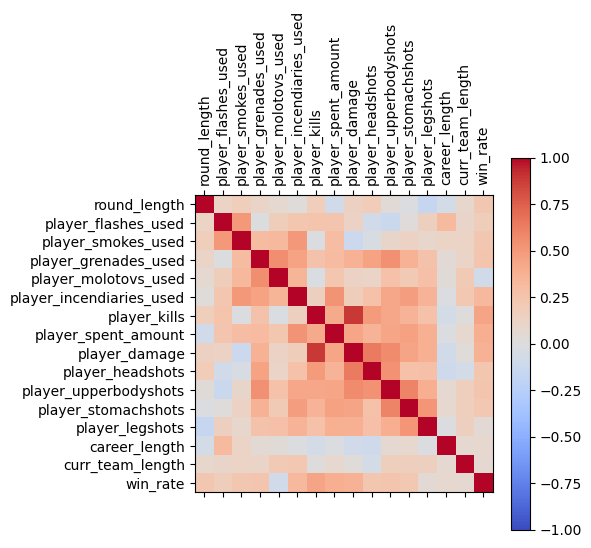

In [34]:
# aggregate player data with respect to the number of rounds they played

players_df = demos

players_df["win_rate"] = (
    (
        (players_df["team_name"] == players_df["round_ct_team"])
        & (players_df["round_result"] == "CT")
    )
    | (
        (players_df["team_name"] != players_df["round_ct_team"])
        & (players_df["round_result"] == "T")
    )
).astype(int)

players_df = demos.groupby(["player_name", "map_id"]).agg(
    {
        "round_length": "mean",
        "player_flashes_used": "sum",
        "player_smokes_used": "sum",
        "player_grenades_used": "sum",
        "player_molotovs_used": "sum",
        "player_incendiaries_used": "sum",
        "player_kills": "sum",
        "player_spent_amount": "sum",
        "player_damage": "sum",
        "player_headshots": "sum",
        "player_upperbodyshots": "sum",
        "player_stomachshots": "sum",
        "player_legshots": "sum",
        "career_length": "mean",
        "curr_team_length": "mean",
        "win_rate": "mean",
    }
)

players_df = players_df.groupby("player_name").agg(
    {
        "round_length": "mean",
        "player_flashes_used": "median",
        "player_smokes_used": "median",
        "player_grenades_used": "median",
        "player_molotovs_used": "median",
        "player_incendiaries_used": "median",
        "player_kills": "median",
        "player_spent_amount": "median",
        "player_damage": "median",
        "player_headshots": "median",
        "player_upperbodyshots": "median",
        "player_stomachshots": "median",
        "player_legshots": "median",
        # these two should be the exact same regardless of median or mean
        "career_length": "mean",
        "curr_team_length": "mean",
        # player win rate is number of wins / total
        "win_rate": "mean",
    }
)

players_corr = players_df.corr(method="spearman")

plt_pypl.figure(figsize=(10, 8))
plt_pypl.matshow(players_corr, cmap="coolwarm", vmin=-1, vmax=1)
plt_pypl.colorbar()
plt_pypl.xticks(range(len(players_corr.columns)), players_corr.columns, rotation=90)
plt_pypl.yticks(range(len(players_corr.index)), players_corr.index)


players_corr

Filtering metrics that have strong or very strong correlations, we get the following:

In [35]:
stacked = players_corr.stack().reset_index()
stacked.columns = ['Column 0', 'Column 1', 'correlation']

# filter self-correlations and symmetric duplicates
stacked = stacked[stacked['Column 0'] < stacked['Column 1']]

# filter correlations to moderate or stronger correlations
significant_corrs = stacked[stacked['correlation'].abs() >= 0.4]

significant_corrs = significant_corrs.sort_values(by=['correlation'], ascending=False).reset_index(drop=True)
significant_corrs

,Column 0,Column 1,correlation
0,player_damage,player_kills,0.888656
1,player_damage,player_headshots,0.635207
2,player_stomachshots,player_upperbodyshots,0.597921
3,player_damage,player_upperbodyshots,0.562759
4,player_grenades_used,player_molotovs_used,0.550661
5,player_grenades_used,player_upperbodyshots,0.542036
6,player_headshots,player_upperbodyshots,0.533376
7,player_incendiaries_used,player_spent_amount,0.530270
8,player_legshots,player_stomachshots,0.516754
9,player_incendiaries_used,player_smokes_used,0.504973


As shown in the list of moderate or stronger correlations, there appears to be no correlation between a player's longevity in their team or team longevity to any other columns or observations in our data set. 

In summary, we find in this subquestion that there is room for further analysis on the correlations between utilities and other utlilities or other metrics, including how team economy may influence other features. Beyond utils, we can investigate other columns that are correlated with win rate, such as kills and damage dealt, which are expected to be correlated with win rate.

In addition to this, the findings in this part can either be explained directly by game mechanics (such as hit types to damage and molotov's negative correlation to incendiary use) or by other factors (such as general grenade use to each other being explainable by economy). In any case, it is likely best to also explore other factors that may be more hidden via rule mining, but one must still consider that Counter-Strike is a complex game and there is no one factor that can completely explain a win or loss.

### EDA Question #2: Are there any features that where data-mining techniques can be applied?

For this question, we will be diverting

Let's peek at `smokes.csv` to see what information we can get with respect to specific maps. We saw earlier that there are columns containing coordinates of where smoke grenades were thrown.

In [36]:
smokes.head(10)

,entityid,tick,user_name,x,y,z,round_number,map_name,matchid,mapid,player_team,winner,team_name,is_win,start_tick,round_tick
0,169,12792,s1mple,-1122.86560,-869.907400,34.713615,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,1729
1,90,14385,EliGE,1100.84220,-278.237980,117.153130,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,3322
2,279,15567,Skullz,1262.36410,-237.993740,111.616290,3,de_ancient,0,0,FaZe Clan,CT,CT,True,11063,4504
3,186,21584,NAF,-522.72723,296.841130,162.031280,4,de_ancient,0,0,Team Liquid,T,T,True,19930,1654
4,463,21679,EliGE,-1142.09720,-899.746800,35.276768,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,1749
5,198,21913,ultimate,881.11926,-770.223000,30.028742,4,de_ancient,0,0,Team Liquid,T,T,True,19930,1983
6,243,22526,NertZ,-854.42773,-114.491806,82.925870,4,de_ancient,0,0,Team Liquid,T,T,True,19930,2596
7,365,22572,karrigan,356.43665,-925.062500,156.315610,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,2642
8,167,22992,Skullz,1191.58890,-282.035430,109.900986,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,3062
9,154,23033,frozen,-1049.75680,-797.737550,35.971947,4,de_ancient,0,0,FaZe Clan,T,CT,False,19930,3103


Let's observe what we can do with the coordinates, let's look at a sample plot of the smoke lineups on a map.

Text(0.5, 1.0, 'Smoke Lineups on de_ancient')

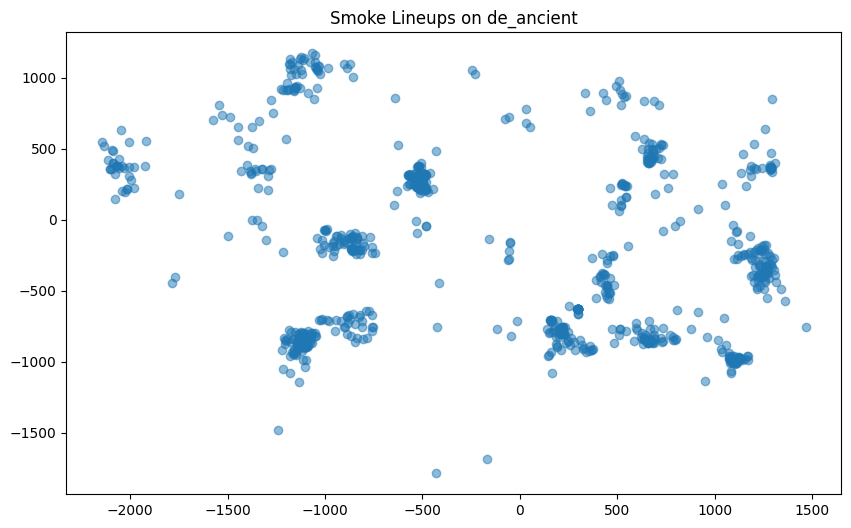

In [37]:
smoke_sample = smokes[smokes['map_name'] == 'de_ancient'].copy()

# create a scatter plot of smoke distance vs smoke time
plt_pypl.figure(figsize=(10, 6))
plt_pypl.scatter(smoke_sample['x'], smoke_sample['y'], alpha=0.5)
plt_pypl.title('Smoke Lineups on de_ancient')

We notice above that certain points that certain points in the map are concentrated in certain areas, we can observe this further through clustering and perhaps even observe it with respect to maps. This can give us insights into smoke grenade lineups and strategies that players use on specific maps.

Let's look at some of our non quantitative features that we haven't already looked at in demos.csv, specifically the player loadout.

In [38]:
demos['player_loadout'].head(10)

0          Butterfly Knife, Glock-18, C4 Explosive
1    Talon Knife, Glock-18, Smoke Grenade, Molotov
2                             M9 Bayonet, Glock-18
3         Karambit, P250, Smoke Grenade, Flashbang
4                                  Karambit, USP-S
5             Shadow Daggers, P2000, Smoke Grenade
6                   Butterfly Knife, Dual Berettas
7                               Talon Knife, USP-S
8                       Karambit, USP-S, Flashbang
9                               Karambit, Glock-18
Name: player_loadout, dtype: object

Looking at this small snippet, we can potentially apply association rule mining techniques to the player loadout data to find interesting patterns or correlations between the items that players buy and use in their loadouts. This can help us understand the common strategies or preferences of players in terms of their equipment choices.

### EDA Question #3: Are there any categorical factors that can be used to bin and compare different groups of data?

Let's recall the features in demos.

In [39]:
demos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 0 to 14279
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   match_id                     13840 non-null  int64  
 1   map_id                       13840 non-null  int64  
 2   round_id                     13840 non-null  int64  
 3   team_name                    13840 non-null  object 
 4   map_name                     13840 non-null  object 
 5   round_number                 13840 non-null  int64  
 6   round_ct_team                13840 non-null  object 
 7   round_first_site_hit         10140 non-null  object 
 8   round_site_hit_time          8010 non-null   float64
 9   round_bomb_plant_site        7120 non-null   object 
 10  player_planted_bomb          13840 non-null  bool   
 11  round_bomb_plant_time        7120 non-null   float64
 12  round_bomb_defuser           13840 non-null  bool   
 13  bomb_defuse_time     

Let's look at whether the hit site is the same as the bomb site planted on. To recall, we imputed columns that do not have a hit site which may be caused by either nobody on T side reaching the bomb site or CS:2's game engine not recording the hit site due to a bug.

In [40]:
# for the rest of this section, we will create a variable that contains unique rounds
unique_rounds = demos.copy().drop_duplicates(subset=['round_id', 'map_id'])
unique_rounds

,match_id,map_id,round_id,team_name,map_name,round_number,round_ct_team,round_first_site_hit,round_site_hit_time,round_bomb_plant_site,player_planted_bomb,round_bomb_plant_time,round_bomb_defuser,bomb_defuse_time,round_length,round_result,round_timeout_called_before,player_name,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_died,player_spent_amount,player_loadout,player_damage,round_first_killer,round_first_death,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,tournament_place,player_loadout_array,win_rate
0,0,0,0,Team Liquid,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,NertZ,0,0,0,0,0,1,True,650,"Butterfly Knife, Glock-18, C4 Explosive",100,False,False,1,1,1,0,93,4,9,"[Glock-18, C4 Explosive]",0
10,0,0,1,Team Liquid,de_ancient,2,FaZe Clan,NaN,NaN,NaN,False,NaN,False,NaN,65.125000,CT,NaN,NertZ,0,0,0,1,0,0,True,2200,"Butterfly Knife, Tec-9, Molotov, Smoke Grenade",19,False,False,0,0,0,1,93,4,9,"[Tec-9, Molotov, Smoke Grenade]",0
20,0,0,2,Team Liquid,de_ancient,3,FaZe Clan,B,93.000000,B,False,103.500000,False,NaN,113.546875,T,NaN,NertZ,0,0,0,0,0,0,True,700,"Butterfly Knife, Desert Eagle",0,False,False,0,0,0,0,93,4,9,[Desert Eagle],1
30,0,0,3,Team Liquid,de_ancient,4,FaZe Clan,A,45.093750,A,False,80.546875,False,NaN,115.312500,T,NaN,NertZ,1,1,1,1,0,1,False,4900,"Butterfly Knife, Glock-18, AK-47, Smoke Grenad...",100,False,False,1,0,0,0,93,4,9,"[Glock-18, AK-47, Smoke Grenade, Molotov, High...",1
40,0,0,4,Team Liquid,de_ancient,5,FaZe Clan,A,37.640625,NaN,False,NaN,False,NaN,48.343750,T,NaN,NertZ,0,1,1,1,0,0,True,1200,"Butterfly Knife, Glock-18, AK-47, Smoke Grenad...",106,False,False,0,4,1,0,93,4,9,"[Glock-18, AK-47, Smoke Grenade, Molotov, High...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14230,28,70,1423,Team Vitality,de_inferno,17,Team Vitality,A,55.359375,A,False,66.140625,False,NaN,107.140625,T,MOUZ,apEX,2,1,1,0,0,0,False,0,"Nomad Knife, USP-S, Flashbang, M4A1-S, Incendi...",9,False,False,0,0,0,0,151,79,1,"[USP-S, Flashbang, M4A1-S, Incendiary Grenade,...",0
14240,28,70,1424,Team Vitality,de_inferno,18,Team Vitality,A,84.500000,A,False,94.890625,False,NaN,135.890620,T,Team Vitality,apEX,2,1,1,0,1,0,False,500,"Nomad Knife, USP-S, AK-47, High Explosive Gren...",0,False,False,0,0,0,0,151,79,1,"[USP-S, AK-47, High Explosive Grenade, Incendi...",0
14250,28,70,1425,Team Vitality,de_inferno,19,Team Vitality,A,35.515625,A,False,51.265625,False,NaN,88.265625,T,NaN,apEX,1,1,1,0,1,2,True,6050,"Nomad Knife, USP-S, AK-47, Smoke Grenade, Flas...",291,False,False,2,3,0,0,151,79,1,"[USP-S, AK-47, Smoke Grenade, Flashbang, High ...",0
14260,28,70,1426,Team Vitality,de_inferno,20,Team Vitality,NaN,NaN,NaN,False,NaN,False,NaN,107.078125,CT,NaN,apEX,0,0,0,1,0,1,False,1950,"Nomad Knife, USP-S, MAG-7",142,True,False,2,2,1,0,151,79,1,"[USP-S, MAG-7]",1


In [41]:
demos_site_hits = unique_rounds[~demos["round_first_site_hit"].isna()].copy()

demos_site_hits_unique = demos_site_hits[
    [
        "map_id",
        "round_id",
        "round_first_site_hit",
        "round_site_hit_time",
        "round_bomb_plant_site",
        "player_planted_bomb",
        "round_bomb_plant_time",
        "round_bomb_defuser",
    ]
]

# seperate rows with a bomb plant and rows without a bomb plant

demos_plants = demos_site_hits_unique[~demos_site_hits_unique["round_bomb_plant_site"].isna()].copy().reset_index(drop=True)
demos_no_plants = demos_site_hits_unique[demos_site_hits_unique["round_bomb_plant_site"].isna()].copy().reset_index(drop=True)

demos_plants

C:\Users\rek\AppData\Local\Temp\ipykernel_29372\1553941057.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demos_site_hits = unique_rounds[~demos["round_first_site_hit"].isna()].copy()


,map_id,round_id,round_first_site_hit,round_site_hit_time,round_bomb_plant_site,player_planted_bomb,round_bomb_plant_time,round_bomb_defuser
0,0,2,B,93.000000,B,False,103.500000,False
1,0,3,A,45.093750,A,False,80.546875,False
2,0,5,A,33.328125,A,False,40.890625,False
3,0,7,A,100.890625,A,False,113.093750,False
4,0,8,B,NaN,B,True,112.218750,False
...,...,...,...,...,...,...,...,...
707,70,1418,A,40.125000,A,False,66.640625,False
708,70,1420,A,97.000000,A,False,110.187500,True
709,70,1423,A,55.359375,A,False,66.140625,False
710,70,1424,A,84.500000,A,False,94.890625,False


Let's plot `demos_plants` vs `demos_no_plants`

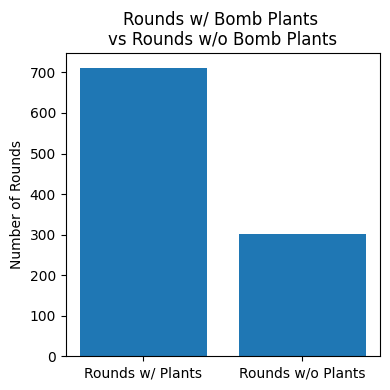

,Round Group,Counts
0,Rounds w/ Plants,712
1,Rounds w/o Plants,302


In [42]:
counts = {
    "Round Group": ["Rounds w/ Plants", "Rounds w/o Plants"],
    "Counts": [demos_plants.shape[0], demos_no_plants.shape[0]]
}

site_counts = pd.DataFrame(counts)


plt_pypl.figure(figsize=(4, 4))
plt_pypl.bar(site_counts["Round Group"], site_counts["Counts"])
plt_pypl.title("Rounds w/ Bomb Plants \nvs Rounds w/o Bomb Plants")
plt_pypl.ylabel("Number of Rounds")
plt_pypl.tight_layout()
plt_pypl.show()

site_counts

We see here that there were 712 rounds where the bomb was planted and 302 rounds where the bomb was not planted implying that only 62.8% of rounds where a site hit was recorded had the bomb planted.

Of those 712 rounds where that have bomb planted, let's plot the number of rounds where the first site hit is the same as the bomb site planted on to get an idea of how many times a team rotated to another site or performed a split push.

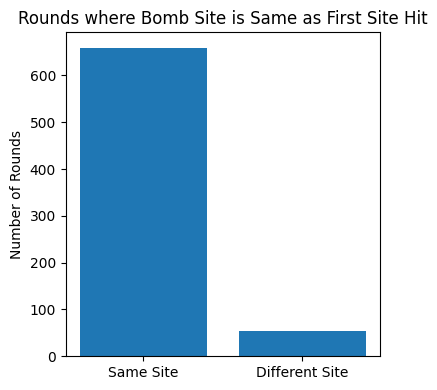

,is_same_site,count
1,Same Site,659
0,Different Site,53


In [43]:
demos_plants['is_same_site'] = demos_plants['round_bomb_plant_site'] == demos_plants['round_first_site_hit']
site_group_counts = demos_plants.groupby('is_same_site').size().reset_index(name='count').sort_values(by='count', ascending=False)

site_group_counts['is_same_site'] = site_group_counts['is_same_site'].map({True: 'Same Site', False: 'Different Site'})

plt_pypl.figure(figsize=(4, 4))
plt_pypl.bar(site_group_counts["is_same_site"], site_group_counts["count"])
plt_pypl.title("Rounds where Bomb Site is Same as First Site Hit")
plt_pypl.ylabel("Number of Rounds")
plt_pypl.tight_layout()
plt_pypl.show()

site_group_counts

We see that of the 659 rounds where the bomb was planted, 53 (~8.0%) had the first site hit be the same as the bomb site planted on, meaning that in 92.0% of rounds where the bomb was planted, the team rotated to another site or performed a split push.

Let's now observe whether a round timeout affected the outcome of a round. We will be looking at the `round_timeout_called_before` column in our demos data set.

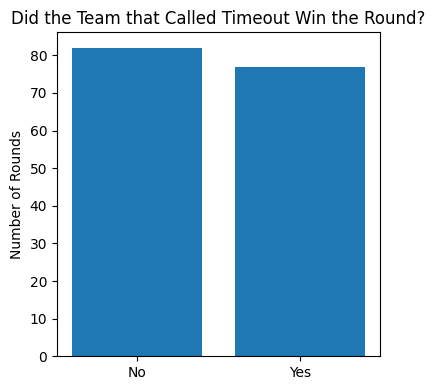

,caller_won,count
0,No,82
1,Yes,77


In [44]:
timeout_rounds = (
    unique_rounds[unique_rounds["round_timeout_called_before"].notna()]
    .copy()
    .reset_index(drop=True)
)

timeout_rounds["caller_won"] = (
    (
        (
            timeout_rounds["round_ct_team"]
            == timeout_rounds["round_timeout_called_before"]
        )
        & (timeout_rounds["round_result"] == "CT")
    )
    | (
        (
            timeout_rounds["round_ct_team"]
            == timeout_rounds["round_timeout_called_before"]
        )
        & (timeout_rounds["round_result"] == "T")
    )
).astype(int)

timeout_rounds = timeout_rounds.groupby("caller_won").agg({"round_id": "count"}).reset_index()

timeout_rounds["caller_won"] = timeout_rounds["caller_won"].map({0: "No", 1: "Yes"})
timeout_rounds.rename(columns={"round_id": "count"}, inplace=True)

plt_pypl.figure(figsize=(4, 4))
plt_pypl.bar(timeout_rounds["caller_won"], timeout_rounds["count"])
plt_pypl.title("Did the Team that Called Timeout Win the Round?")
plt_pypl.ylabel("Number of Rounds")
plt_pypl.tight_layout()
plt_pypl.show()

timeout_rounds

We see that the team that called the time out lost 5 more rounds than they won, there may be no correlation between calling a timeout and winning a round.

We want to observe whether a team is more likely to rush if a timeout was called before the round. We will be looking at the `round_timeout_called_before` column in our demos data set.

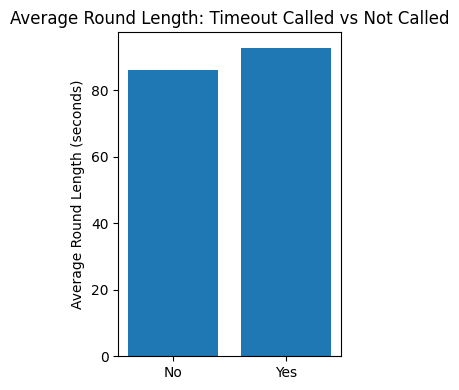

,timeout_called,round_length
0,No,86.097538
1,Yes,92.695460


In [45]:
rinaldo_hungry = unique_rounds.groupby(unique_rounds["round_timeout_called_before"].notna())
rinaldo_hungry = rinaldo_hungry.agg({"round_length": "mean"}).reset_index()

rinaldo_hungry.rename(columns={"round_timeout_called_before": "timeout_called"}, inplace=True)

rinaldo_hungry['timeout_called'] = rinaldo_hungry['timeout_called'].map({False: 'No', True: 'Yes'})

plt_pypl.figure(figsize=(3, 4))
plt_pypl.bar(rinaldo_hungry['timeout_called'], rinaldo_hungry['round_length'])
plt_pypl.title('Average Round Length: Timeout Called vs Not Called')
# plt_pypl.xlabel('Timeout Called Before Round')
plt_pypl.ylabel('Average Round Length (seconds)')
plt_pypl.tight_layout()
plt_pypl.show()

rinaldo_hungry

We notice the average round length is greater in the rounds where a timeout was called before the round compared to the rounds where a timeout was not called before the round. This difference is worth investigating further, giving insight into the impact of timeout calls on round length and potentially on team performance.


We now look to investigate whether there is a difference in site hit time and bomb plant times between rounds that lead to either T or CT side winning. We will be looking at the `round_first_site_hit`, `round_site_hit_time`, and `round_bomb_plant_time` columns in our demos data set.

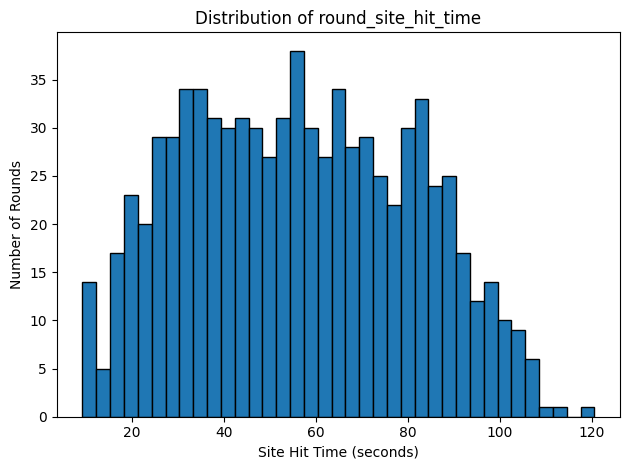

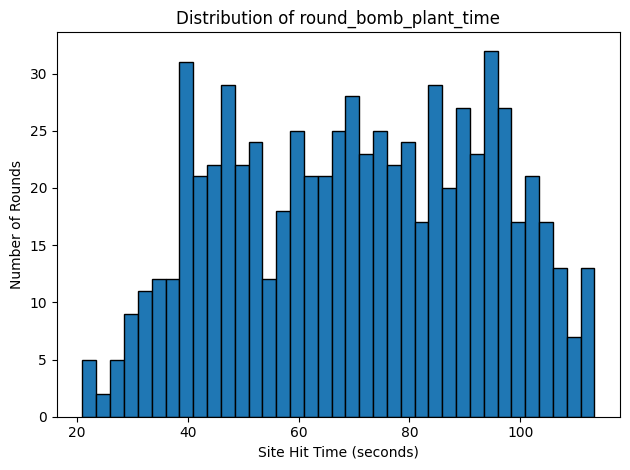

In [46]:
# this block is to determine whether we should use average or median for the round length

sqrt_num_rounds = int(np.sqrt(unique_rounds['round_id'].count()))

unique_rounds['round_site_hit_time'].plot.hist(bins=sqrt_num_rounds, edgecolor='black')
plt_pypl.title('Distribution of round_site_hit_time')
plt_pypl.xlabel('Site Hit Time (seconds)')
plt_pypl.ylabel('Number of Rounds')
plt_pypl.tight_layout()
plt_pypl.show()

unique_rounds['round_bomb_plant_time'].plot.hist(bins=sqrt_num_rounds, edgecolor='black')
plt_pypl.title('Distribution of round_bomb_plant_time')
plt_pypl.xlabel('Site Hit Time (seconds)')
plt_pypl.ylabel('Number of Rounds')
plt_pypl.tight_layout()
plt_pypl.show()

Given the plots histograms above, we see that while our distribution is near symmetrical, we will use the median as the distributions are not normally distributed.

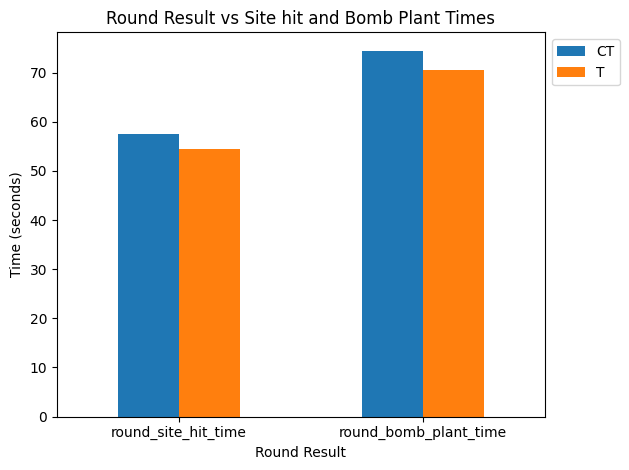

round_result,CT,T
round_site_hit_time,57.609375,54.546875
round_bomb_plant_time,74.484375,70.609375


In [47]:
# group by round result
round_result_grouped = unique_rounds.groupby('round_result').agg({
    'round_site_hit_time': 'median',
    'round_bomb_plant_time': 'median'
}).reset_index()

round_result_grouped.set_index('round_result', inplace=True)

round_result_grouped.T.plot.bar(rot=0)
plt_pypl.title("Round Result vs Site hit and Bomb Plant Times")
plt_pypl.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt_pypl.ylabel("Time (seconds)")
plt_pypl.xlabel("Round Result")
plt_pypl.tight_layout()
plt_pypl.show()

round_result_grouped.T

In the graph above there appears to be little difference in the average site hit time and average round bomb plant time between rounds that ended with T or CT wining.

Next, let's look at the map winrates to see if we can get anything from it

<Axes: title={'center': 'Win Rate per Map'}, xlabel='Map Name', ylabel='Win Rate (%)'>

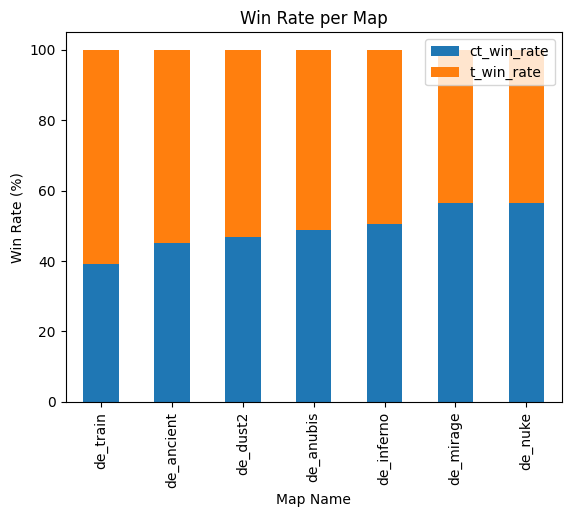

In [48]:
total_rounds_per_map_name_df = demos.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
total_rounds_per_map_name_df.columns = ['map_name', 'total_rounds']

t_wins_per_map_df = demos.loc[(demos['round_result'] == "T") & (demos['team_name'] != demos['round_ct_team'])]
t_wins_per_map_df = t_wins_per_map_df.groupby( 'map_name')['round_id'].nunique().to_frame().reset_index()
t_wins_per_map_df.columns = ['map_name', 't_wins']

average_t_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, t_wins_per_map_df, on=['map_name'])
average_t_wins_per_map_df['t_win_rate'] = average_t_wins_per_map_df['t_wins'] / average_t_wins_per_map_df['total_rounds'] * 100

average_t_wins_per_map_df = average_t_wins_per_map_df.sort_values(by='t_win_rate', ascending=False)
average_t_wins_per_map_df.index = average_t_wins_per_map_df['map_name']

ct_wins_per_map_df = demos.loc[(demos['round_result'] == "CT") & (demos['team_name'] == demos['round_ct_team'])]
ct_wins_per_map_df = ct_wins_per_map_df.groupby('map_name')['round_id'].nunique().to_frame().reset_index()
ct_wins_per_map_df.columns = ['map_name', 'ct_wins']

average_ct_wins_per_map_df = pd.merge(total_rounds_per_map_name_df, ct_wins_per_map_df, on=['map_name'])
average_ct_wins_per_map_df['ct_win_rate'] = average_ct_wins_per_map_df['ct_wins'] / average_ct_wins_per_map_df['total_rounds'] * 100

average_ct_wins_per_map_df.sort_values(by="ct_win_rate", ascending=False, inplace=True)
average_ct_wins_per_map_df.index = average_ct_wins_per_map_df['map_name']

pd.merge(average_t_wins_per_map_df, average_ct_wins_per_map_df, how="inner", left_index=True, right_index=True)[['map_name_x', 'ct_win_rate', 't_win_rate']].plot.bar(x='map_name_x', title='Win Rate per Map', xlabel='Map Name', ylabel='Win Rate (%)', stacked=True)

As we can see, each map has some amount of difference in winrate, which we could also test later on.

Overall, some of the interesting tests we can do from this are the following:
* Using a Chi-Square test to determine if the number of rounds where bomb is planted/not planted and map are dependent
* Using a Chi-Square test to determine if the number of rounds where bomb is planted on the same site as the first site hit are the same and map are dependent
* Using a Chi-Square test to determine if the map and winrate are dependent
* Using an unpaired t-test to determine if mean round lengths are different in rounds with and without timeout
* Using an unpaired t-test to determine if mean site hit time changes on rounds where T-side versus when CT-side wins
* Using an unpaired t-test to determine if mean bomb plant time changes on rounds where T-side versus when CT-side wins

In summary, this is what we got from our EDA:

* Generally, there we no strong correlations that we found that couldn't directly be explained by game mechanics or other factors. However, it showed us that Counter-Strike 2 is a very complex game and the different factors affect each other like a web
* Our data includes some features that we can perform rule mining on. Specifically, we can use Association Rule Mining on player inventories and clustering on smoke grenades.
* There are many qualitative factors that we can perform tests on

## Analysis and Tests

For some of our tests, we created a helper function for our Chi-Square tests

In [49]:
from scipy.stats import chi2_contingency, chi2
import numpy as np

def perform_chi_squared_test(contingency_table, test_name):
    """
    Perform chi-squared test and display results with interpretation
    """
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    n = contingency_table.sum()
    cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
    
    print(f"\n=== {test_name} ===")
    print(f"Chi-squared statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Cramér's V (effect size): {cramers_v:.4f}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"SIGNIFICANT (p < {alpha}): There IS a statistically significant association")
    else:
        print(f"NOT SIGNIFICANT (p >= {alpha}): There is NO statistically significant association")
    
    if cramers_v < 0.1:
        effect_size = "negligible"
    elif cramers_v < 0.3:
        effect_size = "small"
    elif cramers_v < 0.5:
        effect_size = "medium"
    else:
        effect_size = "large"
    
    print(f"Effect size: {effect_size}")
    print(f"Contingency table:")
    print(contingency_table)
    print(f"Expected frequencies:")
    print(expected.round(2))
    
    return chi2_stat, p_value, cramers_v

### First Kill vs Round Win

**Research Question**: Is there an association between which team gets the first kill in a round and their likelihood of winning that round?

$H_0$: A team having the first kill and their result (win/loss) are independent

$H_a$: A team having the first kill and their result (win/loss) are dependent

In [50]:
first_kill_data = demos[demos['round_first_killer'] == True].copy()

first_kill_data['killer_team_side'] = np.where(
    first_kill_data['team_name'] == first_kill_data['round_ct_team'], 
    'CT', 'T'
)

first_kill_data['killer_team_won'] = (
    ((first_kill_data['killer_team_side'] == 'CT') & (first_kill_data['round_result'] == 'CT')) |
    ((first_kill_data['killer_team_side'] == 'T') & (first_kill_data['round_result'] == 'T'))
)

first_kill_rounds = first_kill_data.groupby(['round_id']).agg({
    'killer_team_side': 'first',
    'killer_team_won': 'first'
}).reset_index()

firstkill_win_crosstab = pd.crosstab(first_kill_rounds['killer_team_side'], 
                                    first_kill_rounds['killer_team_won'])

print(f"\nSample size: {len(first_kill_rounds)} rounds with first kill data")
print(f"CT first kills: {firstkill_win_crosstab.loc['CT'].sum()}")
print(f"T first kills: {firstkill_win_crosstab.loc['T'].sum()}")


Sample size: 1383 rounds with first kill data
CT first kills: 788
T first kills: 595


In [51]:
chi2_stat, p_value, cramers_v = perform_chi_squared_test(
    firstkill_win_crosstab.values, 
    "First Kill vs Round Win"
)


=== First Kill vs Round Win ===
Chi-squared statistic: 3.5079
p-value: 0.0611
Degrees of freedom: 1
Cramér's V (effect size): 0.0504
NOT SIGNIFICANT (p >= 0.05): There is NO statistically significant association
Effect size: negligible
Contingency table:
[[226 562]
 [143 452]]
Expected frequencies:
[[210.25 577.75]
 [158.75 436.25]]


In [52]:
ct_firstkill_winrate = firstkill_win_crosstab.loc['CT', True] / firstkill_win_crosstab.loc['CT'].sum()
t_firstkill_winrate = firstkill_win_crosstab.loc['T', True] / firstkill_win_crosstab.loc['T'].sum()

print(f"\nFirst kill advantage:")
print(f"CT first kill win rate: {ct_firstkill_winrate:.3f}")
print(f"T first kill win rate: {t_firstkill_winrate:.3f}")
print(f"Overall first kill advantage: {(ct_firstkill_winrate + t_firstkill_winrate) / 2:.3f}")


First kill advantage:
CT first kill win rate: 0.713
T first kill win rate: 0.760
Overall first kill advantage: 0.736


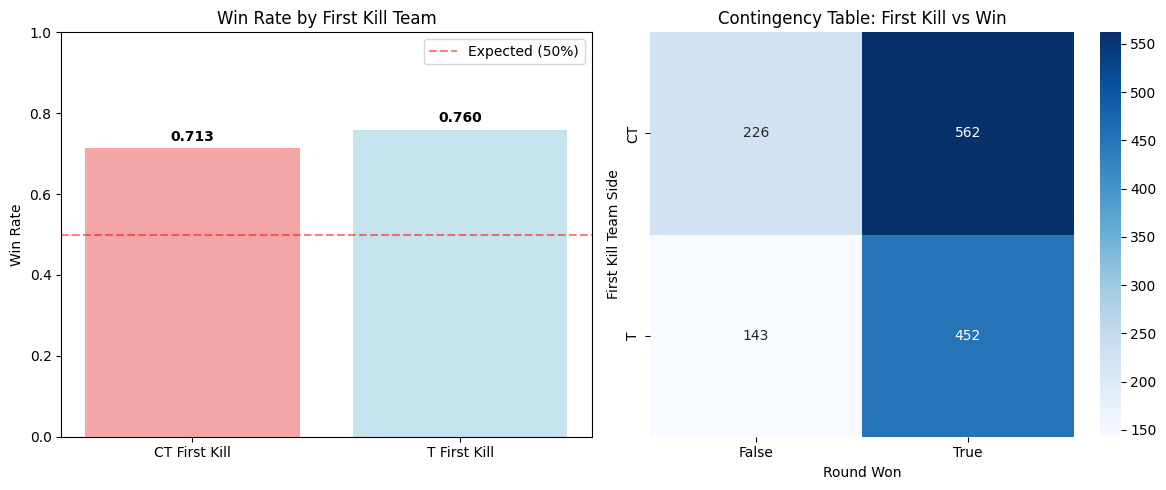

In [53]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(12, 5))

teams = ['CT First Kill', 'T First Kill']
win_rates = [ct_firstkill_winrate, t_firstkill_winrate]
bars = ax1.bar(teams, win_rates, color=['lightcoral', 'lightblue'], alpha=0.7)
ax1.set_ylabel('Win Rate')
ax1.set_title('Win Rate by First Kill Team')
ax1.set_ylim(0, 1)
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Expected (50%)')
ax1.legend()

for bar, rate in zip(bars, win_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{rate:.3f}', ha='center', va='bottom', fontweight='bold')


sns.heatmap(firstkill_win_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Contingency Table: First Kill vs Win')
ax2.set_xlabel('Round Won')
ax2.set_ylabel('First Kill Team Side')

plt.pyplot.tight_layout()
plt.pyplot.show()

Due to the p-value $p = 0.0556 < \alpha = 0.05$, we fail to reject $H_0$

Therefore, getting the first kill and winning the round are independent.

### Map vs Round Winner (CT/T Bias)

**Research Question**: Do different maps show bias toward CT or T side wins?

$H_0$: The map and per-side winrate are independent

$H_a$: The map and per-side winrate are dependent

In [54]:
map_rounds = demos.groupby(['round_id']).agg({
    'map_name': 'first',
    'round_result': 'first'
}).reset_index()

map_result_crosstab = pd.crosstab(map_rounds['map_name'], 
                                 map_rounds['round_result'])

print(f"\nSample size: {len(map_rounds)} total rounds")
print("Rounds per map:")
for map_name in map_result_crosstab.index:
    total_rounds = map_result_crosstab.loc[map_name].sum()
    ct_wins = map_result_crosstab.loc[map_name, 'CT']
    ct_rate = ct_wins / total_rounds
    print(f"{map_name}: {total_rounds} rounds, CT win rate: {ct_rate:.3f}")


Sample size: 1384 total rounds
Rounds per map:
de_ancient: 111 rounds, CT win rate: 0.450
de_anubis: 82 rounds, CT win rate: 0.488
de_dust2: 292 rounds, CT win rate: 0.469
de_inferno: 280 rounds, CT win rate: 0.504
de_mirage: 287 rounds, CT win rate: 0.564
de_nuke: 258 rounds, CT win rate: 0.566
de_train: 74 rounds, CT win rate: 0.392


In [55]:
chi2_stat, p_value, cramers_v = perform_chi_squared_test(
    map_result_crosstab.values, 
    "Map vs Round Winner (CT/T Bias)"
)


=== Map vs Round Winner (CT/T Bias) ===
Chi-squared statistic: 14.4895
p-value: 0.0246
Degrees of freedom: 6
Cramér's V (effect size): 0.1023
SIGNIFICANT (p < 0.05): There IS a statistically significant association
Effect size: small
Contingency table:
[[ 50  61]
 [ 40  42]
 [137 155]
 [141 139]
 [162 125]
 [146 112]
 [ 29  45]]
Expected frequencies:
[[ 56.54  54.46]
 [ 41.77  40.23]
 [148.74 143.26]
 [142.63 137.37]
 [146.2  140.8 ]
 [131.42 126.58]
 [ 37.7   36.3 ]]


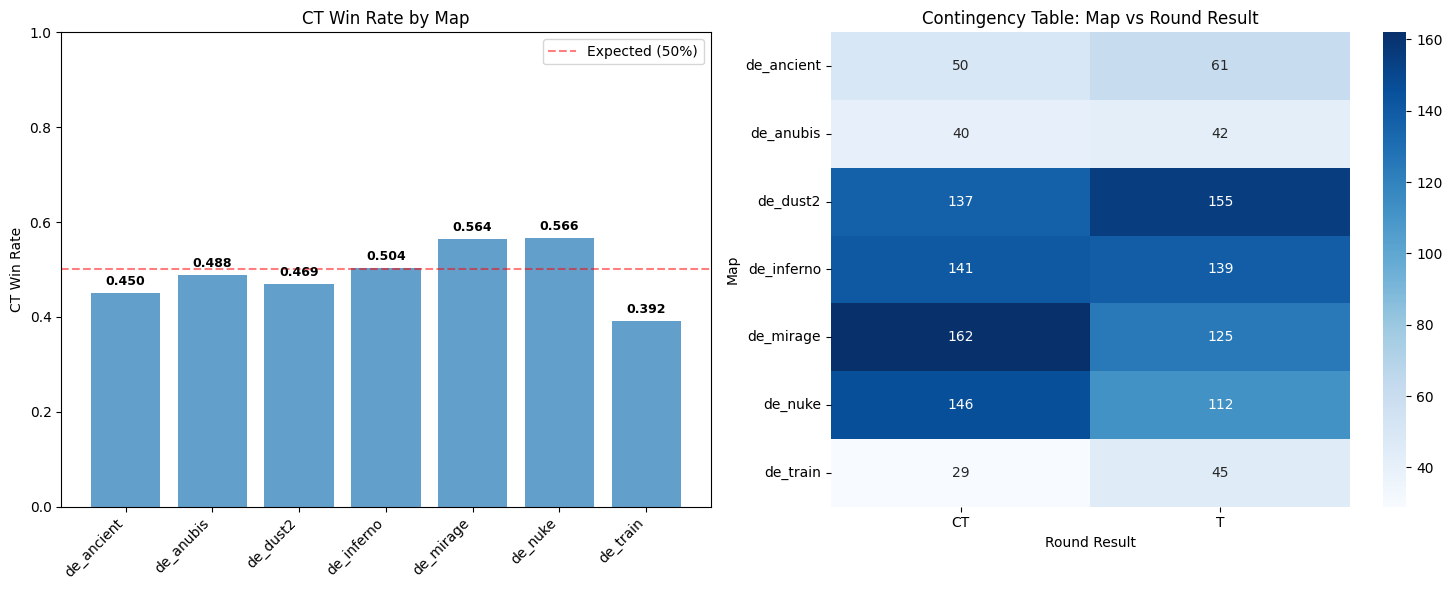

In [56]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(15, 6))

maps = map_result_crosstab.index
ct_winrates = []
for map_name in maps:
    total = map_result_crosstab.loc[map_name].sum()
    ct_wins = map_result_crosstab.loc[map_name, 'CT']
    ct_winrates.append(ct_wins / total)

bars = ax1.bar(range(len(maps)), ct_winrates, alpha=0.7)
ax1.set_xticks(range(len(maps)))
ax1.set_xticklabels(maps, rotation=45, ha='right')
ax1.set_ylabel('CT Win Rate')
ax1.set_title('CT Win Rate by Map')
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Expected (50%)')
ax1.legend()
ax1.set_ylim(0, 1)

for i, (bar, rate) in enumerate(zip(bars, ct_winrates)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{rate:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

sns.heatmap(map_result_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Contingency Table: Map vs Round Result')
ax2.set_xlabel('Round Result')
ax2.set_ylabel('Map')

plt.pyplot.tight_layout()
plt.pyplot.show()

Due to the p-value $p = 0.0236 < \alpha = 0.05$, we reject $H_0$

Therefore, the map and per-side winrate are likely dependent.

## Pistol Round Win vs Map Performance

**Research Question**: Is there an association between winning pistol rounds (rounds 1 and 16) and overall map performance?

$H_0$: A team winning pistol round and them winning the map are independent

$H_a$: A team winning pistol round and them winning the map are dependent

In [57]:
team_map_performance = []

for (match_id, map_id), map_data in demos.groupby(['match_id', 'map_id']):
    map_name = map_data['map_name'].iloc[0]
    
    for team in map_data['team_name'].unique():
        team_data = map_data[map_data['team_name'] == team]
        
        team_rounds = team_data.groupby('round_id').agg({
            'round_number': 'first',
            'round_result': 'first',
            'round_ct_team': 'first',
            'team_name': 'first'
        }).reset_index()
        
        team_rounds['team_won'] = (
            ((team_rounds['team_name'] == team_rounds['round_ct_team']) & (team_rounds['round_result'] == 'CT')) |
            ((team_rounds['team_name'] != team_rounds['round_ct_team']) & (team_rounds['round_result'] == 'T'))
        )
        
        # Pistol rounds (1 and 16)
        pistol_rounds = team_rounds[team_rounds['round_number'].isin([1, 16])]
        pistol_wins = pistol_rounds['team_won'].sum()
        
        total_rounds = len(team_rounds)
        total_wins = team_rounds['team_won'].sum()
        
        performance_category = 'Good' if total_wins / total_rounds >= 0.5 else 'Poor'

        pistol_category = 'Won Most' if pistol_wins >= 1 else 'Won None'
        
        team_map_performance.append({
            'match_id': match_id,
            'map_id': map_id,
            'team': team,
            'map_name': map_name,
            'pistol_wins': pistol_wins,
            'pistol_category': pistol_category,
            'total_wins': total_wins,
            'total_rounds': total_rounds,
            'performance_category': performance_category
        })

performance_df = pd.DataFrame(team_map_performance)

pistol_perf_crosstab = pd.crosstab(performance_df['pistol_category'], 
                                  performance_df['performance_category'])

print(f"\nSample size: {len(performance_df)} team-map performances")
print(f"Teams that won most pistols: {pistol_perf_crosstab.loc['Won Most'].sum()}")
print(f"Teams that won no pistols: {pistol_perf_crosstab.loc['Won None'].sum()}")


Sample size: 130 team-map performances
Teams that won most pistols: 100
Teams that won no pistols: 30


In [58]:
chi2_stat, p_value, cramers_v = perform_chi_squared_test(
    pistol_perf_crosstab.values, 
    "Pistol Round Win vs Map Performance"
)


=== Pistol Round Win vs Map Performance ===
Chi-squared statistic: 2.4131
p-value: 0.1203
Degrees of freedom: 1
Cramér's V (effect size): 0.1362
NOT SIGNIFICANT (p >= 0.05): There is NO statistically significant association
Effect size: small
Contingency table:
[[55 45]
 [11 19]]
Expected frequencies:
[[50.77 49.23]
 [15.23 14.77]]


In [59]:
won_most_good = pistol_perf_crosstab.loc['Won Most', 'Good'] / pistol_perf_crosstab.loc['Won Most'].sum()
won_none_good = pistol_perf_crosstab.loc['Won None', 'Good'] / pistol_perf_crosstab.loc['Won None'].sum()

print(f"\nPerformance by pistol success:")
print(f"Teams that won most pistols - good performance rate: {won_most_good:.3f}")
print(f"Teams that won no pistols - good performance rate: {won_none_good:.3f}")
print(f"Difference: {abs(won_most_good - won_none_good):.3f}")


Performance by pistol success:
Teams that won most pistols - good performance rate: 0.550
Teams that won no pistols - good performance rate: 0.367
Difference: 0.183


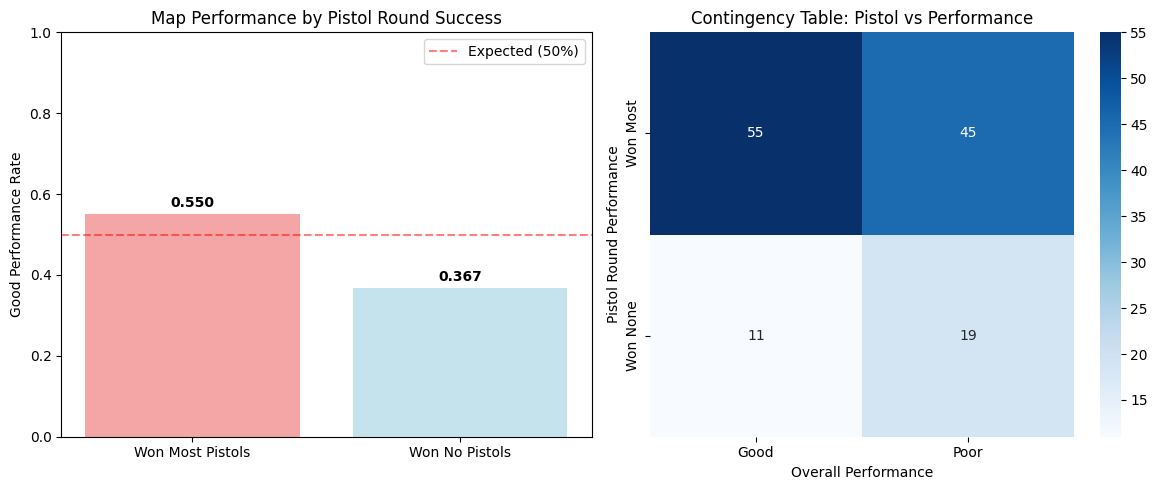

In [60]:
fig, (ax1, ax2) = plt.pyplot.subplots(1, 2, figsize=(12, 5))

categories = ['Won Most Pistols', 'Won No Pistols']
good_rates = [won_most_good, won_none_good]
bars = ax1.bar(categories, good_rates, color=['lightcoral', 'lightblue'], alpha=0.7)
ax1.set_ylabel('Good Performance Rate')
ax1.set_title('Map Performance by Pistol Round Success')
ax1.set_ylim(0, 1)
ax1.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Expected (50%)')
ax1.legend()

for bar, rate in zip(bars, good_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{rate:.3f}', ha='center', va='bottom', fontweight='bold')

sns.heatmap(pistol_perf_crosstab, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Contingency Table: Pistol vs Performance')
ax2.set_xlabel('Overall Performance')
ax2.set_ylabel('Pistol Round Performance')

plt.pyplot.tight_layout()
plt.pyplot.show()

Due to the p-value $p = 0.0820 < \alpha = 0.05$, we fail to reject $H_0$

Therefore, winning pistol round and winning the map are independent.

### Determining if Mean Round Lengths are Different in Rounds With and Without Timeout

For this part, we will use an unpaired t-test to determine if there is a difference in mean round lengths in rounds with and without timeout

Our null hypothesis $H_0$ will be there is no difference in the average round length in rounds with versus without timeouts

Our alternate  hypothesis $H_a$ will be there is a difference in the average round length in rounds with versus without timeouts

These tests will be performed with $\alpha=0.05$

First, we obtain our two groups from our dataset:

In [61]:
rounds_with_timeouts = demos.loc[~demos['round_timeout_called_before'].isna()].drop_duplicates(subset=['round_id'])['round_length']
rounds_with_timeouts.head(5)

60     66.093750
190    97.437500
220    42.312500
290    60.062500
340    85.171875
Name: round_length, dtype: float64

In [62]:
rounds_without_timeouts = demos.loc[demos['round_timeout_called_before'].isna()].drop_duplicates(subset=['round_id'])['round_length']
rounds_without_timeouts.head(5)

0      57.937500
10     65.125000
20    113.546875
30    115.312500
40     48.343750
Name: round_length, dtype: float64

Next, we perform the t-test:

In [63]:
stats.ttest_ind(rounds_with_timeouts, rounds_without_timeouts)

TtestResult(statistic=np.float64(2.7686405664351414), pvalue=np.float64(0.005704278101797772), df=np.float64(1382.0))

Since we obtained $p=0.0057 < \alpha=0.05$, we reject $H_0$

Therefore, there is a difference in round times if a timeout was called versus without

### Determining if Site Hit Time is Different where T versus CT win

For this part, we will use an unpaired t-test to determine if there is a difference in mean site hit time if T wins versus if CT wins

Our null hypothesis $H_0$ will be there is no difference in the average site hit time in rounds where T wins versus if CT wins

Our alternate  hypothesis $H_a$ will be there is a difference in the average site hit time in rounds where T wins versus if CT wins

These tests will be performed with $\alpha=0.05$

First, we obtain our two groups from our dataset:

In [64]:
site_hit_times_t = demos.loc[demos['round_result'] == 'T'].drop_duplicates(subset='round_id')['round_site_hit_time'].dropna()
site_hit_times_t.head(5)

20     93.000000
30     45.093750
40     37.640625
50     33.328125
110    15.296875
Name: round_site_hit_time, dtype: float64

In [65]:
site_hit_times_ct = demos.loc[demos['round_result'] == 'CT'].drop_duplicates(subset='round_id')['round_site_hit_time'].dropna()
site_hit_times_ct.head(5)

0       23.078125
60      64.765625
70     100.890625
200     76.843750
210     25.046875
Name: round_site_hit_time, dtype: float64

Next, we perform the t-test:

In [66]:
stats.ttest_ind(site_hit_times_t, site_hit_times_ct)

TtestResult(statistic=np.float64(-0.657191973893648), pvalue=np.float64(0.5112467435502706), df=np.float64(799.0))

Since we obtained $p=0.5112 > \alpha=0.05$, we do not reject $H_0$

Therefore, there is no evidence to suggest that the site hit time is different between rounds that were won by T versus rounds won by CT.

However, a limitation of this test is that there are a significant number of rounds where `site_hit_time` is `NaN`, which places doubts on this test.

### Determining if Bomb Plant Time is Different where T versus CT Win

For this part, we will use an unpaired t-test to determine if there is a difference in mean bomb plant time if T wins versus if CT wins

Our null hypothesis $H_0$ will be there is no difference in the average bomb plant time in rounds where T wins versus if CT wins

Our alternate  hypothesis $H_a$ will be there is a difference in the average bomb plant time in rounds where T wins versus if CT wins

These tests will be performed with $\alpha=0.05$

First, we obtain our two groups from our dataset:

In [67]:
round_bomb_plant_times_t = demos.loc[demos['round_result'] == 'T'].drop_duplicates(subset='round_id')['round_bomb_plant_time'].dropna()
round_bomb_plant_times_t.head(5)

20    103.500000
30     80.546875
50     40.890625
80    112.218750
90     94.953125
Name: round_bomb_plant_time, dtype: float64

In [68]:
round_bomb_plant_times_ct = demos.loc[demos['round_result'] == 'CT'].drop_duplicates(subset='round_id')['round_bomb_plant_time'].dropna()
round_bomb_plant_times_ct.head(5)

70     113.093750
120     46.437500
210     43.281250
240    113.234375
400    100.984375
Name: round_bomb_plant_time, dtype: float64

Next, we perform the t-test:

In [69]:
stats.ttest_ind(round_bomb_plant_times_t, round_bomb_plant_times_ct)

TtestResult(statistic=np.float64(-1.8647100927662066), pvalue=np.float64(0.06263443463188705), df=np.float64(710.0))

Since we obtained $p=0.0626 > \alpha=0.05$, we fail to reject $H_0$

Therefore, there is no evidence to suggest that the bomb time is different between rounds that were won by T versus rounds won by CT.

However, a limitation of this test is that there are a significant number of rounds where `bomb_plant_time` is `NaN`, which places doubts on this test.

### Bomb Plant per Map


Each round for all maps, a terrorist team may be able to plant the bomb. This test is done to see if the map being played upon affects the rate at which the terrorist are able to plant the bomb. To do this, the contingency table must be extracted; wherein the column indices are whether the bomb has been planted or not, and the row indices are the maps. This will then undergo chi-square test, since we are looking for the independence of two categorical variables.

With this in mind, the null hypothesis would be: "The map and the terrorist team being successful in planting a bomb is independent of each other."

The test will be at 95% confidence level, where p must be < 0.05 to reject the null hypothesis. 

In [70]:
bomb_df = demos.drop_duplicates(subset=['round_id'])[['round_id', 'map_name', 'round_first_site_hit', 'round_bomb_plant_site']]
bomb_df['bomb_planted'] = bomb_df['round_bomb_plant_site'].notnull().astype(int)


#### Contingency table

In [71]:
bomb_plant_contingency_table = pd.crosstab(bomb_df['map_name'], bomb_df['bomb_planted'])
bomb_plant_contingency_table

bomb_planted,0,1
map_name,,
de_ancient,45,66
de_anubis,38,44
de_dust2,141,151
de_inferno,120,160
de_mirage,150,137
de_nuke,143,115
de_train,35,39


#### Chi-Square Test



In [72]:
chi2, p, dof, expected = chi2_contingency(bomb_plant_contingency_table)
print(f"p = {p:.4f}")

p = 0.0405


With p-value = 0.0515, we fail to reject the null hypothesis. Thus, it can be said that the terrorist team being able to successfully plant the bomb is independent with the map played. This can mean that the map does not necessarily favor or hinder terrorists in planting the bomb. There may be other factors that are more fit to be associated with the terrorist team being able to plant the bomb.

### Bomb Plant and First Site Hit

In some rounds, players do not plant at the same site as the first site that they entered in. There can be instances where players "rotate" to another site after they entered another site. This part of the testing determines the dependence of players planting the bomb in the same site they first entered in with the map being played upon. This will be tested via chi-square contingency as the relevant variables are categorical in nature. Keep in mind that we ignored any `NaN` site hit values for this test.

With this in mind, the null hypothesis would be: "The terrorist team successfully planting in the same site as they first entered in is independent with the map"

The test will be at 95% confidence level, where p must be < 0.05 to reject the null hypothesis. 

In [73]:
same_site_df = bomb_df.copy()
same_site_df.dropna(subset=['round_first_site_hit'], inplace=True)

same_site_df['same_site_hit'] = (same_site_df['round_first_site_hit'] == same_site_df['round_bomb_plant_site'])

same_site_df = same_site_df.loc[same_site_df['bomb_planted'] == 1]

#### Contingency Table

In [74]:
same_site_contingency_table = pd.crosstab(same_site_df['map_name'], same_site_df['same_site_hit'])
same_site_contingency_table

same_site_hit,False,True
map_name,,
de_ancient,5,61
de_anubis,4,40
de_dust2,6,145
de_inferno,9,151
de_mirage,6,131
de_nuke,12,103
de_train,11,28


#### Chi-Square Test

In [75]:
chi2, p, dof, expected = chi2_contingency(same_site_contingency_table, correction=False)
print(f"p = {p:.4f}")

p = 0.0000


With p-value = 0.0016, we reject the null hypothesis. Thus, it can be said that having the bomb planted on the same site as the first site hit is dependent with map played. This means that certain maps may be associated with certain strategies with regards to attack "rotation". There can be maps where players often choose to rotate to another site, and there are maps where the first site hit is the optimal site to plant the bomb on. 

### Analyzing How Common Groups of Weapons Affect Winrate

For the inventory data, we wanted to see how common sets of weapons (guns) that a team bought in a round affected their probability of winning. In order to do this, we used Association Rule Mining to determine these rules followed by Chi-Square tests to determine if the presence of each mined rule has a signifiant correlation with round win. For this test, each round was converted to a basket, then we used a modified association rule mining algorithm that factors in quantities of items.

#### The Intuition

An input basket to this algorithm will look like the following: $B = \{AK_1, AK_2, AK_3, M4_1, M4_2, win\}$

Each subscript refers to the $nth$ occurence of an item.

Given a mined rule $I_n$ where $I$ is an item and $n$ is the $nth$ occurence of the item, the rule can be interpreted as "the itemset contained at least $n$ of $I$". 

With this method, the above basket $B$ contains "at least 1, 2 and 3 AK and at least 1 and 2 M4". 

Since we are using "at least", any basket with containing $I_x$ will also contain $I_{x-1}$ if $x \geq 2$. Due to this, any item $I_{n+1}$ will increase the support of any itemset cotaining $I_n$.

Since there may be generated rules that contain duplicates such as $\{ AK_1, AK_2, M4_2 \} \rightarrow \{ win \}$, only the **highest** one is kept, since having a higher minimum quantity implies the lower one.

#### The General Process

Our plan for the association rule mining of inventories is as follows:

1. Perform additional data cleaning, such as by ignoring empty inventories caused by players dropping their gun when the inventories were recorded
2. Determine the "best" weapon of a player (primary weapon first, fallback secondary - more on this later)
3. Create baskets with the 5 guns of each team per round, and an additional "win" or "loss" item for round result
4. Mark duplicate guns (i.e. $\{AK, AK, AK, M4, M4, win\}$ becomes $\{AK_1, AK_2, AK_3, M4_1, M4_2, win\}$)
5. Perform Association Rule Mining using the Apriori algorithm on the generated baskets
6. Filter rules to only include those that have a consequent of "win" or "loss"
7. Keep only "highest" quantities of each rule and discard duplicates
8. Perform Chi-Square tests on the final rules to confirm statistical significance of the correlation between the presence of the rule and the round/result

#### Removing Rounds with Empty Inventories

Some players had no guns in their inventory at the tick that inventories were recorded. Since these values are just outliars, we decided to ignore these rounds which these incomplete inventories to avoid any strange results. Since the data would still be useful for other tests, we only ignore them for the inventory association rule mining.

In [76]:
outliar_rounds = demos.loc[demos['player_loadout_array'].str.len() == 0]['round_id'].values

demos_inventory = demos.loc[demos['round_id'].isin(outliar_rounds) == False]

#### Determining the Player's Weapon

In Counter-Strike, guns can be either "primary" (for guns including, but not limited to rifles, sub-machine guns and shotguns), or "secondary" (mostly for pistols). Each player can carry up to only one gun of each type. For the sake of analysis, we counted the primary weapon of each player, and fallback to their secondary gun if they do not have a primary gun.

To do this filtering, we first list down all items seen in the dataset:

In [77]:
item_types = demos_inventory['player_loadout_array'].explode().unique()
item_types

array(['Glock-18', 'C4 Explosive', 'Smoke Grenade', 'Molotov', 'P250',
       'Flashbang', 'USP-S', 'P2000', 'Dual Berettas', 'Tec-9',
       'Desert Eagle', 'MP9', 'Incendiary Grenade',
       'High Explosive Grenade', 'FAMAS', 'AK-47', 'M4A1-S', 'M4A4',
       'AWP', 'Galil AR', 'Five-SeveN', 'Decoy Grenade', 'MAC-10', 'AUG',
       'Zeus x27', 'SSG 08', 'XM1014', 'MAG-7', 'SG 553', 'CZ75-Auto',
       'MP7', 'MP5-SD', 'UMP-45'], dtype=object)

Then, we manually sorted them out as either "primary" or "secondary" gun based on the in-game classification:

In [78]:
secondaries = ['Glock-18', 'P250', 'USP-S', 'P2000', 'Dual Berettas', 'Tec-9',
       'Desert Eagle', 'CZ75-Auto', 'Five-SeveN']

primaries = ['MP9', 'FAMAS', 'AK-47', 'M4A1-S', 'M4A4',
       'AWP', 'Galil AR', 'MAC-10', 'AUG',
       'SSG 08', 'XM1014', 'MAG-7', 'SG 553', 
       'MP7', 'MP5-SD', 'UMP-45']

primary_ser = demos_inventory['player_loadout_array'].apply(lambda x: list(filter(lambda y: y is not None, [(item if item in primaries else None) for item in x]))).apply(lambda x: x[0] if len(x) > 0 else None)
demos_inventory = demos_inventory.assign(primary_weapon=primary_ser)

secondary_ser = demos_inventory['player_loadout_array'].apply(lambda x: list(filter(lambda y: y is not None, [(item if item in secondaries else None) for item in x]))).apply(lambda x: x[0] if len(x) > 0 else None)
demos_inventory = demos_inventory.assign(secondary_weapon=secondary_ser)

weapon_ser = np.where(demos_inventory['primary_weapon'].notna(), demos_inventory['primary_weapon'], demos_inventory['secondary_weapon'])
demos_inventory = demos_inventory.assign(weapon=weapon_ser)


demos_inventory.loc[demos_inventory['weapon'].isna()]

,match_id,map_id,round_id,team_name,map_name,round_number,round_ct_team,round_first_site_hit,round_site_hit_time,round_bomb_plant_site,player_planted_bomb,round_bomb_plant_time,round_bomb_defuser,bomb_defuse_time,round_length,round_result,round_timeout_called_before,player_name,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_died,player_spent_amount,player_loadout,player_damage,round_first_killer,round_first_death,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,tournament_place,player_loadout_array,win_rate,primary_weapon,secondary_weapon,weapon
5694,13,29,569,Team Falcons,de_ancient,15,HEROIC,A,67.312500,A,False,83.218750,False,NaN,109.265625,T,NaN,Magisk,0,1,0,0,0,0,True,2700,"Bayonet, C4 Explosive",0,False,False,0,0,0,0,115,17,3,[C4 Explosive],1,None,None,None
6114,13,31,611,Team Falcons,de_dust2,6,HEROIC,A,51.781250,NaN,False,NaN,False,NaN,92.125000,CT,NaN,kyxsan,0,1,0,0,0,0,True,2700,"M9 Bayonet, Smoke Grenade, Flashbang",0,False,False,0,0,0,0,61,4,3,"[Smoke Grenade, Flashbang]",0,None,None,None
6559,14,33,655,Lynn Vision Gaming,de_anubis,11,FURIA,B,34.828125,B,False,50.437500,False,85.593750,85.593750,CT,NaN,z4KR,0,0,0,0,0,0,True,700,"Karambit, C4 Explosive",39,False,False,0,1,0,0,73,69,13,[C4 Explosive],0,None,None,None
8476,18,43,847,FURIA,de_nuke,12,FURIA,B,34.359375,A,False,85.546875,False,NaN,115.765625,T,NaN,FalleN,1,1,0,0,0,0,True,3750,"Butterfly Knife, Flashbang, Smoke Grenade",0,False,False,0,0,0,0,128,22,9,"[Flashbang, Smoke Grenade]",0,None,None,None
9260,20,47,926,Team Falcons,de_dust2,9,MOUZ,B,86.031250,B,False,96.968750,False,126.109375,126.109375,CT,Team Falcons,kyxsan,2,1,0,0,0,0,True,5600,"Karambit, Flashbang",0,False,False,0,0,0,0,61,4,3,[Flashbang],0,None,None,None
12249,25,61,1224,GamerLegion,de_nuke,18,Team Falcons,A,NaN,A,True,60.265625,False,NaN,101.265625,T,GamerLegion,REZ,1,0,0,0,0,2,False,3100,"M9 Bayonet, Smoke Grenade",178,False,False,0,10,2,0,112,4,5,[Smoke Grenade],1,None,None,None
13375,27,67,1337,Team Vitality,de_inferno,1,Team Vitality,A,44.703125,NaN,False,NaN,False,NaN,53.250000,CT,NaN,apEX,0,0,0,0,0,0,False,700,"Nomad Knife, Flashbang",0,False,False,0,0,0,0,151,79,1,[Flashbang],1,None,None,None


#### Removing additional outliar rounds

Upon attempting to get the player's weapon, we saw that some rounds still had no weapon. We realized that the original filtering only got rid of empty inventories and not inventories that contain some non-gun items such as grenades. Because these rounds still don't have weapons, we had to get rid of these rounds. 

In [79]:
demos_inventory.loc[demos_inventory['weapon'].isna()]['round_id'].values

array([ 569,  611,  655,  847,  926, 1224, 1337])

Getting rid of the rounds:

In [80]:
more_outliar_rounds = demos_inventory.loc[demos_inventory['weapon'].isna()]['round_id'].values
demos_inventory = demos_inventory.loc[demos_inventory['round_id'].isin(more_outliar_rounds) == False]
demos_inventory.loc[demos_inventory['weapon'].isna()]['round_id'].values

array([], dtype=int64)

#### Adding a "Result" Column

We add a result column in order to make adding $win$ or $loss$ to baskets easier later on

In [81]:
result = (demos_inventory['round_result'] == 'CT') & (demos_inventory['round_ct_team'] == demos_inventory['team_name']) | (demos_inventory['round_result'] == 'T') & (demos_inventory['round_ct_team'] != demos_inventory['team_name'])
demos_inventory = demos_inventory.assign(result=result) # makes it easier for us to do ARM
demos_inventory

,match_id,map_id,round_id,team_name,map_name,round_number,round_ct_team,round_first_site_hit,round_site_hit_time,round_bomb_plant_site,player_planted_bomb,round_bomb_plant_time,round_bomb_defuser,bomb_defuse_time,round_length,round_result,round_timeout_called_before,player_name,player_flashes_used,player_smokes_used,player_grenades_used,player_molotovs_used,player_incendiaries_used,player_kills,player_died,player_spent_amount,player_loadout,player_damage,round_first_killer,round_first_death,player_headshots,player_upperbodyshots,player_stomachshots,player_legshots,career_length,curr_team_length,tournament_place,player_loadout_array,win_rate,primary_weapon,secondary_weapon,weapon,result
0,0,0,0,Team Liquid,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,NertZ,0,0,0,0,0,1,True,650,"Butterfly Knife, Glock-18, C4 Explosive",100,False,False,1,1,1,0,93,4,9,"[Glock-18, C4 Explosive]",0,None,Glock-18,Glock-18,False
1,0,0,0,Team Liquid,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,NAF,0,1,0,1,0,1,True,700,"Talon Knife, Glock-18, Smoke Grenade, Molotov",122,False,False,1,3,2,0,128,87,9,"[Glock-18, Smoke Grenade, Molotov]",0,None,Glock-18,Glock-18,False
2,0,0,0,Team Liquid,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,ultimate,0,0,0,0,0,1,True,650,"M9 Bayonet, Glock-18",100,True,False,1,1,0,0,39,10,9,[Glock-18],0,None,Glock-18,Glock-18,False
3,0,0,0,Team Liquid,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,Twistzz,1,1,0,0,0,0,True,800,"Karambit, P250, Smoke Grenade, Flashbang",0,False,False,0,0,0,0,115,17,9,"[P250, Smoke Grenade, Flashbang]",0,None,P250,P250,False
4,0,0,0,FaZe Clan,de_ancient,1,FaZe Clan,A,23.078125,NaN,False,NaN,False,NaN,57.937500,CT,NaN,frozen,0,0,0,0,0,1,True,650,"Karambit, USP-S",179,False,False,1,5,0,0,115,17,9,[USP-S],1,None,USP-S,USP-S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,28,70,1427,MOUZ,de_inferno,21,Team Vitality,NaN,NaN,NaN,False,NaN,False,NaN,40.953125,CT,NaN,torzsi,2,1,0,1,0,0,True,3900,"Butterfly Knife, Glock-18, Galil AR, Smoke Gre...",0,False,False,0,0,0,0,82,40,2,"[Glock-18, Galil AR, Smoke Grenade, Molotov, F...",0,Galil AR,Glock-18,Galil AR,False
14276,28,70,1427,Team Vitality,de_inferno,21,Team Vitality,NaN,NaN,NaN,False,NaN,False,NaN,40.953125,CT,NaN,flameZ,1,1,1,0,0,1,True,2400,"Skeleton Knife, Smoke Grenade, AK-47, Flashban...",100,True,False,1,1,0,0,81,23,1,"[Smoke Grenade, AK-47, Flashbang, Incendiary G...",1,AK-47,Five-SeveN,AK-47,True
14277,28,70,1427,Team Vitality,de_inferno,21,Team Vitality,NaN,NaN,NaN,False,NaN,False,NaN,40.953125,CT,NaN,mezii,0,0,0,0,0,2,False,2900,"Karambit, Five-SeveN, AK-47, Smoke Grenade, Hi...",177,False,False,0,5,1,1,74,18,1,"[Five-SeveN, AK-47, Smoke Grenade, High Explos...",1,AK-47,Five-SeveN,AK-47,True
14278,28,70,1427,MOUZ,de_inferno,21,Team Vitality,NaN,NaN,NaN,False,NaN,False,NaN,40.953125,CT,NaN,Spinx,0,0,1,0,0,0,True,7600,"Karambit, Glock-18, AK-47, Molotov, High Explo...",0,False,False,0,0,0,0,78,4,2,"[Glock-18, AK-47, Molotov, High Explosive Gren...",0,AK-47,Glock-18,AK-47,False


#### Generating Baskets

We first create a function is used to generate baskets by obtaining an aggregate of each team per round and adding "win" or "loss" depending on the round's result

In [82]:
def create_baskets_df(demos_inventory: pd.DataFrame):
    baskets_df = demos_inventory.groupby(
        ['round_id', 'team_name']
        )['weapon'].apply(
            lambda x : [a for a in x] + ["win" if demos_inventory.loc[
                (demos_inventory['round_id'] == x.name[0]) & (demos_inventory['team_name'] == x.name[1])
            ]['result'].iloc[0] == True else "loss"]
        ).reset_index().rename(columns={"weapon": "basket"})
    baskets_df = pd.merge(baskets_df, demos_inventory, how="inner", on=["team_name", "round_id"])[['round_id', 'team_name', 'basket', 'result']]
    baskets_df = baskets_df.drop_duplicates(subset=['round_id', 'team_name']).reset_index()
    baskets_df = baskets_df.assign(result=baskets_df['result'].apply(lambda x: "win" if x else "loss"))
    return baskets_df

#### Marking Duplicate Guns

The next function takes each basket and marks duplicate items using a map (Python object)

In [83]:
def mark_duplicates(basket: list):
    new_list = []
    counts = {}
    basket_clone = copy.deepcopy(basket)
    while len(basket_clone) != 0:
        item = basket_clone.pop(0)
        if item not in new_list:
            counts[item] = 1 if item not in counts else counts[item] + 1
            new_list += [item + "_" + str(counts[item]) if item != 'win' and item != 'loss' else item]
        else:
            new_list += [item + "_1" if item != 'win' and item != 'loss' else item]
    return new_list


This function then uses the above function and marks all of duplicates in all baskets in a dataframe

In [84]:
def mark_duplicates_in_df(baskets_df: pd.DataFrame):
    baskets_df = baskets_df.assign(marked_basket=baskets_df['basket'].apply(mark_duplicates))
    return baskets_df

#### Running Apriori Association Rule Mining

After getting a dataframe of marked baskets, we then run the standard Apriori algorithm for Association Rule Mining. This function also takes care of filtering to only rules with "win" or "loss" as a consequent. The minimum support in the library we are using, `mlxtend`, requires a support as a fraction of $\frac{min\ amount}{total\ items}$, so we needed to perform this calculation to get the minimum support 

In [85]:
def generate_rules_df(baskets_df: pd.DataFrame, min_rounds: int):
    te = TransactionEncoder()
    te_ary = te.fit(baskets_df['marked_basket']).transform(baskets_df['marked_basket'])
    basket_df = pd.DataFrame(te_ary, columns=te.columns_)

    min_support = min_rounds / (len(baskets_df) / 2)

    frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

    # Filtering for rules where 'win' or 'loss' is the consequence
    winloss_rules = rules[(rules['consequents'] == {'loss'}) | (rules['consequents'] == {'win'})]
    return winloss_rules

#### Keeping Only the Highest Sets

The `extract_highest` function takes a set and extracts the highest occurence of an item.

The `process_winloss_df` function applies the `extract_highest` function and removes the duplicate rules. Since higher quantity "items" imply all lower quantities, the supports of all duplicates are the same and removing duplicates is a "safe" operation.

In [86]:
def extract_highest(set: frozenset[str]):
    outset = {}
    for item in set:
        split = item.split('_')
        if split[0] not in outset or outset[split[0]] < split[1]:
            outset[split[0]] = split[1]
    items = []
    for item in outset:
        items += [item + "_" + str(outset[item])]
    return frozenset(items)

def process_winloss_df(winloss_rules: pd.DataFrame):
    winloss_rules = winloss_rules.assign(antecedents=winloss_rules['antecedents'].apply(extract_highest))
    winloss_rules = winloss_rules.drop_duplicates()
    winloss_rules = winloss_rules.reset_index().drop(columns=['index'])
    winloss_rules = winloss_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    return winloss_rules

#### Performing Chi-Square Tests 

The functions defined below get the counts for the chi-square contingency table

In [87]:
def baskets_with_rule(baskets_df: pd.DataFrame, rule: frozenset[str]):
    return baskets_df.loc[baskets_df['marked_basket'].apply(lambda x: [item in x for item in rule]).apply(all)]

def baskets_without_rule(baskets_df: pd.DataFrame, rule: frozenset[str]):
    return baskets_df.loc[baskets_df['marked_basket'].apply(lambda x: [item in x for item in rule]).apply(all).apply(lambda x : not x)]


def count_win_with(baskets_df: pd.DataFrame, rule: frozenset[str]):
    valid_baskets_df = baskets_with_rule(baskets_df, rule)
    return len(valid_baskets_df.loc[valid_baskets_df['result'] == 'win'])

def count_win_without(baskets_df: pd.DataFrame, rule: frozenset[str]):
    valid_baskets_df = baskets_without_rule(baskets_df, rule)
    return len(valid_baskets_df.loc[valid_baskets_df['result'] == 'win'])

def count_loss_with(baskets_df: pd.DataFrame, rule: frozenset[str]):
    valid_baskets_df = baskets_with_rule(baskets_df, rule)
    return len(valid_baskets_df.loc[valid_baskets_df['result'] == 'loss'])

def count_loss_without(baskets_df: pd.DataFrame, rule: frozenset[str]):
    valid_baskets_df = baskets_without_rule(baskets_df, rule)
    return len(valid_baskets_df.loc[valid_baskets_df['result'] == 'loss'])


def get_chi_square_counts(baskets_df: pd.DataFrame, rules_df: pd.DataFrame):
    rules_df = rules_df.assign(win_with=rules_df['antecedents'].apply(lambda x: count_win_with(baskets_df, x)))
    rules_df = rules_df.assign(win_without=rules_df['antecedents'].apply(lambda x: count_win_without(baskets_df, x)))
    rules_df = rules_df.assign(loss_with=rules_df['antecedents'].apply(lambda x: count_loss_with(baskets_df, x)))
    rules_df = rules_df.assign(loss_without=rules_df['antecedents'].apply(lambda x: count_loss_without(baskets_df, x)))

    return rules_df

The `get_chisquare` function actually constructs the table and performs the Chi-Square test on a row (rule).

The `get_chisquare_table` performs the Chi-Square test on each rule.

For the Chi-Square tests, the null hypothesis $H_0$ will be "The presence of the rule being tested and round win are independent"

The alternative hypothesis $H_a$ will be "The presence of the rule being tested and round win are dependent"

We will perform these tests with $\alpha = 0.05$

In [88]:
def get_chisquare(row: pd.Series):
    chi2_table = [[row['win_with'], row['win_without']], [row['loss_with'], row['loss_without']]]
    use_correction = (row['win_with'] < 10) or (row['win_without'] < 10) or (row['loss_with'] < 10) or (row['loss_without'] < 10)
    chi2 = chi2_contingency(chi2_table, correction=use_correction)
    return (chi2.statistic, chi2.pvalue)

def get_chisquare_table(rules_df: pd.DataFrame, alpha = 0.05):
    chi2 = rules_df.apply(get_chisquare, axis=1)
    rules_df = rules_df.assign(chi2=chi2.apply(lambda x: x[0]), pvalue=chi2.apply(lambda x: x[1]))
    rules_df = rules_df.assign(chi2_result=rules_df.apply(lambda x: "dependent" if x['pvalue'] <= alpha else "independent", axis=1))
    return rules_df
    


#### Putting it all together

In the end, we run all of the functions that we defined above and create a final table of rules, which are then filtered to only those which were determined to be correlated with winning rounds. For our findings for this part, we will get the five rules with the highest confidence for win and loss for the following categories for use in the poster and for further insights:

1. Overall
2. Pistol Rounds
3. T Side (non-pistol rounds)
4. CT Side (non-pistol rounds)

In [89]:
def get_rules_chisquare_table(demos_df: pd.DataFrame, min_rounds, alpha):
    baskets_df = create_baskets_df(demos_df)
    baskets_df = mark_duplicates_in_df(baskets_df)

    rules_df = generate_rules_df(baskets_df, min_rounds)
    rules_df = process_winloss_df(rules_df)
    rules_df = get_chi_square_counts(baskets_df, rules_df)
    rules_df = get_chisquare_table(rules_df, alpha)

    rules_df = rules_df.loc[rules_df['chi2_result'] == 'dependent']
    return rules_df

#### Overall Rules

In [90]:
overall_rules = get_rules_chisquare_table(demos_inventory, 20, 0.05)

##### Wins

In [91]:
overall_rules.loc[overall_rules['consequents'] == {'win'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
65,"(M4A1-S_1, M4A4_1, AK-47_2)",(win),0.016023,0.785714,1.571429,44,1329,12,1361,18.666383,1.557036e-05,dependent
29,"(M4A4_1, AK-47_2)",(win),0.030954,0.745614,1.491228,85,1288,29,1344,28.700261,8.449233e-08,dependent
63,"(AWP_1, M4A4_1, AK-47_2)",(win),0.022214,0.701149,1.402299,61,1312,26,1347,14.541159,1.371306e-04,dependent
64,"(Galil AR_1, AK-47_2, MAC-10_1)",(win),0.015295,0.700000,1.400000,42,1331,18,1355,9.814445,1.731465e-03,dependent
22,"(M4A4_2, AK-47_1)",(win),0.018572,0.689189,1.378378,51,1322,23,1350,10.888008,9.678888e-04,dependent


##### Losses

In [92]:
overall_rules.loc[overall_rules['consequents'] == {'loss'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
37,"(Glock-18_2, Desert Eagle_1)",(loss),0.018572,0.944444,1.888889,3,1370,51,1322,41.727987,1.048966e-10,dependent
39,"(P250_1, Desert Eagle_1)",(loss),0.018208,0.943396,1.886792,3,1370,50,1323,40.710269,1.765569e-10,dependent
36,"(Glock-18_1, Desert Eagle_1)",(loss),0.029862,0.891304,1.782609,10,1363,82,1291,58.301104,2.249178e-14,dependent
35,"(Five-SeveN_2, Desert Eagle_1)",(loss),0.014931,0.872340,1.744681,6,1367,41,1332,25.024051,5.661961e-07,dependent
34,"(Desert Eagle_1, Five-SeveN_1)",(loss),0.030226,0.864583,1.729167,13,1360,83,1290,52.890723,3.526311e-13,dependent


#### Pistol Rounds

In [93]:
pistol_round_rules = get_rules_chisquare_table(
    demos_inventory.loc[
        (demos_inventory['round_number'] == 1) 
        | (demos_inventory['round_number'] == 13)
        ], 2, 0.05)

##### Wins

In [94]:
pistol_round_rules.loc[pistol_round_rules['consequents'] == {'win'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
28,"(Dual Berettas_1, P2000_1, USP-S_1)",(win),0.070866,0.782609,1.565217,18,109,5,122,6.884246,0.008696,dependent
29,"(Dual Berettas_1, P2000_1, USP-S_2)",(win),0.070866,0.782609,1.565217,18,109,5,122,6.884246,0.008696,dependent
11,"(Dual Berettas_1, P2000_1)",(win),0.070866,0.782609,1.565217,18,109,5,122,6.884246,0.008696,dependent
13,"(Dual Berettas_1, USP-S_2)",(win),0.224409,0.662791,1.325581,57,70,29,98,13.782946,0.000205,dependent
12,"(Dual Berettas_1, USP-S_1)",(win),0.224409,0.662791,1.325581,57,70,29,98,13.782946,0.000205,dependent


##### Losses

In [95]:
pistol_round_rules.loc[pistol_round_rules['consequents'] == {'loss'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
7,(P250_1),(loss),0.125984,0.695652,1.391304,14,113,32,95,8.601171,0.003359,dependent
21,"(P250_1, Glock-18_2)",(loss),0.125984,0.695652,1.391304,14,113,32,95,8.601171,0.003359,dependent
22,"(P250_1, Glock-18_3)",(loss),0.125984,0.695652,1.391304,14,113,32,95,8.601171,0.003359,dependent
20,"(P250_1, Glock-18_1)",(loss),0.125984,0.695652,1.391304,14,113,32,95,8.601171,0.003359,dependent
23,"(P250_1, Glock-18_4)",(loss),0.122047,0.688889,1.377778,14,113,31,96,7.804997,0.005210,dependent


#### Non-Pistol T Rounds

In [96]:
t_normal_round_rules = get_rules_chisquare_table(
    demos_inventory.loc[
        ((demos_inventory['round_number'] != 1) 
        | (demos_inventory['round_number'] != 13)) &
        (demos_inventory['round_ct_team'] != demos_inventory['team_name'])
        ], 10, 0.05)


##### Wins

In [97]:
t_normal_round_rules.loc[t_normal_round_rules['consequents'] == {'win'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
23,"(M4A1-S_1, AK-47_2)",(win),0.040787,0.756757,1.539299,56,619,18,680,21.998910,0.000003,dependent
17,"(M4A1-S_1, AK-47_1)",(win),0.042972,0.746835,1.519119,59,616,20,678,21.844641,0.000003,dependent
53,"(M4A1-S_1, AWP_1, AK-47_1)",(win),0.018208,0.735294,1.495643,25,650,9,689,7.312828,0.006846,dependent
59,"(M4A1-S_1, AWP_1, AK-47_2)",(win),0.017480,0.727273,1.479327,24,651,9,689,6.577594,0.010327,dependent
60,"(MAC-10_1, Galil AR_1, AK-47_2)",(win),0.030590,0.724138,1.472950,42,633,16,682,13.099416,0.000295,dependent


##### Losses

In [98]:
t_normal_round_rules.loc[t_normal_round_rules['consequents'] == {'loss'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
32,"(Desert Eagle_1, Glock-18_4)",(loss),0.017480,1.000000,1.967049,0,675,24,674,21.662458,3.250918e-06,dependent
37,"(Glock-18_1, Desert Eagle_2)",(loss),0.024035,0.970588,1.909194,1,674,33,665,27.935054,1.254562e-07,dependent
31,"(Desert Eagle_1, Glock-18_3)",(loss),0.025492,0.945946,1.860722,2,673,35,663,27.358694,1.690029e-07,dependent
30,"(Glock-18_2, Desert Eagle_1)",(loss),0.037145,0.944444,1.857768,3,672,51,647,40.970311,1.545594e-10,dependent
33,"(P250_1, Desert Eagle_1)",(loss),0.019665,0.931034,1.831390,2,673,27,671,19.482993,1.014994e-05,dependent


#### Non-Pistol CT Rounds

In [99]:
ct_normal_round_rules = get_rules_chisquare_table(
    demos_inventory.loc[
        ((demos_inventory['round_number'] != 1) 
        | (demos_inventory['round_number'] != 13)) &
        (demos_inventory['round_ct_team'] == demos_inventory['team_name'])
        ], 10, 0.05)

##### Wins

In [100]:
ct_normal_round_rules.loc[ct_normal_round_rules['consequents'] == {'win'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
73,"(M4A1-S_1, M4A4_1, AK-47_2)",(win),0.027677,0.760000,1.494957,38,660,12,663,13.145204,0.000288,dependent
69,"(M4A1-S_2, MP9_1, AK-47_1)",(win),0.015295,0.750000,1.475287,21,677,7,668,5.726383,0.016712,dependent
30,"(AUG_1, AWP_1)",(win),0.021122,0.743590,1.462677,29,669,10,665,8.885610,0.002874,dependent
74,"(M4A1-S_1, AUG_1, AWP_1)",(win),0.016752,0.741935,1.459423,23,675,8,667,5.999334,0.014311,dependent
17,"(AUG_1, AK-47_1)",(win),0.014567,0.740741,1.457073,20,678,7,668,5.039356,0.024778,dependent


##### Losses

In [101]:
ct_normal_round_rules.loc[ct_normal_round_rules['consequents'] == {'loss'}].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence,lift,win_with,win_without,loss_with,loss_without,chi2,pvalue,chi2_result
41,"(P250_1, Desert Eagle_1)",(loss),0.016752,0.958333,1.949321,1,697,23,652,19.430302,0.000010,dependent
56,"(Five-SeveN_1, USP-S_2)",(loss),0.016752,0.920000,1.871348,2,696,23,652,16.991142,0.000038,dependent
53,"(P250_1, Five-SeveN_1)",(loss),0.016023,0.916667,1.864568,2,696,22,653,15.968495,0.000064,dependent
45,"(Five-SeveN_1, Desert Eagle_2)",(loss),0.018937,0.896552,1.823653,3,695,26,649,17.816063,0.000024,dependent
44,"(Desert Eagle_1, USP-S_2)",(loss),0.018208,0.892857,1.816138,3,695,25,650,16.808834,0.000041,dependent


All in all, we were able to determine the top 5 winrates and lossrates (based on the confidence) of itemsets under various conditions. 

In general, during non-pistol rounds, teams using pistols tend to lose more since pistols are generally worse than rifles. Some interesting things about the mined rules are that dual barettas are present in all 5 top winrate pistol round buys and four of the top 5 T-side non-pistol round buys include the CT-exclusive M4 guns. It was also interesting to see machine guns being used in top buys for non-pistol rounds, which may show how teams strategize and coordinate their usage of guns in a round.

### Common Smoke Setups Per Map
This part of the notebook explores the smoke grenade explosions in each map for each side. In this notebook, we will do clustering using Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm, which is density based. The selection for algorithm is maninly influenced by a research article by Amiruzzaman et al. (2022), which stated that DBSCAN is mainly used in clustering geographical data, which is essentially what we are dealing with in this part of the notebook. After this, we do association rule mining by creating baskets of smokes within 512 ticks or 8 seconds of each other as the antecedents and win as the consequent. We filter for the baskets with winning consequent. Then, we do significance testing of the extracted rules using chi square test of independence on the wins/losses with/without the smoke/s. 

The main reason we do all these statistical analysis is to be able to determine which smoke setups are associated with wins. Having this info can go two ways: You can either implement the smoke setups we mined, or you can prepare to counter the setups done if you are on the opposing team. Keep in mind that this is just association with wins and not a true causation. Just because you threw a smoke on the cluster or setup that is associated with a win, it does not mean you automatically boost your win rate.

We also wanted to explore on smoke grenades data since it is one of the core strategies/game mechanics of this game or even by the genre of First Person Shooting (FPS) games. 

This is essentially the starting DataFrame, most info that will undergo the statistical analysis of this notebook is read from this csv. We also do analysis per side (Terrorist or Counter-terrorist) per map, since there can be a different smoke setup for each side for each map

In [102]:
# MAP_NAME = strings of maps (de_ancient, de_mirage, de_inferno, de_overpass, de_nuke, de_vertigo)
# side = 'T' or 'CT' (team name)
def smoke_df(MAP_NAME, side):
    df = pd.read_csv("smokes.csv")  # contains all smokes data
    main_df = df.loc[df['map_name'] == MAP_NAME]
    t_smokes_df = main_df.loc[main_df['team_name'] == side]

    return t_smokes_df

As mentioned, DBSCAN is used for clustering. We decided to do a 3D clustering since maps in CS2 have elevations, and some maps have multi-level areas/buildings. The epsilon we used is based on the actual radius of the smoke of smoke_grenade in CS2. On the other hand, the min_samples is based on the convention of dimensions of data multiplied by 2 (in this case 3*2).

In [103]:
# How to use: this function takes coordinates from df input and runs DBSCAN clustering on them.
# It returns the df with a new column 'cluster' that contains the cluster labels.
# It assigns a value of -1 if it is considered as noise by DBSCAN.
def smoke_clustering_dbscan(df):
    # Extract coordinates from the DataFrame
    coords = df[['x', 'y', 'z']].values

    # DBSCAN clustering
    smoke_radius = 150
    dimensions = 3 # 3D coordinates (x, y, z)
    convention = dimensions * 2 # Standard convention for min_samples in DBSCAN
    temp = DBSCAN(eps=smoke_radius, min_samples=convention).fit(coords)
    
    # Assign labels to the DataFrame
    df['cluster'] = temp.labels_
    return df




In [104]:
# Function for visualizing the 3D clusters in 2D (topview)
def plot_smoke_clusters_in_2d(main_df):
    offset = 100  # Offset for text labels to avoid overlap with points
    plt.pyplot.figure(figsize=(10, 8))
    
    for label in sorted(main_df['cluster'].unique()):
        cluster_df = main_df[main_df['cluster'] == label]
        color = 'k' if label == -1 else None
        
        # Plot points
        plt.pyplot.scatter(cluster_df['x'], cluster_df['y'], label=f'Cluster {label}', s=40, alpha=0.7, edgecolors='w', c=color)
        
        # Add label at centroid for each cluster
        if label != -1:
            cx = cluster_df['x'].mean() - offset
            cy = cluster_df['y'].mean() - offset
            plt.pyplot.text(cx, cy, str(label), fontsize=12, weight='bold',
                        ha='center', va='center', color='black',
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.pyplot.xlabel("X (map units)")
    plt.pyplot.ylabel("Y (map units)")
    plt.pyplot.title("Top-Down 2D View of 3D Smoke Clusters")
    plt.pyplot.grid(True)
    plt.pyplot.axis("equal")
    plt.pyplot.show()

In [105]:
# To be used for inference test later so that we can get the wins/losses of without the smokes
def get_round_wins_df(map_name: str, side: str):

    main_stats_df = pd.read_csv("demos.csv")

    # Filter based on side
    if side == 'T':
        main_stats_df['is_T'] = (main_stats_df['round_ct_team'] != main_stats_df['team_name'])
        main_stats_df = main_stats_df[main_stats_df['is_T']]
    else:
        main_stats_df['is_CT'] = (main_stats_df['round_ct_team'] == main_stats_df['team_name'])
        main_stats_df = main_stats_df[main_stats_df['is_CT']]

    main_stats_df['is_win'] = (main_stats_df['round_result'] == 'CT') & (main_stats_df['round_ct_team'] == main_stats_df['team_name']) | (main_stats_df['round_result'] == 'T') & (main_stats_df['round_ct_team'] != main_stats_df['team_name'])
    round_wins = main_stats_df.drop_duplicates(subset=['team_name', 'round_id', 'is_win'])

    round_wins = round_wins[['team_name', 'round_id', 'match_id', 'map_id','round_number', 'is_win', 'map_name']]

    # Filter based on map_name
    wins_df = round_wins[round_wins['map_name'] == map_name]
  
    return wins_df


#### Basket Creation

The thought process for this is that I wanted to go through each smokes in the round and create a basket of smokes that are within 512 ticks of each other.
If a smoke is detected to be near another, it will be appended to the same basket, and not be used again in the same round
I wanted to make it a DataFrame because it is easier to manipulate later on. The antecedents for this are the smoke setups while the consequent is win/loss


In [106]:
def create_baskets_df(main_df: pd.DataFrame):
    # Filter and sort
    sorted_df = main_df.sort_values(by=['mapid', 'matchid', 'round_number', 'round_tick'])

    basket_rows = []

    # We dont have round_id so we make use of whats available :)
    for (mapid, matchid, round_number), round_df in sorted_df.groupby(['mapid', 'matchid', 'round_number']):
        round_df = round_df.reset_index(drop=True)
        used_indices = set()
        # For every instance of a smoke in the round loop
        for i in range(len(round_df)):
            # Ensure we dont reprocess already used smokes and have dupes
            if i in used_indices:
                continue 

            base_tick = round_df.loc[i, 'round_tick']
            win_label = 'win' if round_df.loc[i, 'is_win'] else 'loss'

            # Select smokes within the 512-tick window
            in_window = (round_df['round_tick'] >= base_tick) & (round_df['round_tick'] <= base_tick + 512)
            unused = ~round_df.index.isin(used_indices)
            basket_df = round_df[in_window & unused]

            # If we have smokes in the basket, we create a row
            if not basket_df.empty:
                clusters = basket_df['cluster'].unique().tolist()
                antecedent = [str(c) for c in clusters]
                

                basket_rows.append({
                    'map_id': mapid,
                    'match_id': matchid,
                    'round_number': round_number,
                    'antecedent': antecedent,
                    'win_label': win_label
                })

                used_indices.update(basket_df.index)

    return pd.DataFrame(basket_rows)

# Since the round_id is not available in the smoke data, we need to append it.
def append_round_id_to_baskets_df(baskets_df: pd.DataFrame, round_wins_df: pd.DataFrame):
    # Merge the baskets DataFrame with the round wins DataFrame to get the round_id
    merged_df = pd.merge(baskets_df, round_wins_df[['match_id','map_id', 'round_number','round_id']],
                         on=['map_id', 'match_id', 'round_number'], how='inner')

    return merged_df[['round_id', 'antecedent', 'win_label']]

# This is because the ARM function we use needs a list of baskets or a list of lists
def baskets_df_to_list(baskets_df: pd.DataFrame):
    basket_list = []
    for _, row in baskets_df.iterrows():
        basket = row['antecedent'] + [row['win_label']]
        basket_list.append(basket)
    return basket_list


#### Association Rule Mining
We already did clustering, but we believe we can go deeper and do association rule mining with the smoke setups as the antecedent, and the round win as the consequent. We define smoke setups as thrown smoke grenades in the clusters formed by the clustering algorithm. Furthermore, we decided to group smokes that were thrown 8 seconds from each other as a single smoke setup. For example, if a smoke grenade is thrown in cluster 12, and there is no other smokes thrown within 8 seconds for all clusters, then we treat that smoke setup as a basket of [12]. If there is a smoke grenade thrown in cluster 1, and after 5 seconds, another one is thrown in cluster 4, then we classify that as a basket of [1,4]. 

This way, we can know which smoke setup is associated with winning, given the parameters below.

As we know, Association Rule Mining needs two parameters, the minimum support and confidence. The min_support I used is based on a cluster average on the smokes that are not part of the noise. The confidence is at 55% since this would mean that the smoke rules/setup wins at least 55% of the rounds it is used. 

In [107]:
# min_support calculation function
def get_min_support(main_df: pd.DataFrame):
    
    cluster_count = main_df['cluster'].unique().shape[0]
    total_smokes = main_df.shape[0]
    noise_smokes = main_df[main_df['cluster'] == -1].shape[0]
    ratio = (total_smokes - noise_smokes) / total_smokes

    min_support = ratio / cluster_count
    return min_support

def association_rule_mining(baskets: list, min_support: float):
    # Special thanks to https://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/ and 
    # https://www.geeksforgeeks.org/machine-learning/implementing-apriori-algorithm-in-python/ for the guide on ARM
    te = TransactionEncoder()
    te_ary = te.fit(baskets).transform(baskets)
    basket_df = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)

    # Filtering for rules where 'win' is the consequence
    win_rules = rules[rules['consequents'] == {'win'}]

    # Display the top rules
    print(win_rules[['antecedents', 'consequents', 'support', 'confidence']])
    return win_rules
    

#### Significance Testing
After we determine the rules, we would want to test whether the association is purely by chance, or the association is statistically significant. 

We define our null hypothesis as:
"The smoke setup/s and winning the round is independent of each other"

And we set our confidence level to 95%, where p must be < 0.05 to reject the null hypothesis. 

We test this using chi-square test of independence, with the contingency table being formed with the categories of win/loss and with/without smoke setup. The reason we chose chi-square test of independence is due to the fact that the data we are dealing with are categorical.

In [108]:
# For convenience, since the antecedent in the DataFrame is in frozenset data type
def convert_basket_to_string(basket: list):
    return ', '.join(map(str, basket))

# Merging the antecedent column with the wins DataFrame
# We do this because we will need to know the win/loss status of all rounds, not just the ones with smokes/antecedents
def get_antecedent_column(baskets_df: pd.DataFrame, wins_df: pd.DataFrame):
    baskets_df.rename(columns={'win_label' : 'is_win'}, inplace=True)

    contingency_df = pd.merge(wins_df[['round_id', 'is_win']], baskets_df[['antecedent', 'round_id']], on=['round_id'], how='left')
    contingency_df['antecedent'] = contingency_df['antecedent'].apply(lambda x: convert_basket_to_string(x) if isinstance(x, list) else x)
    return contingency_df

In [109]:
# Helper funcs

# Just to sort
def format_antecedent(ant):
    return ', '.join(sorted(ant))

# This basically makes antecedents to be in a form of {1,2} instead of '1, 2'
def make_set(ant):
    return set(map(str.strip, ant.split(','))) if ant.strip() else set()

"""
My thought proceess fot this is to to "compress" each round since each round can have multiple antecedents.
This way we can have a single row per round with a list of antecedents. Of course we really cant just append the antecedents
to each other, that will not model how the baskets work. Thats why I opted to use a list of sets, where the
sets are the antecedents for each round. This way we can still check if a rule is a subset of any antecedent in the round.
I asked ChatGPT to help me with in understanding how to to be able to use list of sets 
"""
def get_contingency_table_df_from_arm(df: pd.DataFrame, win_rules_df: pd.DataFrame):
    # Convert each antecedent string into a set of strings
    df['antecedent'] = df['antecedent'].fillna('').astype(str)
    df['antecedent'] = df['antecedent'].apply(
        lambda x: make_set(x) 
    )

    # Group by round_id and collect list of sets (which are seperated based on the antecedent)
    grouped = df.groupby('round_id').agg({
        'is_win': 'first',
        'antecedent': lambda x: list(x) # This basically in a form of [{1,2}, {0}] because we don't want to just append the antecedents, that would generate unwanted combinations 
        
    }).reset_index()

    data = []

    for _, rule_row in win_rules_df.iterrows():
        rule_set = set(rule_row['antecedents']) 
        rule_str = format_antecedent(rule_set)

        # Check if rule_set is subset of any itemset in the round, ChatGPT helped me with the function of the lambda here
        has_rule = grouped['antecedent'].apply(
            lambda ant_list: any(rule_set.issubset(ant) for ant in ant_list)
        )

        with_rule_df = grouped[has_rule]
        
        no_rule_df = grouped[~has_rule]

        # Collecting the data for the contingency table
        data.append({
            'antecedent': rule_str,
            'win_with_rule': (with_rule_df['is_win'] == True).sum(),
            'loss_with_rule': (with_rule_df['is_win'] == False).sum(),
            'win_without_rule': (no_rule_df['is_win'] == True).sum(),
            'loss_without_rule': (no_rule_df['is_win'] == False).sum()
        })

    return pd.DataFrame(data)


In [110]:
# The previous function is not really the contingency table, it is more of a container for the wins/losses, which is needed for the actual contingency table
def get_chi_squared_test(contingency_df):
    for i, row in contingency_df.iterrows():
        contingency = [
            [row['win_with_rule'], row['loss_with_rule']],
            [row['win_without_rule'], row['loss_without_rule']]
        ]
        chi2, p, dof, expected = chi2_contingency(contingency, correction=False)
        print(f"Antecedent: {{{row['antecedent']}}} p = {p:.4f}")


In [111]:
# Main function to call all the functions before
# We do analysis for a specific map and side (T or CT)
def main_func(MAP_NAME, SIDE): 
    main_df = smoke_df(MAP_NAME, SIDE)
    main_df = smoke_clustering_dbscan(main_df)


    plot_smoke_clusters_in_2d(main_df)

    filtered_main_df = main_df[main_df['cluster'] != -1]  # Filter out noise clusters
    baskets = create_baskets_df(filtered_main_df) 
    win_df = get_round_wins_df(MAP_NAME, SIDE)
    baskets = append_round_id_to_baskets_df(baskets, win_df)

    baskets_list = baskets_df_to_list(baskets)

    support = get_min_support(main_df)
    win_rules = association_rule_mining(baskets_list, support)

    temp = get_antecedent_column(baskets, win_df)
    temp2 = get_contingency_table_df_from_arm(temp, win_rules)
    get_chi_squared_test(temp2)



#### DE_ANCIENT
##### Terrorist Side

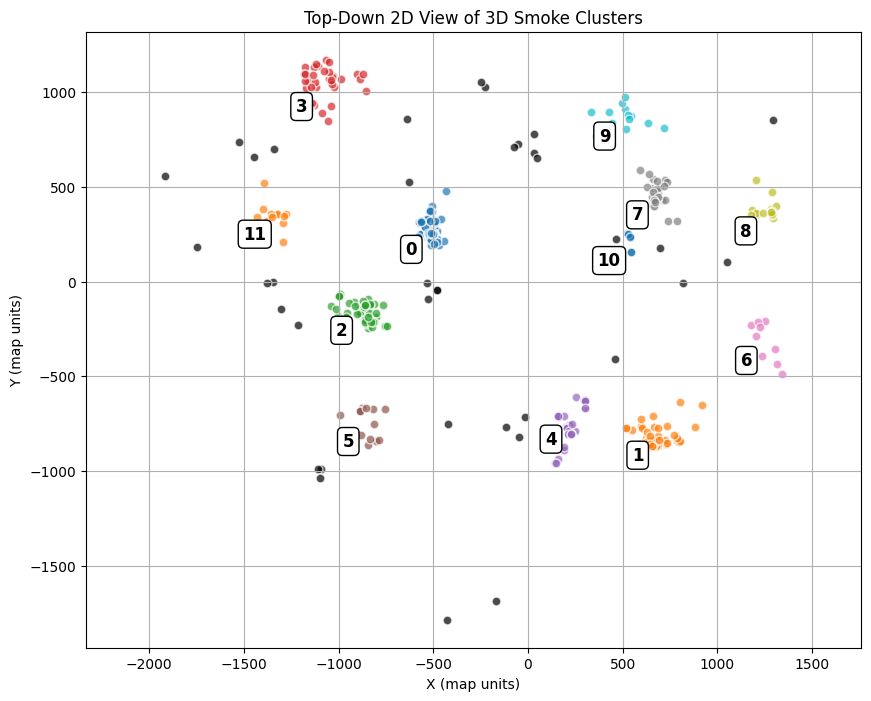

   antecedents consequents   support  confidence
2          (0)       (win)  0.269504    0.603175
3          (1)       (win)  0.095745    0.574468
4          (2)       (win)  0.120567    0.653846
5          (4)       (win)  0.113475    0.571429
6          (7)       (win)  0.092199    0.634146
8       (0, 1)       (win)  0.078014    0.594595
11      (4, 0)       (win)  0.095745    0.562500
Antecedent: {0} p = 0.0046
Antecedent: {1} p = 0.7280
Antecedent: {2} p = 0.0187
Antecedent: {4} p = 0.8952
Antecedent: {7} p = 0.1854
Antecedent: {0, 1} p = 0.8664
Antecedent: {0, 4} p = 0.8541


In [112]:
main_func("de_ancient", "T") 

From the statistics above, we can see that only smoke setup {0} and {2} are the only smoke setups that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that winning the round is dependent with smoke setups {0} and {2}.

#### DE_ANCIENT
##### Counter-Terrorist Side

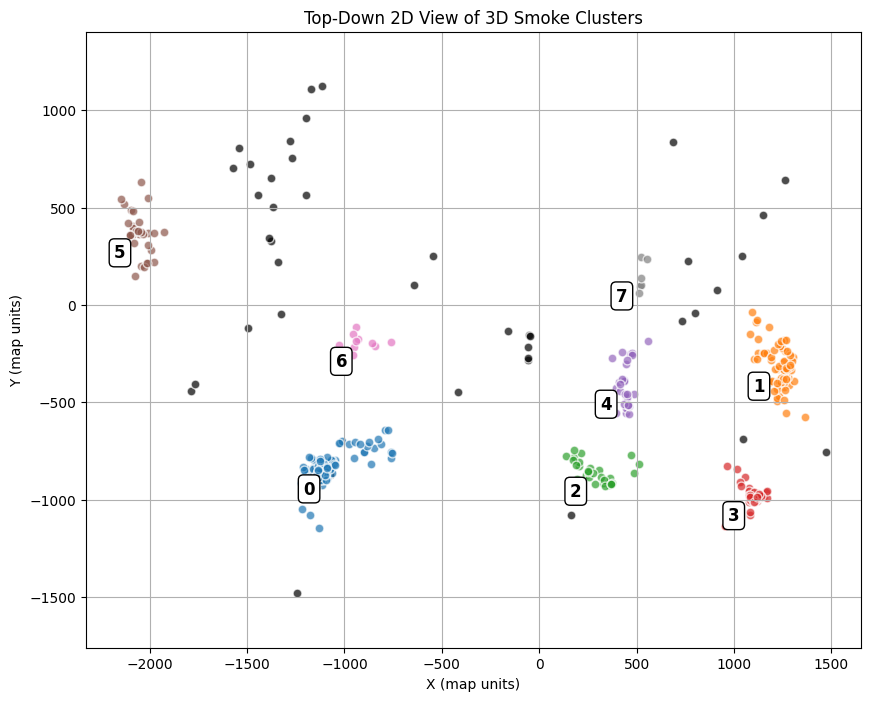

Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


In [113]:
main_func("de_ancient", "CT") 

Since there are no smoke setups that passed the thresholds in association rule mining, we cannot do any testing. This means that the smoke setups present either have insufficient instances, low win rate, or both.

#### DE_DUST2
##### Terrorist Side

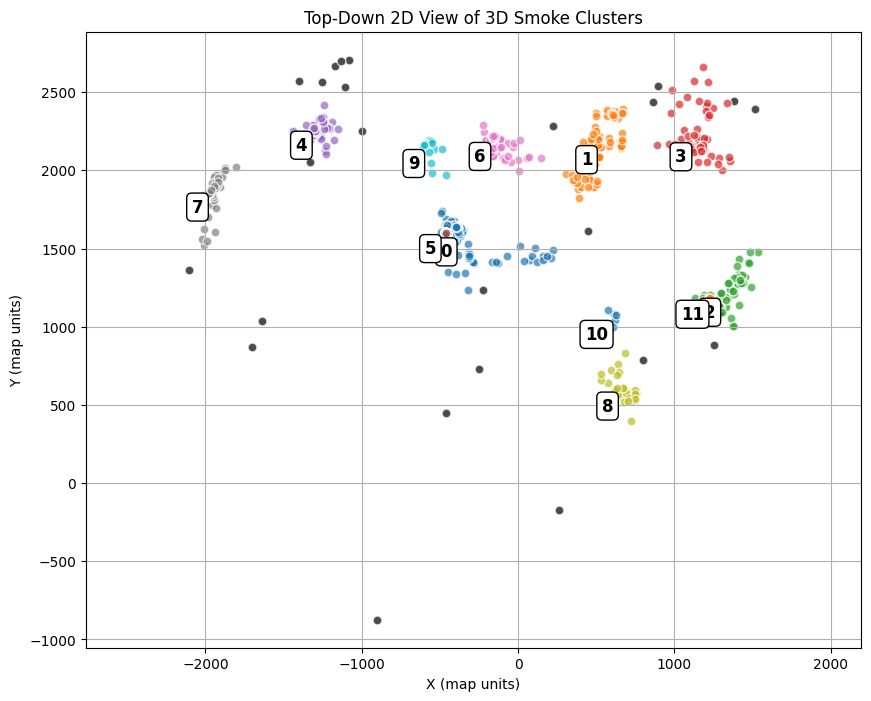

  antecedents consequents   support  confidence
0         (0)       (win)  0.168794    0.595000
1         (3)       (win)  0.093617    0.653465
Antecedent: {0} p = 0.4428
Antecedent: {3} p = 0.0299


In [114]:
main_func("de_dust2", "T")

From the statistics above, we can see that only smoke setup and {3} is the only smoke setup that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that winning the round is dependent with smoke setup {3} 

#### DE_DUST2
##### Counter-Terrorist Side

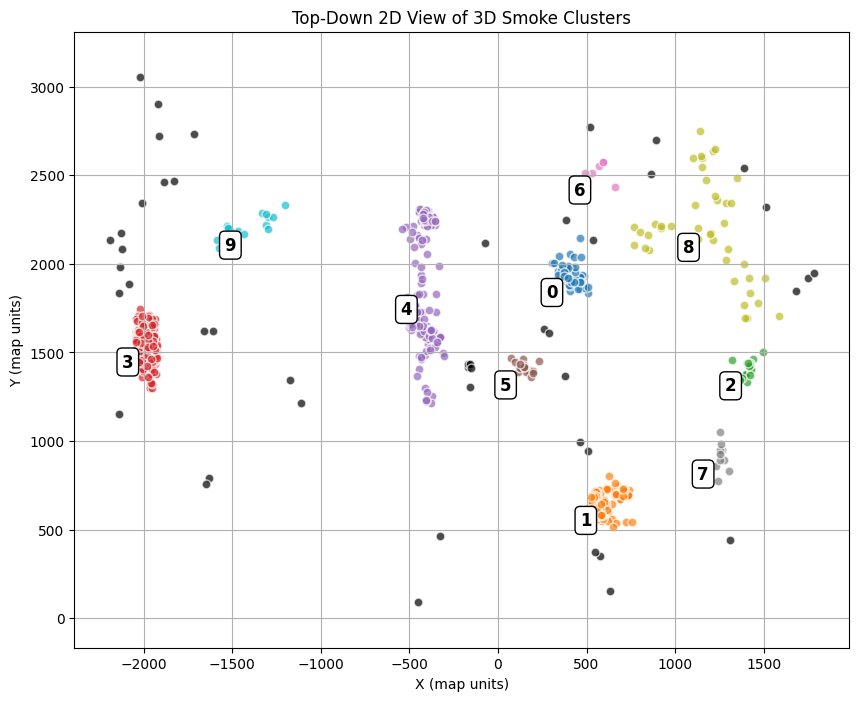

  antecedents consequents   support  confidence
0         (4)       (win)  0.126183     0.56338
Antecedent: {4} p = 0.1241


In [115]:
main_func("de_dust2", "CT")

From the statistics above, we can see that only smoke setup {4} is the only smoke setup that has been mined based on the criteria, however, since the p-value is > 0.05, we fail to reject the null hypothesis. Therefore, winning the round is independent with smoke setup {4}.

#### DE_MIRAGE
##### Terrorist Side

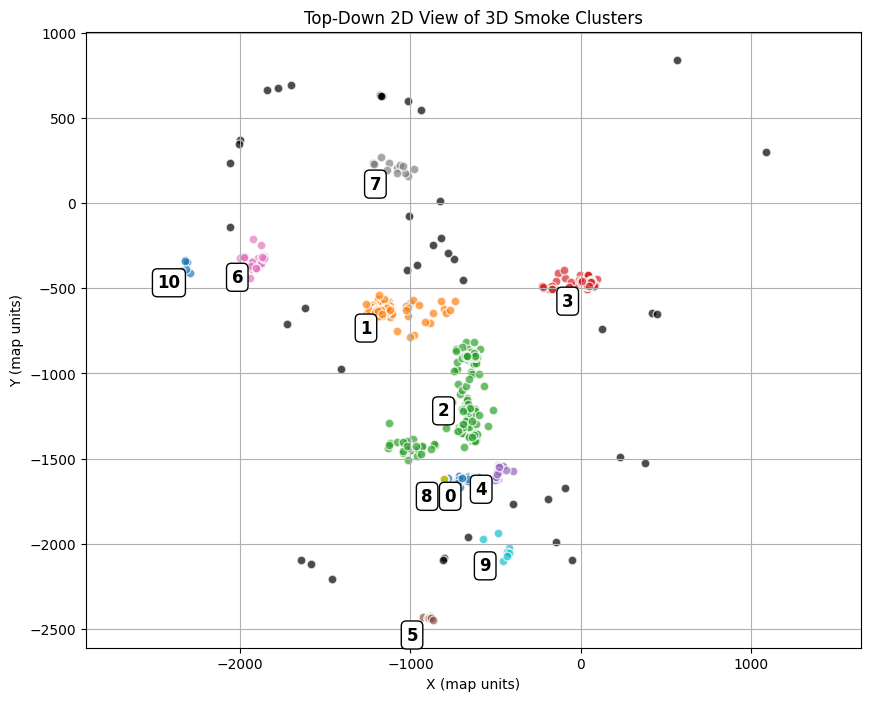

Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


In [116]:
main_func("de_mirage", "T")

Since there are no smoke setups that passed the thresholds in association rule mining, we cannot do any testing. This means that the smoke setups present either have insufficient instances, low win rate, or both.

#### DE_MIRAGE
##### Counter-Terrorist Side

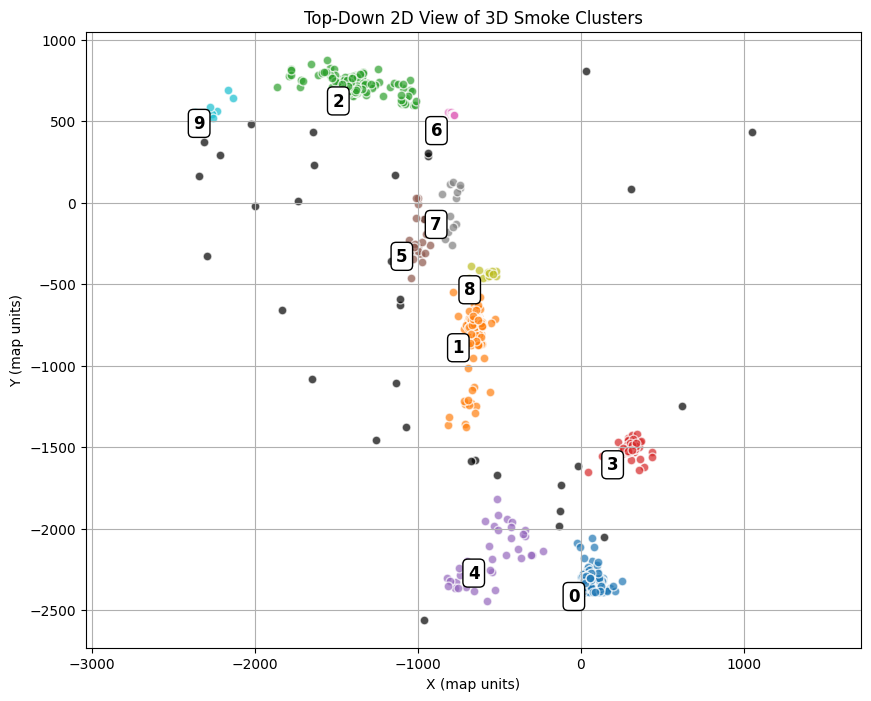

  antecedents consequents   support  confidence
0         (0)       (win)  0.235401    0.658163
1         (1)       (win)  0.235401    0.597222
2         (2)       (win)  0.162409    0.613793
3         (3)       (win)  0.091241    0.581395
Antecedent: {0} p = 0.0060
Antecedent: {1} p = 0.1346
Antecedent: {2} p = 0.5624
Antecedent: {3} p = 0.3004


In [117]:
main_func("de_mirage", "CT")

From the statistics above, we can see that only smoke setup {0} is the only smoke setup that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that that winning the round is dependent with smoke setup {0} 

#### DE_NUKE
##### Terrorist Side

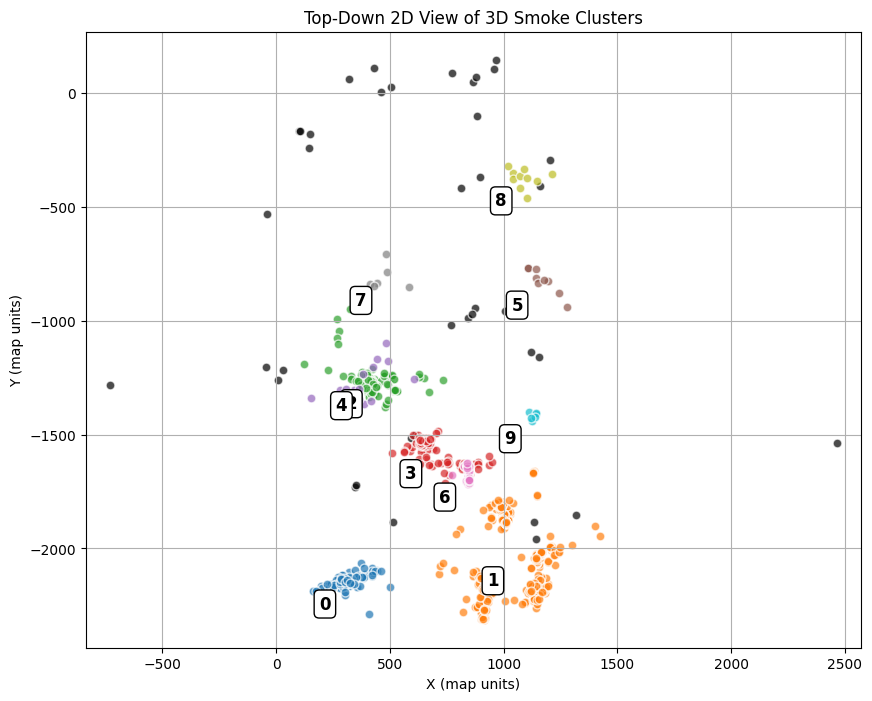

Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


In [118]:
main_func("de_nuke", "T")

Since there are no smoke setups that passed the thresholds in association rule mining, we cannot do any testing. This means that the smoke setups present either have insufficient instances, low win rate, or both.

#### DE_NUKE
##### Counter-Terrorist Side

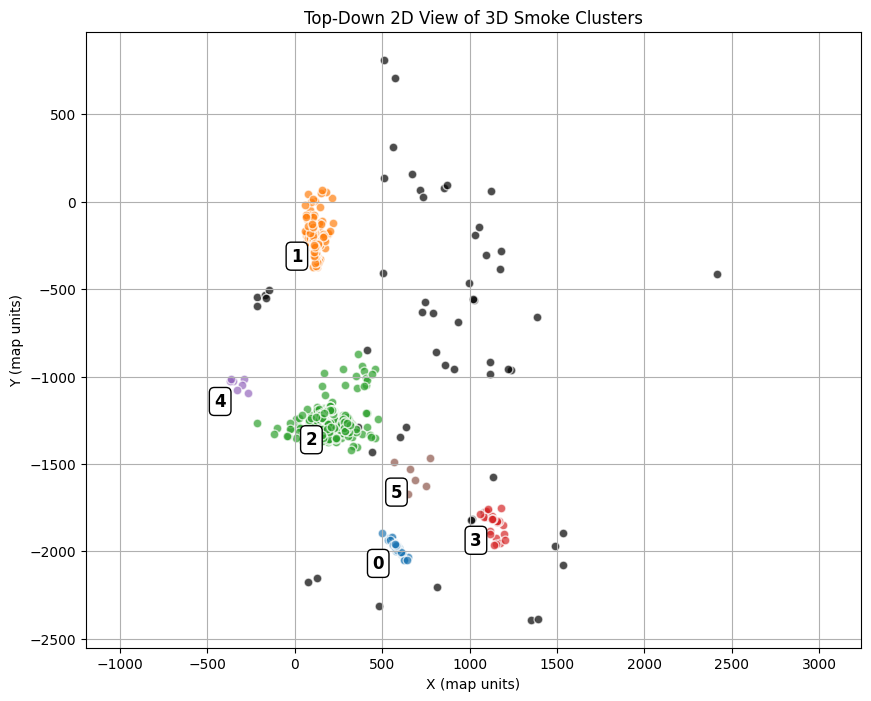

  antecedents consequents   support  confidence
2         (1)       (win)  0.240631    0.580952
6      (1, 2)       (win)  0.145957    0.556391
Antecedent: {1} p = 0.6483
Antecedent: {1, 2} p = 0.6259


In [119]:
main_func("de_nuke", "CT")

From the statistics above, we can see that only smoke setups {1} and {1,2} are the only smoke setups that have been mined based on the criteria, however, since the p-value is > 0.05, we fail to reject the null hypothesis. Therefore, winning the round is independent with smoke setups  {1} and {1,2}.

#### DE_INFERNO
##### Terrorist Side

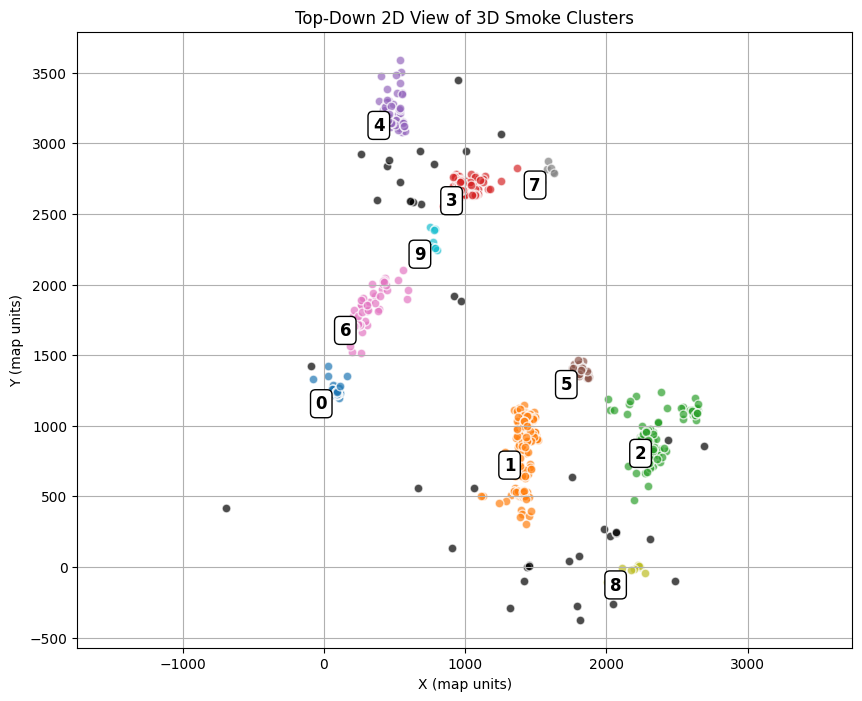

  antecedents consequents   support  confidence
0         (2)       (win)  0.144695    0.620690
1         (3)       (win)  0.160772    0.632911
Antecedent: {2} p = 0.0526
Antecedent: {3} p = 0.0000


In [120]:
main_func("de_inferno", "T")

From the statistics above, we can see that only smoke setup {3} is the only smoke setup that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that winning the round is dependent with smoke setup {3}.

#### DE_INFERNO
##### Counter-Terrorist Side

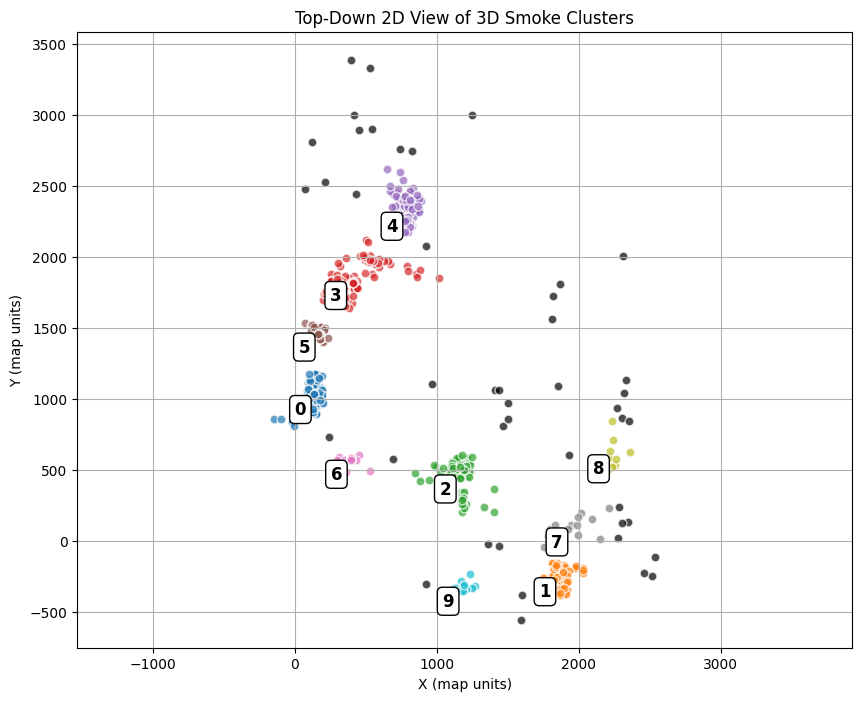

  antecedents consequents   support  confidence
0         (0)       (win)  0.169841    0.656442
1         (1)       (win)  0.107937    0.586207
2         (2)       (win)  0.107937    0.623853
Antecedent: {0} p = 0.0985
Antecedent: {1} p = 0.1013
Antecedent: {2} p = 0.0136


In [121]:
main_func("de_inferno", "CT")

From the statistics above, we can see that only smoke setup {2} is the only smoke setup that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that winning the round is dependent with smoke setup {2}.

#### DE_ANUBIS
##### Terrorist Side

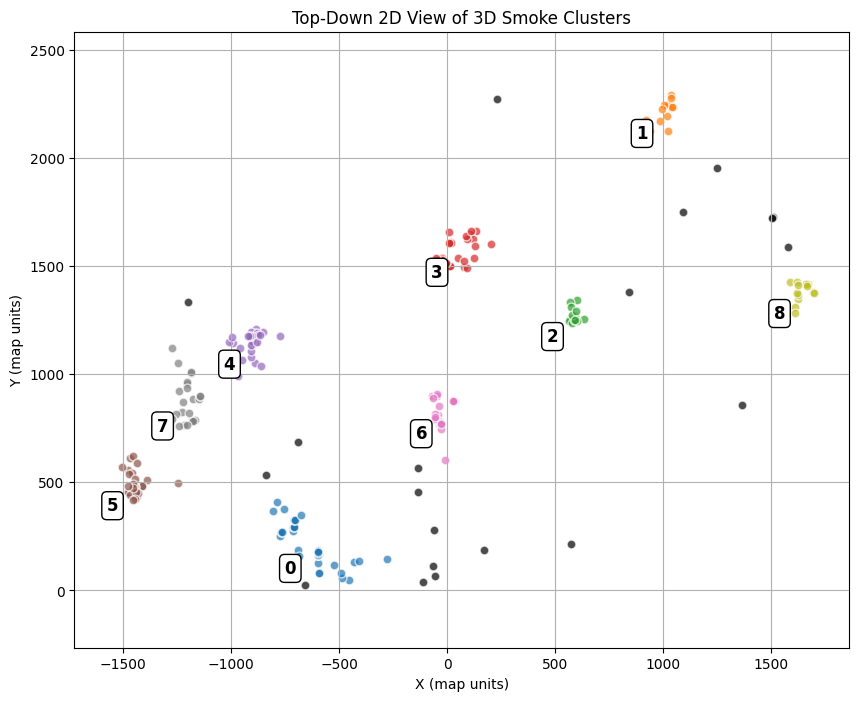

  antecedents consequents   support  confidence
1         (0)       (win)  0.161677    0.600000
2         (4)       (win)  0.119760    0.666667
3         (6)       (win)  0.095808    0.615385
4         (7)       (win)  0.113772    0.655172
Antecedent: {0} p = 0.1544
Antecedent: {4} p = 0.0156
Antecedent: {6} p = 0.1444
Antecedent: {7} p = 0.0188


In [122]:
main_func("de_anubis", "T")

From the statistics above, we can see that only smoke setup {4} and {7} are the only smoke setups that have been mined based on the criteria, and is statistically significant (p < 0.05). Thus, we can reject the null hypothesis, which suggests that winning the round is dependent with smoke setups {4} and {7}.

#### DE_ANUBIS
##### Counter-Terrorist Side

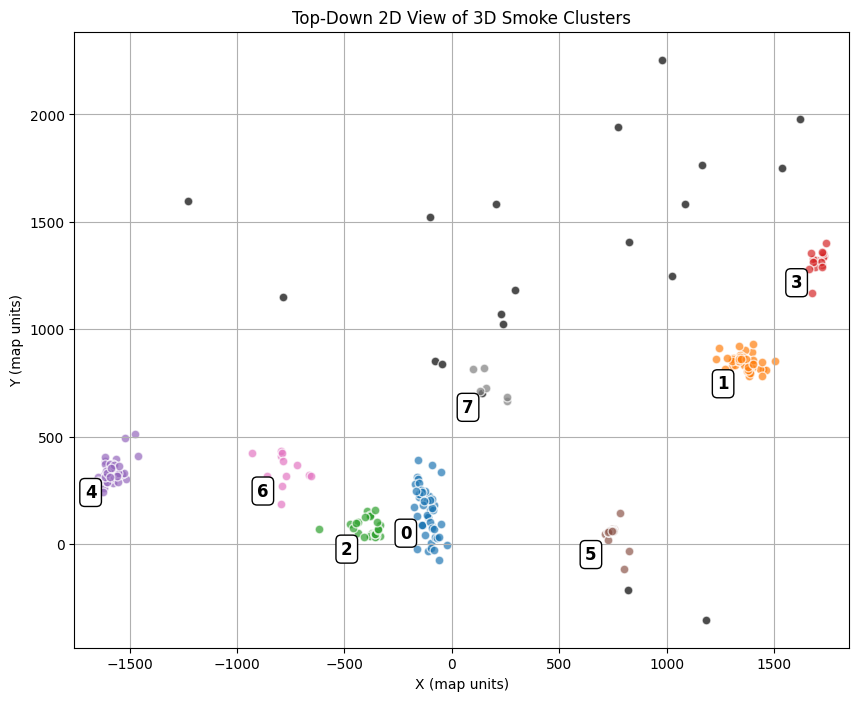

  antecedents consequents   support  confidence
0         (1)       (win)  0.141104    0.560976
Antecedent: {1} p = 0.1584


In [123]:
main_func("de_anubis", "CT")

From the statistics above, we can see that only smoke setup {1} is the only smoke setup that have been mined based on the criteria, however, since the p-value is > 0.05, we fail to reject the null hypothesis. Therefore, winning the round is independent with smoke setup {1}.

#### DE_TRAIN
##### Terrorist Side

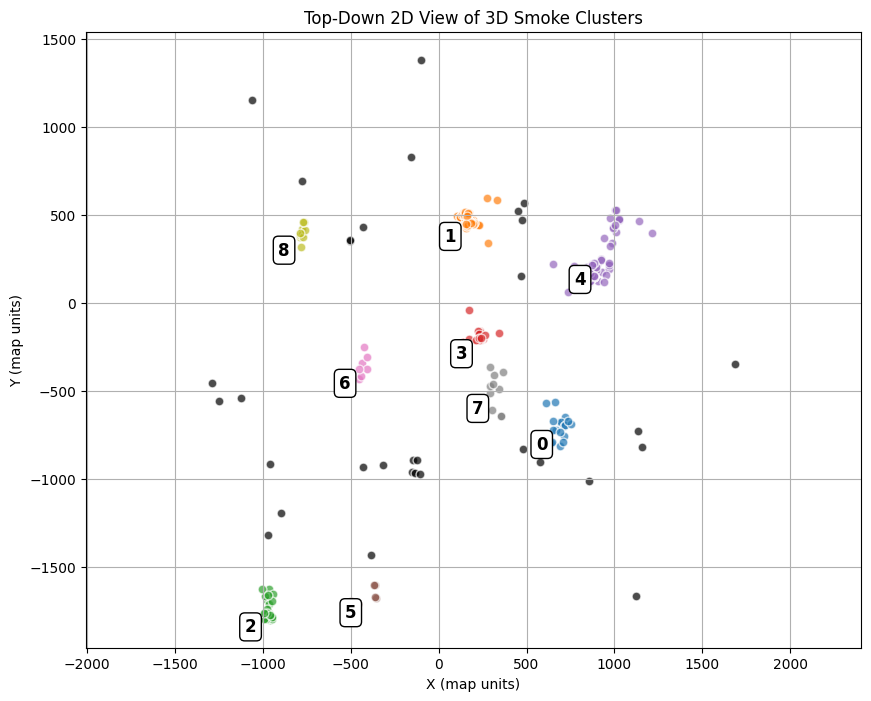

  antecedents consequents   support  confidence
1         (1)       (win)  0.261438    0.615385
2         (2)       (win)  0.104575    0.571429
4         (3)       (win)  0.091503    0.560000
5         (4)       (win)  0.261438    0.666667
7      (1, 2)       (win)  0.098039    0.576923
Antecedent: {1} p = 0.7299
Antecedent: {2} p = 0.6967
Antecedent: {3} p = 0.8398
Antecedent: {4} p = 0.1979
Antecedent: {1, 2} p = 0.7663


In [124]:
main_func("de_train", "T")

From the statistics above, we can see that only smoke setups {1}, {2}, {3}, {4} and {1,2} are the only smoke setups that have been mined based on the criteria, however, since the p-value is > 0.05, we fail to reject the null hypothesis. Therefore, winning the round is independent with smoke setups {1}, {2}, {3},{4} and {1,2}.

#### DE_TRAIN
##### Counter-Terrorist Side

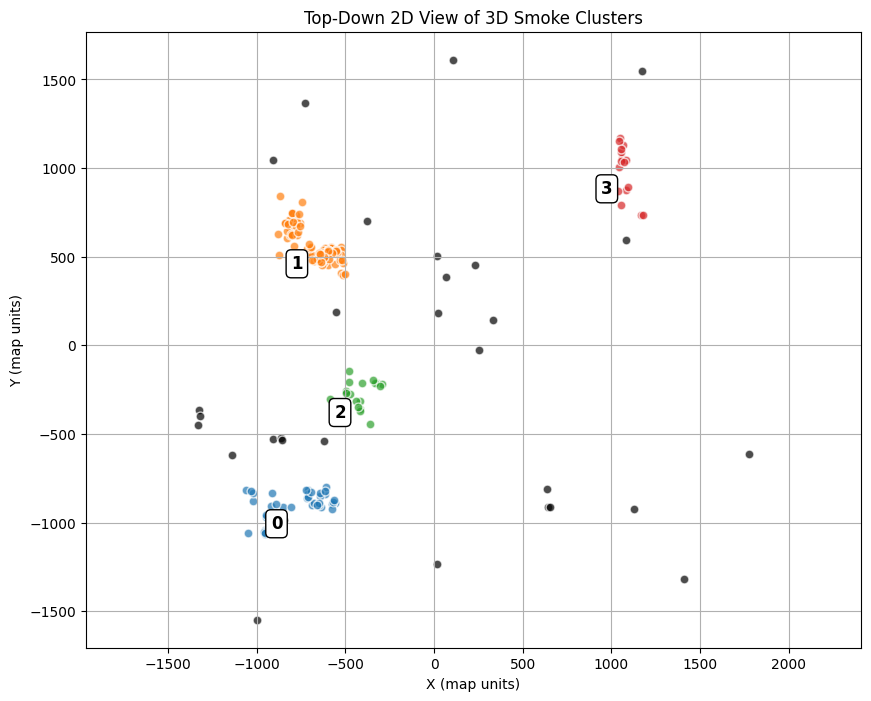

Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


In [125]:
main_func("de_train", "CT")

Since there are no smoke setups that passed the thresholds in association rule mining, we cannot do any testing. This means that the smoke setups present either have insufficient instances, low win rate, or both.

#### Smoke Clustering Synthesis

All in all, there are certain sides in certain maps where winning a round is dependent with certain smoke setup/s. It can be said that these setups can be considered a winning "meta" for the associated sides and maps. 

Although only a few smoke setups are considered to pass through the rule mining threshold and the test of independence, there are still benefits in just knowing the cluster of smokes. This information can be used as a basis of the "meta" setup since these clusters are where smoke grenades are thrown into more often than not. Even if you do not know its association to win rate or any other statistic, it is still useful in determining areas to take note of when defending or attacking a site. After all, smokes in CS2 can go both ways: as means of defense or as means of attack. 

While there are certain smoke setups in certain maps that have a likely association with winning rounds, it is important to remember that this is not a causation. You will not get an automatic +N% winrate just because you threw a smoke grenade in the aforementioned smoke setup areas/clusters. CS2 is a complicated game, with an even more complicated player base. There might be more factors that impacts wins more heavily than smoke setups do. 



## Limitations

The dataset used in this notebook is from IEM Dallas 2025 only, as it is the only tournament available in the latest patch of CS2. There are also games dropped from the dataset due to demo
files being split. Another game was also dropped due to the demo file recording the warm up round, causing issues with the parser library. 

In terms of the actual data, there are also limitations due to the format of the tournament; not all teams played the same amount of games. Additionally, the analyses done with relation to maps (such as smoke clusters) may not be as useful due to 
having low size in some maps, caused by the limitation of having just one tournament dataset. Moreover, teams have the option to ban a map, which further impacts the analyses that deal with maps information. Also, the available maps for the games changes per season, 
with de_ancient, de_nuke, de_dust2, de_anubis, de_mirage, de_train, de_inferno, as the only available maps in rotation. Aside from the maps, there are also limitations to the teams, as the tournament only accomodated 16 teams. There are some professional teams that 
are currently participating in professional leagues that did not participate in the IEM Dallas 2025.

In terms of the demoparser, the limitations arise from the functions available on the library, and the bugs present in some functions. One bug encountered in this notebook is Issue #262 in https://github.com/LaihoE/demoparser/issues
which deals with extracting the round number using one of the functions in the library. 

## Conclusions

On the surface, CS2 is a simple game, you either kill the enemy team, or plant/defuse the bomb to win. Beneath the simple game task lies a multitude of complex mechanics and strategies. Such complexities on the professional level of gameplay are what this study aims to explore. With that being said, the study has focused on these key game mechanics, and features:

1. Smoke Grenade Setups
2. Player Loadouts
3. Aggregate Metrics by Teams
4. Categorical Metrics in Game

With the help of statistical analysis, data exploration, and inference, the study has been able to conclude the following findings

- All maps have consistent smoke setups in certain areas of the map as shown by the clustering of smoke grenade explosions.
- Some sides (Terrorist or Counter-Terrorist) have smoke setups in some maps that are considered to be associated with winning rounds. Such smoke setups can be considered as a key strategy by the teams.
- Some player loadouts (weapons) are strongly related with winning the round, and can be considered as "meta" picks.
- Successful bomb plants are not associated with the maps being played, which means that the maps does not necessarily favor or hinder the bomb plant.
- The successful bomb plant on the same site as the first site attacked is considered to be dependent with the maps, indicating that players tend to rotate to other sides, or commit to the first site attacked depending on what the map is. 
- Winning the map (game) is independent of winning the pistol round, which means that the early wins and economy bonus does not necessarily lead to winning the game.
- There is a difference in round length if a timeout was called versus without, possibly meaning that teams become more patient, and composed in their strategies after a timeout
- Getting the first kill in a round is not statistically associated with winning the round.
- Winrate of the sides has a statistically significant association with the map, indicating that certain maps favor certain sides.
- There is no evidence supporting bomb plant time and site hit time to be different in rounds where T won versus wounds where CT won, highlighting that the timing of attack cannot be associated with a win on either side

With the aforementioned findings, it is important to mention that these information does not lead to causation. Just because a team used a certain loadout, or prepared a smoke setup, does not mean the team automatically get an additional winrate. Ultimately, this study sheds light on just a fragment of the game's complexity. While data and metrics may offer valuable perspectives, they are merely tools for victory. Success in CS2 is rooted in adaptability, mentality, and team synergy.

As the saying goes: "Not everything that can be counted counts, and not everything that counts can be counted."
The numbers may tell a story, but it's the players who write the ending.


## AI Declaration
Statement: During the preparation of this work the author(s) used ChatGPT, and GitHub Copilot for the following purposes:

- Learn more about Pandas, Matplotlib and Scipy libraries

After using this tool/service, the author(s) reviewed and edited the content as needed and take(s) full responsibility for the content of the publication.

## References

* Adhikary, D., & Roy, S. (2015). Trends in quantitative association rule mining techniques. Institute of Electrical and Electronics Engineers. https://doi.org/10.1109/retis.2015.7232865
* Amiruzzaman, M., Rahman, R., Islam, M. R., & Nor, R. M. (2022, June 27). Logical analysis of built‑in DBSCAN functions in popular data science programming languages. OSF Preprints. https://doi.org/10.31219/osf.io/ge654
* ESL Faceit Group Limited. (n.d.). ESL Pro Tour Counter-Strike general rules [PDF]. ESL Pro Tour. https://pro.eslgaming.com/tour/cs/#documents
* LaihoE. (2025). demoparser [Software]. GitHub. https://github.com/LaihoE/demoparser
* Statstutor. (n.d.). Spearman’s correlation [PDF]. The Statistics Tutor. https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf